# House Price Prediction - Advanced Regression Project

## Project Aims and Objectives
- Analyse the dataset features and report insights found.
- Create a machine learning model to predict the price of the house.
- Determine the relationship between the house features and the price of the house.
- Recommend suggestions for the customer to buy the house according to its features.


#### Project Code: PRCP-1020-HousePricePred

## Import Libraries and Install Dependencies

In [ ]:
%pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 25.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sweetviz as sv

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Understanding

In [ ]:
# import dataset
df = pd.read_csv('/content/drive/MyDrive/Datamites/HousingPrice/data.csv')

### Basic Data Quality Checks

In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
df.shape

(1460, 81)

In [ ]:
for col in df.columns:
  if str(df.dtypes[col]) == 'object':
    print(f'{col} unique values: {df[col].unique()}')
    print()

MSZoning unique values: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street unique values: ['Pave' 'Grvl']

Alley unique values: [nan 'Grvl' 'Pave']

LotShape unique values: ['Reg' 'IR1' 'IR2' 'IR3']

LandContour unique values: ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities unique values: ['AllPub' 'NoSeWa']

LotConfig unique values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope unique values: ['Gtl' 'Mod' 'Sev']

Neighborhood unique values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1 unique values: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2 unique values: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType unique values: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle unique values: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer

#### Check Missing Values

In [ ]:
num_missing = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({'num_missing': num_missing, 'percent_missing': percent_missing})

missing_df = missing_df.loc[missing_df['percent_missing'] > 0].sort_values('percent_missing', ascending=False)

d_types_list = []
for col in list(missing_df.index):
  d_types_list.append(str(df.dtypes[col]))

missing_df['data_type'] = d_types_list

In [ ]:
missing_df

num_missing  percent_missing data_type
PoolQC               1453        99.520548    object
MiscFeature          1406        96.301370    object
Alley                1369        93.767123    object
Fence                1179        80.753425    object
FireplaceQu           690        47.260274    object
LotFrontage           259        17.739726   float64
GarageType             81         5.547945    object
GarageYrBlt            81         5.547945   float64
GarageFinish           81         5.547945    object
GarageQual             81         5.547945    object
GarageCond             81         5.547945    object
BsmtExposure           38         2.602740    object
BsmtFinType2           38         2.602740    object
BsmtFinType1           37         2.534247    object
BsmtCond               37         2.534247    object
BsmtQual               37         2.534247    object
MasVnrArea              8         0.547945   float64
MasVnrType              8         0.547945    object
Electrical              1         0.068493    object

#### Check Duplicated Records

In [ ]:
df.duplicated().sum()

0

## Exploratory Data Analysis

### Data Cleaning

In [ ]:
clean_data = df.copy()

In [ ]:
clean_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

- First we will drop the Id column as it has no meaningful information for predicting the house sale price.

In [ ]:
clean_data = clean_data.drop(['Id'], axis=1)

In [ ]:
clean_data.shape

(1460, 80)

#### Handle Missing Values

In [ ]:
missing_val_cols = list(missing_df.index)
missing_val_cols

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [ ]:
missing_df

num_missing  percent_missing data_type
PoolQC               1453        99.520548    object
MiscFeature          1406        96.301370    object
Alley                1369        93.767123    object
Fence                1179        80.753425    object
FireplaceQu           690        47.260274    object
LotFrontage           259        17.739726   float64
GarageType             81         5.547945    object
GarageYrBlt            81         5.547945   float64
GarageFinish           81         5.547945    object
GarageQual             81         5.547945    object
GarageCond             81         5.547945    object
BsmtExposure           38         2.602740    object
BsmtFinType2           38         2.602740    object
BsmtFinType1           37         2.534247    object
BsmtCond               37         2.534247    object
BsmtQual               37         2.534247    object
MasVnrArea              8         0.547945   float64
MasVnrType              8         0.547945    object
Electrical              1         0.068493    object

In [ ]:
clean_data[missing_val_cols].head()

PoolQC MiscFeature Alley Fence FireplaceQu  LotFrontage GarageType  \
0    NaN         NaN   NaN   NaN         NaN         65.0     Attchd   
1    NaN         NaN   NaN   NaN          TA         80.0     Attchd   
2    NaN         NaN   NaN   NaN          TA         68.0     Attchd   
3    NaN         NaN   NaN   NaN          Gd         60.0     Detchd   
4    NaN         NaN   NaN   NaN          TA         84.0     Attchd   

   GarageYrBlt GarageFinish GarageQual GarageCond BsmtExposure BsmtFinType2  \
0       2003.0          RFn         TA         TA           No          Unf   
1       1976.0          RFn         TA         TA           Gd          Unf   
2       2001.0          RFn         TA         TA           Mn          Unf   
3       1998.0          Unf         TA         TA           No          Unf   
4       2000.0          RFn         TA         TA           Av          Unf   

  BsmtFinType1 BsmtCond BsmtQual  MasVnrArea MasVnrType Electrical  
0          GLQ       TA       Gd       196.0    BrkFace      SBrkr  
1          ALQ       TA       Gd         0.0       None      SBrkr  
2          GLQ       TA       Gd       162.0    BrkFace      SBrkr  
3          ALQ       Gd       TA         0.0       None      SBrkr  
4          GLQ       TA       Gd       350.0    BrkFace      SBrkr

In [ ]:
clean_data.shape

(1460, 80)

##### PoolQC Feature

In [ ]:
missing_df.loc['PoolQC']

num_missing             1453
percent_missing    99.520548
data_type             object
Name: PoolQC, dtype: object

In [ ]:
clean_data[[
    'PoolArea', 'PoolQC'
]][
    (clean_data['PoolQC'].isnull())
].head(10)

PoolArea PoolQC
0         0    NaN
1         0    NaN
2         0    NaN
3         0    NaN
4         0    NaN
5         0    NaN
6         0    NaN
7         0    NaN
8         0    NaN
9         0    NaN

In [ ]:
clean_data.groupby('PoolArea').size()

PoolArea
0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
dtype: int64

In [ ]:
clean_data['PoolArea'].corr(clean_data['SalePrice'])

0.09240354949187321

In [ ]:
clean_data.PoolQC.astype('category').cat.codes.corr(clean_data.SalePrice)

0.05136393717320148

In [ ]:
misc_val_percent_zero = len(clean_data['PoolArea'][clean_data['PoolArea'] == 0]) / len(clean_data['PoolArea']) * 100

print(f'Percentage of values in PoolArea feature that are zero: {round(misc_val_percent_zero, 2)}%')

Percentage of values in PoolArea feature that are zero: 99.52%


- It is observed that the PoolQC feature values are null where the PoolArea feature is 0.
- Both features also have almost no correlation with sale price of the house.
- Since both features have over 99% missing values, both PoolQC and PoolArea features shall be dropped.

In [ ]:
clean_data = clean_data.drop(['PoolQC', 'PoolArea'], axis=1)

In [ ]:
clean_data.shape

(1460, 78)

##### MiscFeature feature

In [ ]:
missing_df.loc['MiscFeature']

num_missing            1406
percent_missing    96.30137
data_type            object
Name: MiscFeature, dtype: object

In [ ]:
clean_data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [ ]:
clean_data[['MiscFeature', 'MiscVal']][clean_data['MiscFeature'].isnull()].head(10)

MiscFeature  MiscVal
0          NaN        0
1          NaN        0
2          NaN        0
3          NaN        0
4          NaN        0
6          NaN        0
8          NaN        0
9          NaN        0
10         NaN        0
11         NaN        0

In [ ]:
clean_data[['MiscFeature', 'MiscVal']][
    (clean_data['MiscVal'] == 0) &
    (~clean_data['MiscFeature'].isnull())
]

MiscFeature  MiscVal
873         Othr        0
1200        Shed        0

In [ ]:
clean_data.groupby('MiscVal').size()

MiscVal
0        1408
54          1
350         1
400        11
450         4
480         2
500         8
560         1
600         4
620         1
700         5
800         1
1150        1
1200        2
1300        1
1400        1
2000        4
2500        1
3500        1
8300        1
15500       1
dtype: int64

In [ ]:
misc_val_percent_zero = len(clean_data['MiscVal'][clean_data['MiscVal'] == 0]) / len(clean_data['MiscVal']) * 100

print(f'Percentage of values in MiscVal feature that are zero: {round(misc_val_percent_zero, 2)}%')

Percentage of values in MiscVal feature that are zero: 96.44%


In [ ]:
val_percent_null = len(clean_data['MiscFeature'][clean_data['MiscFeature'].isnull()]) / len(clean_data['MiscFeature']) * 100

print(f'Percentage of values in MiscFeature feature that are null: {round(val_percent_null, 2)}%')

Percentage of values in MiscFeature feature that are null: 96.3%


In [ ]:
clean_data['MiscVal'].corr(clean_data['SalePrice'])

-0.02118957964030325

In [ ]:
clean_data.MiscFeature.astype('category').cat.codes.corr(clean_data.SalePrice)

-0.06931698146304487

- MiscFeature column has 96.4% missing values.
- MiscVal column has 96.3% of records where the values are zero.
- Both features also have almost no correlation with the house sale price.
- It can be observed that these two features do not provide any meaningful data, so they can be dropped.  

In [ ]:
clean_data = clean_data.drop(['MiscFeature', 'MiscVal'], axis=1)

In [ ]:
clean_data.shape

(1460, 76)

##### Alley Feature

In [ ]:
missing_df.loc['Alley']

num_missing             1369
percent_missing    93.767123
data_type             object
Name: Alley, dtype: object

In [ ]:
clean_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [ ]:
clean_data.Alley.astype('category').cat.codes.corr(clean_data.SalePrice)

-0.09260744997351615

- The Alley feature has 93% missing values and no correlation with the sale price.
- Due to above reasons, this feature can be dropped.

In [ ]:
clean_data = clean_data.drop(['Alley'], axis=1)

In [ ]:
clean_data.shape

(1460, 75)

##### Fence

In [ ]:
missing_df.loc['Fence']

num_missing             1179
percent_missing    80.753425
data_type             object
Name: Fence, dtype: object

In [ ]:
clean_data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
clean_data.Fence.astype('category').cat.codes.corr(clean_data.SalePrice)

-0.1819113389921994

- The Fence feature has 80% missing values and no correlation with the house sale price.
- This feature can be dropped from the dataset.

In [ ]:
clean_data = clean_data.drop(['Fence'], axis=1)

In [ ]:
clean_data.shape

(1460, 74)

##### FireplaceQu feature

In [ ]:
missing_df.loc['FireplaceQu']

num_missing              690
percent_missing    47.260274
data_type             object
Name: FireplaceQu, dtype: object

In [ ]:
clean_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
clean_data.FireplaceQu.astype('category').cat.codes.corr(clean_data.SalePrice)

0.37837684469155336

In [ ]:
clean_data[['Fireplaces', 'FireplaceQu']][clean_data['FireplaceQu'].isnull()].head(10)

Fireplaces FireplaceQu
0            0         NaN
5            0         NaN
10           0         NaN
12           0         NaN
15           0         NaN
17           0         NaN
18           0         NaN
19           0         NaN
26           0         NaN
29           0         NaN

In [ ]:
misc_val_percent_zero = len(clean_data['Fireplaces'][(clean_data['Fireplaces'] == 0) & (clean_data['FireplaceQu'].isnull())]) / len(clean_data['Fireplaces']) * 100

print(f'Percentage of values in Fireplaces feature that are zero: {round(misc_val_percent_zero, 2)}%')

Percentage of values in Fireplaces feature that are zero: 47.26%


In [ ]:
clean_data.Fireplaces.corr(clean_data.SalePrice)

0.46692883675152724

- The FireplaceQu feature has 47.26% missing values and a weak positive correlation with the house sale price.
- The Fireplaces feature has the same 47.26% records that has value zero and a weak positive correlation with the house sale price.
- This implies that houses with zero fireplaces have null values for fireplace quality.
- For the FireplaceQu feature, a new category called 'Not Applicable' can be created to represent houses that have zero fireplaces which can be distinguished from the other categories.

In [ ]:
clean_data[['FireplaceQu']] = clean_data[['FireplaceQu']].fillna('Not Applicable')

In [ ]:
clean_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces     FireplaceQu GarageType  \
0          Gd             8        Typ           0  Not Applicable     Attchd   
1          TA             6        Typ           1              TA     Attchd   
2          Gd             6        Typ           1              TA     Attchd   
3          

In [ ]:
clean_data['FireplaceQu'].unique()

array(['Not Applicable', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
clean_data['FireplaceQu'].isnull().sum()

0

In [ ]:
clean_data.shape

(1460, 74)

##### LotFrontage

In [ ]:
missing_df.loc['LotFrontage']

num_missing              259
percent_missing    17.739726
data_type            float64
Name: LotFrontage, dtype: object

In [ ]:
clean_data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [ ]:
clean_data[clean_data['LotFrontage'].isnull()].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
24         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
7        Norm     1Fam     2Story            7            6       1973   
12       Norm     1Fam     1Story            5            6       1962   
14       Norm     1Fam     1Story            6            5       1960   
16       Norm     1Fam     1Story            6            7       1970   
24       Norm     1Fam     1Story            5            8       1968   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
7           1973     Gable  CompShg     HdBoard     HdBoard      Stone   
12          1962       Hip  CompShg     HdBoard     Plywood       None   
14          1960       Hip  CompShg     MetalSd     MetalSd    BrkFace   
16          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
24          2001     Gable  CompShg     Plywood     Plywood       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
7        240.0        TA        TA     CBlock       Gd       TA           Mn   
12         0.0        TA        TA     CBlock       TA       TA           No   
14       212.0        TA        TA     CBlock       TA       TA           No   
16       180.0        TA        TA     CBlock       TA       TA           No   
24         0.0        TA        Gd     CBlock       TA       TA           Mn   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
7           ALQ         859          BLQ          32        216         1107   
12          ALQ         737          Unf           0        175          912   
14          BLQ         733          Unf           0        520         1253   
16          ALQ         578          Unf           0        426         1004   
24          Rec         188          ALQ         668        204         1060   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
7     GasA        Ex          Y      SBrkr      1107       983             0   
12    GasA        TA          Y      SBrkr       912         0             0   
14    GasA        TA          Y      SBrkr      1253         0             0   
16    GasA        Ex          Y      SBrkr      1004         0             0   
24    GasA        Ex          Y      SBrkr      1060         0             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
7        2090             1             0         2         1             3   
12        912             1             0         1         0             2   
14       1253             1             0         1         1             2   
16       1004             1             0         1         0             2   
24       1060             1             0         1         0             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
7              1          TA             7        Typ           2          TA   
12             1          TA             4        Typ           0         NaN   
14             1          TA             5        Typ           1    

In [ ]:
clean_data.LotFrontage.corr(clean_data.SalePrice)

0.35179909657067804

Text(0.5, 1.0, 'LotFrontage Distribution')

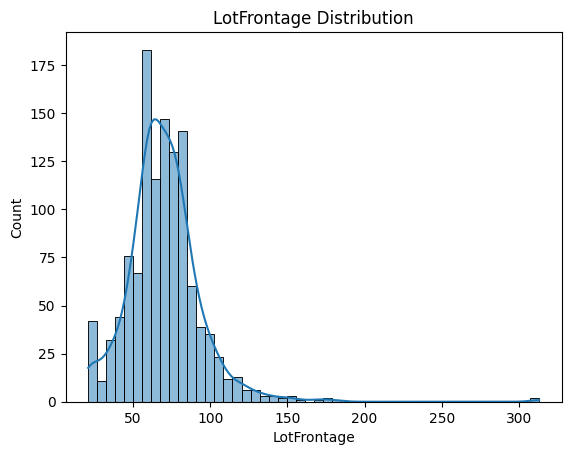

In [ ]:
sns.histplot(data=clean_data[clean_data['LotFrontage'].notnull()], x='LotFrontage', kde=True, bins=50).set_title('LotFrontage Distribution')

In [ ]:
lot_front_mean = clean_data['LotFrontage'].mean()
lot_front_median = clean_data['LotFrontage'].median()
lot_front_mode = list(clean_data['LotFrontage'].mode())[0]

print(f'LotFrontage mean value: {lot_front_mean}')
print(f'LotFrontage median value: {lot_front_median}')
print(f'LotFrontage mode value: {lot_front_mode}')

LotFrontage mean value: 70.04995836802665
LotFrontage median value: 69.0
LotFrontage mode value: 60.0


- The LotFrontage feature has 17% missing values and a weak positive correlation with the house sale price.
- From the histogram plot of the LotFrontage data, we can see that the distribution is positively skewed.
- To impute the missing values for this feature, we shall use the median to replace the null values.

In [ ]:
clean_data['LotFrontage'] = clean_data['LotFrontage'].fillna(clean_data['LotFrontage'].median())

In [ ]:
clean_data['LotFrontage'].isnull().sum()

0

In [ ]:
clean_data.shape

(1460, 74)

##### Garage Features

In [ ]:
missing_df[missing_df.index.str.contains('Garage')]

num_missing  percent_missing data_type
GarageType             81         5.547945    object
GarageYrBlt            81         5.547945   float64
GarageFinish           81         5.547945    object
GarageQual             81         5.547945    object
GarageCond             81         5.547945    object

In [ ]:
garage_cols = [col for col in list(missing_df.index) if 'Garage' in col]

for col in garage_cols:
  print(f'{col} unique values: {clean_data[col].unique()}')
  print()

GarageType unique values: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

GarageYrBlt unique values: [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]

GarageFinish unique values: ['RFn' 'Unf' 'Fin' nan]

GarageQual unique values: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

GarageCond unique values: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']



In [ ]:
for col in garage_cols:
  if str(df.dtypes[col]) == 'object':
    corr_val = clean_data[col].astype('category').cat.codes.corr(clean_data.SalePrice)
    print(f'{col} correlation with House SalePrice: {corr_val}')
    print()
  elif str(df.dtypes[col]) == 'float64':
    corr_val = clean_data[col].corr(clean_data.SalePrice)
    print(f'{col} correlation with House SalePrice: {corr_val}')
    print()

GarageType correlation with House SalePrice: -0.22381853020674977

GarageYrBlt correlation with House SalePrice: 0.48636167748786097

GarageFinish correlation with House SalePrice: -0.2924833486295423

GarageQual correlation with House SalePrice: 0.2613470178693262

GarageCond correlation with House SalePrice: 0.27578145756188005



In [ ]:
len(clean_data[[
    'YearBuilt', 'GarageYrBlt','GarageType','GarageFinish',
    'GarageQual','GarageCond', 'GarageCars', 'GarageArea'
]][clean_data['GarageYrBlt'].isnull()])

81

In [ ]:
clean_data[[
    'YearBuilt', 'GarageYrBlt','GarageType','GarageFinish',
    'GarageQual','GarageCond', 'GarageCars', 'GarageArea'
]][clean_data['GarageYrBlt'].isnull()].head(10)

YearBuilt  GarageYrBlt GarageType GarageFinish GarageQual GarageCond  \
39        1955          NaN        NaN          NaN        NaN        NaN   
48        1920          NaN        NaN          NaN        NaN        NaN   
78        1968          NaN        NaN          NaN        NaN        NaN   
88        1915          NaN        NaN          NaN        NaN        NaN   
89        1994          NaN        NaN          NaN        NaN        NaN   
99        1959          NaN        NaN          NaN        NaN        NaN   
108       1919          NaN        NaN          NaN        NaN        NaN   
125       1935          NaN        NaN          NaN        NaN        NaN   
127       1930          NaN        NaN          NaN        NaN        NaN   
140       1971          NaN        NaN          NaN        NaN        NaN   

     GarageCars  GarageArea  
39            0           0  
48            0           0  
78            0           0  
88            0           0  
89            0           0  
99            0           0  
108           0           0  
125           0           0  
127           0           0  
140           0           0

- The five features 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', and 'GarageCond' have the same percent of missing values, 81 records or 5.54%.
- The five features all have either a weak positive or weak negative correlation.
- From examining the data, it is found that the missing data are for houses that seem to not have a garage as the GarageCars and GarageArea features for these 81 houses are zero.
- Since these features are made of categorical or numeric discrete data, to impute the missing values a new category called 'Not Applicable' can be created to represent the houses with no garage.

In [ ]:
clean_data['GarageYrBlt'][clean_data['GarageYrBlt'].notnull()] = clean_data['GarageYrBlt'][clean_data['GarageYrBlt'].notnull()].astype('int').astype('str')

<ipython-input-338-26de8d3ec241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['GarageYrBlt'][clean_data['GarageYrBlt'].notnull()] = clean_data['GarageYrBlt'][clean_data['GarageYrBlt'].notnull()].astype('int').astype('str')


In [ ]:
clean_data[garage_cols] = clean_data[garage_cols].fillna('Not Applicable')

In [ ]:
clean_data[garage_cols].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

##### Basement Features

In [ ]:
missing_df[missing_df.index.str.contains('Bsmt')]

num_missing  percent_missing data_type
BsmtExposure           38         2.602740    object
BsmtFinType2           38         2.602740    object
BsmtFinType1           37         2.534247    object
BsmtCond               37         2.534247    object
BsmtQual               37         2.534247    object

In [ ]:
bsmt_cols = [col for col in list(missing_df.index) if 'Bsmt' in col]

for col in bsmt_cols:
  print(f'{col} unique values: {clean_data[col].unique()}')
  print()

BsmtExposure unique values: ['No' 'Gd' 'Mn' 'Av' nan]

BsmtFinType2 unique values: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

BsmtFinType1 unique values: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']

BsmtCond unique values: ['TA' 'Gd' nan 'Fa' 'Po']

BsmtQual unique values: ['Gd' 'TA' 'Ex' nan 'Fa']



In [ ]:
for col in bsmt_cols:
  corr_val = clean_data[col].astype('category').cat.codes.corr(clean_data.SalePrice)
  print(f'{col} correlation with House SalePrice: {corr_val}')
  print()

BsmtExposure correlation with House SalePrice: -0.19307856748009566

BsmtFinType2 correlation with House SalePrice: 0.13081415918136777

BsmtFinType1 correlation with House SalePrice: -0.013232907158195854

BsmtCond correlation with House SalePrice: 0.14736742044031148

BsmtQual correlation with House SalePrice: -0.43888096264893134



In [ ]:
clean_data[[
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'
]][
    (clean_data['BsmtExposure'].isnull()) |
    (clean_data['BsmtCond'].isnull())
]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
17        NaN      NaN          NaN          NaN           0          NaN   
39        NaN      NaN          NaN          NaN           0          NaN   
90        NaN      NaN          NaN          NaN           0          NaN   
102       NaN      NaN          NaN          NaN           0          NaN   
156       NaN      NaN          NaN          NaN           0          NaN   
182       NaN      NaN          NaN          NaN           0          NaN   
259       NaN      NaN          NaN          NaN           0          NaN   
342       NaN      NaN          NaN          NaN           0          NaN   
362       NaN      NaN          NaN          NaN           0          NaN   
371       NaN      NaN          NaN          NaN           0          NaN   
392       NaN      NaN          NaN          NaN           0          NaN   
520       NaN      NaN          NaN          NaN           0          NaN   
532       NaN      NaN          NaN          NaN           0          NaN   
533       NaN      NaN          NaN          NaN           0          NaN   
553       NaN      NaN          NaN          NaN           0          NaN   
646       NaN      NaN          NaN          NaN           0          NaN   
705       NaN      NaN          NaN          NaN           0          NaN   
736       NaN      NaN          NaN          NaN           0          NaN   
749       NaN      NaN          NaN          NaN           0          NaN   
778       NaN      NaN          NaN          NaN           0          NaN   
868       NaN      NaN          NaN          NaN           0          NaN   
894       NaN      NaN          NaN          NaN           0          NaN   
897       NaN      NaN          NaN          NaN           0          NaN   
948        Gd       TA          NaN          Unf           0          Unf   
984       NaN      NaN          NaN          NaN           0          NaN   
1000      NaN      NaN          NaN          NaN           0          NaN   
1011      NaN      NaN          NaN          NaN           0          NaN   
1035      NaN      NaN          NaN          NaN           0          NaN   
1045      NaN      NaN          NaN          NaN           0          NaN   
1048      NaN      NaN          NaN          NaN           0          NaN   
1049      NaN      NaN          NaN          NaN           0          NaN   
1090      NaN      NaN          NaN          NaN           0          NaN   
1179      NaN      NaN          NaN          NaN           0          NaN   
1216      NaN      NaN          NaN          NaN           0          NaN   
1218      NaN      NaN          NaN          NaN           0          NaN   
1232      NaN      NaN          NaN          NaN           0          NaN   
1321      NaN      NaN          NaN          NaN           0          NaN   
1412      NaN      NaN          NaN          NaN           0          NaN   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
17             0          0            0             0             0  
39             0          0            0             0             0  
90             0          0            0             0             0  
102            0          0            0             0             0  
156            0          0            0             0             0  
182            0          0            0             0             0  
259            0          0            0             0             0  
342            0          0            0             0             0  
362            0          0            0             0             0  
371            0          0            0             0             0  
392            0          0            0             0             0  
520            0          0            0             0             0  
532            0          0            0             0             0  
533    

In [ ]:
len(clean_data[[
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'
]][
    (clean_data['BsmtExposure'].isnull()) |
    (clean_data['BsmtCond'].isnull())
])

38

In [ ]:
clean_data[[
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'
]][
    (clean_data['BsmtFinType1'].notnull()) &
    (clean_data['BsmtFinType2'].isnull())
]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
332       Gd       TA           No          GLQ        1124          NaN   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
332         479       1603         3206             1             0

In [ ]:
clean_data[[
    'BsmtFinType2'
]][
    (clean_data['BsmtQual'] == 'Gd') &
    (clean_data['BsmtCond'] == 'TA') &
    (clean_data['BsmtFinType1'] == 'GLQ') &
    (clean_data['BsmtExposure'] == 'No')
].mode()

BsmtFinType2
0          Unf

In [ ]:
clean_data[[
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'
]][
    (clean_data['BsmtFinType1'] == 'Unf') &
    (clean_data['BsmtExposure'].isnull())
]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
948       Gd       TA          NaN          Unf           0          Unf   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
948           0        936          936             0             0

In [ ]:
clean_data[[
    'BsmtExposure'
]][
    (clean_data['BsmtQual'] == 'Gd') &
    (clean_data['BsmtCond'] == 'TA') &
    (clean_data['BsmtFinType1'] == 'Unf') &
    (clean_data['BsmtFinType2'] == 'Unf')
].mode()

BsmtExposure
0           No

In [ ]:
for col in bsmt_cols:
  print(f'Mode for {col}: {list(clean_data[col].mode())[0]}')

Mode for BsmtExposure: No
Mode for BsmtFinType2: Unf
Mode for BsmtFinType1: Unf
Mode for BsmtCond: TA
Mode for BsmtQual: TA


- The BsmtExposure and BsmtFinType2 features have 38 missing values or 2.60%.  
- The BsmtFinType1, BsmtCond, and BsmtQual features have 37 missing values or 2.5%.
- The five features are categorical with either a weak positive or weak negative correlation to the house sale price.
- Since the features are categorical, the mode or most frequent value of the features can be used to replace the missing values.
- There are two records which are special cases: one record has only the BsmtFinType2 feature value missing and the other has only the BsmtExposure feature value missing. These are also fixed using the mode.

In [ ]:
clean_data[['BsmtExposure']] = clean_data[['BsmtExposure']].fillna('No')
clean_data[['BsmtFinType2']] = clean_data[['BsmtFinType2']].fillna('Unf')
clean_data[['BsmtFinType1']] = clean_data[['BsmtFinType1']].fillna('Unf')
clean_data[['BsmtCond']] = clean_data[['BsmtCond']].fillna('TA')
clean_data[['BsmtQual']] = clean_data[['BsmtQual']].fillna('TA')

In [ ]:
clean_data[bsmt_cols].isnull().sum()

BsmtExposure    0
BsmtFinType2    0
BsmtFinType1    0
BsmtCond        0
BsmtQual        0
dtype: int64

##### Masonry Features

In [ ]:
missing_df[missing_df.index.str.contains('MasVnr')]

num_missing  percent_missing data_type
MasVnrArea            8         0.547945   float64
MasVnrType            8         0.547945    object

In [ ]:
mas_cols = [col for col in list(missing_df.index) if 'MasVnr' in col]

for col in mas_cols:
  print(f'{col} unique values: {clean_data[col].unique()}')
  print()

MasVnrArea unique values: [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.720e+02 4.810e+02 1.080e+02 

In [ ]:
for col in mas_cols:
  if str(df.dtypes[col]) == 'object':
    corr_val = clean_data[col].astype('category').cat.codes.corr(clean_data.SalePrice)
    print(f'{col} correlation with House SalePrice: {corr_val}')
    print()
  elif str(df.dtypes[col]) == 'float64':
    corr_val = clean_data[col].corr(clean_data.SalePrice)
    print(f'{col} correlation with House SalePrice: {corr_val}')
    print()

MasVnrArea correlation with House SalePrice: 0.4774930470957163

MasVnrType correlation with House SalePrice: -0.000487789163367855



In [ ]:
clean_data[['MasVnrType', 'MasVnrArea']][
    (clean_data['MasVnrType']=='None') &
    (clean_data['MasVnrArea']!=0.)
]

MasVnrType  MasVnrArea
624        None       288.0
773        None         1.0
1230       None         1.0
1300       None       344.0
1334       None       312.0

In [ ]:
clean_data[['MasVnrType', 'MasVnrArea']][
    (clean_data['MasVnrType']=='None') &
    (clean_data['MasVnrArea']!=0.)
]

MasVnrType  MasVnrArea
624        None       288.0
773        None         1.0
1230       None         1.0
1300       None       344.0
1334       None       312.0

In [ ]:
clean_data[['MasVnrType', 'MasVnrArea']][clean_data['MasVnrArea'].isnull()]

MasVnrType  MasVnrArea
234         NaN         NaN
529         NaN         NaN
650         NaN         NaN
936         NaN         NaN
973         NaN         NaN
977         NaN         NaN
1243        NaN         NaN
1278        NaN         NaN

Text(0.5, 1.0, 'MasVnrArea Distribution')

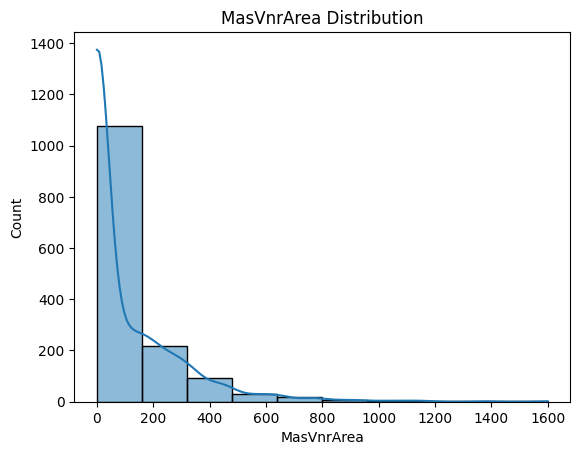

In [ ]:
sns.histplot(data=clean_data[clean_data['MasVnrArea'].notnull()], x='MasVnrArea', kde=True, bins=10).set_title('MasVnrArea Distribution')

<Axes: xlabel='count', ylabel='MasVnrType'>

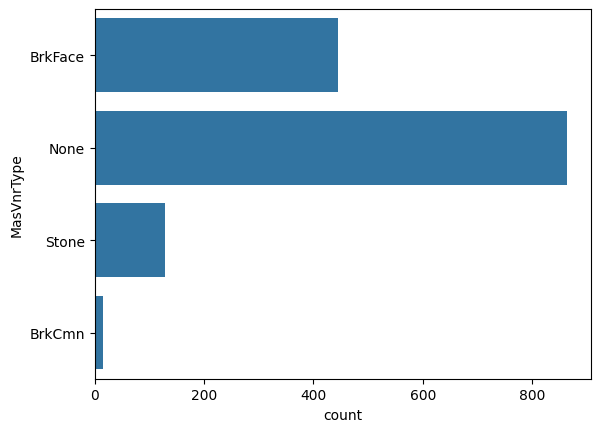

In [ ]:
sns.countplot(clean_data, y='MasVnrType')

In [ ]:
val_percent_zero = len(clean_data['MasVnrArea'][clean_data['MasVnrArea'] == 0]) / len(clean_data['MasVnrArea']) * 100

print(f'Percentage of values in MasVnrArea feature that are zero: {round(val_percent_zero, 2)}%')

Percentage of values in MasVnrArea feature that are zero: 58.97%


In [ ]:
val_percent_zero = len(clean_data['MasVnrType'][clean_data['MasVnrType'] == 'None']) / len(clean_data['MasVnrType']) * 100

print(f'Percentage of values in MasVnrType feature that are zero: {round(val_percent_zero, 2)}%')

Percentage of values in MasVnrType feature that are zero: 59.18%


In [ ]:
lot_front_mean = clean_data['MasVnrArea'].mean()
lot_front_median = clean_data['MasVnrArea'].median()
lot_front_mode = list(clean_data['MasVnrArea'].mode())[0]

print(f'MasVnrArea mean value: {lot_front_mean}')
print(f'MasVnrArea median value: {lot_front_median}')
print(f'MasVnrArea mode value: {lot_front_mode}')

MasVnrArea mean value: 103.68526170798899
MasVnrArea median value: 0.0
MasVnrArea mode value: 0.0


In [ ]:
clean_data['MasVnrType'].mode()

0    None
Name: MasVnrType, dtype: object

- The MasVnrArea and MasVnrType features have 8 values missing each. These appear to be for the same 8 records.
- The MasVnrArea is a numeric continuous variable that has a weak positive correlation with the house sale price.
- The MasVnrType is a categorical variable with no correlation with the house sale price.
- After examining the distributions of the two features these observations were made:
  - The MasVnrArea feature has 58.97% values which are zero.
  - The MasVnrType feature has 59.18% values which are category 'None'.
- For imputing these two features the mode of the features will be used.

In [ ]:
clean_data['MasVnrArea'] = clean_data['MasVnrArea'].fillna(0.0)
clean_data['MasVnrType'] = clean_data['MasVnrType'].fillna('None')

In [ ]:
clean_data[['MasVnrType', 'MasVnrArea']].isnull().sum()

MasVnrType    0
MasVnrArea    0
dtype: int64

##### Electrical

In [ ]:
missing_df.loc['Electrical']

num_missing               1
percent_missing    0.068493
data_type            object
Name: Electrical, dtype: object

In [ ]:
clean_data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [ ]:
clean_data.Electrical.astype('category').cat.codes.corr(clean_data.SalePrice)

0.233919430851631

<Axes: xlabel='count', ylabel='Electrical'>

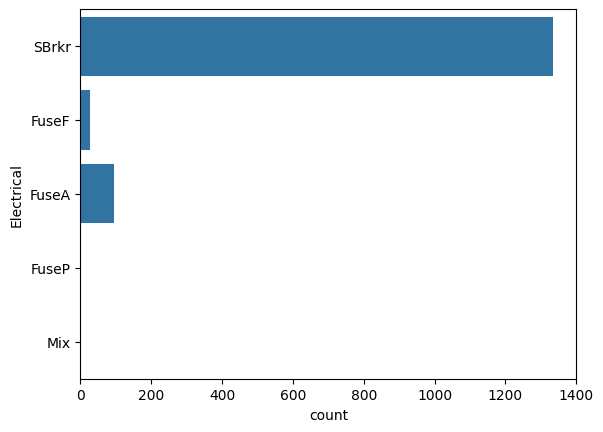

In [ ]:
sns.countplot(clean_data, y='Electrical')

In [ ]:
clean_data[clean_data['Electrical'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

- The Electrical feature is a categorical feature and has 1 missing value.
- The feature has a weak positive correlation with the house sale price.
- From the count plot of the feature it is observed that the category 'SBrkr' occurs the most.
- The mode will be used to impute the missing value for this feature.

In [ ]:
clean_data['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [ ]:
clean_data['Electrical'] = clean_data['Electrical'].fillna('SBrkr')

In [ ]:
clean_data['Electrical'].isnull().sum()

0

In [ ]:
clean_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

### Univariate Analysis

In [5]:
data = clean_data.copy()

In [6]:
data.shape

(1460, 74)

In [ ]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces     FireplaceQu GarageType  \
0          Gd             8        Typ           0  Not Applicable     Attchd   
1          TA             6        Typ           1              TA     Attchd   
2          Gd             6        Typ           1              TA     Attchd   
3          

In [ ]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
my_report = sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)


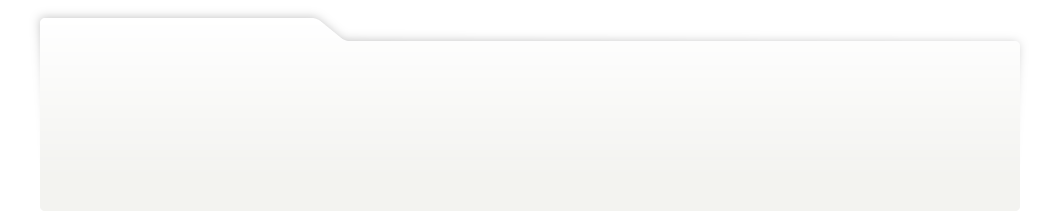
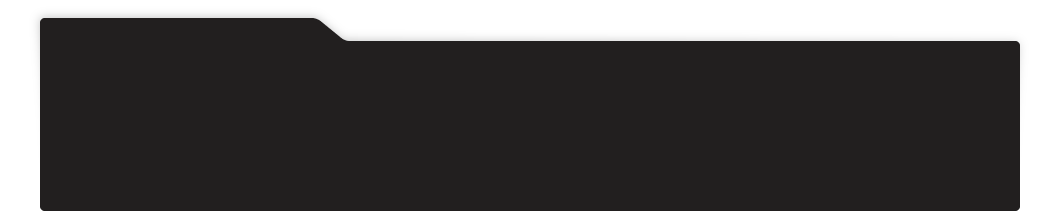
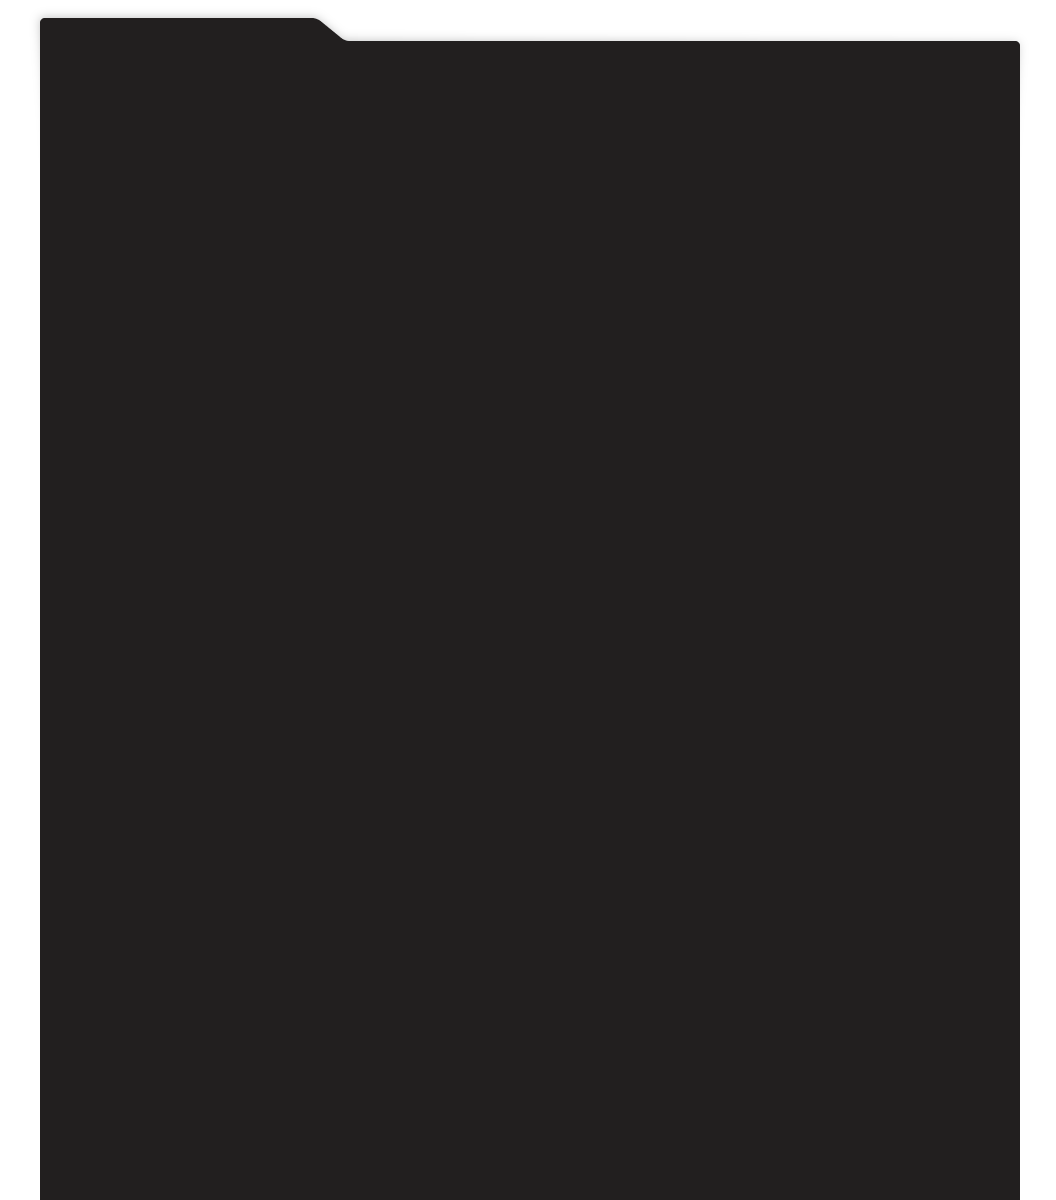
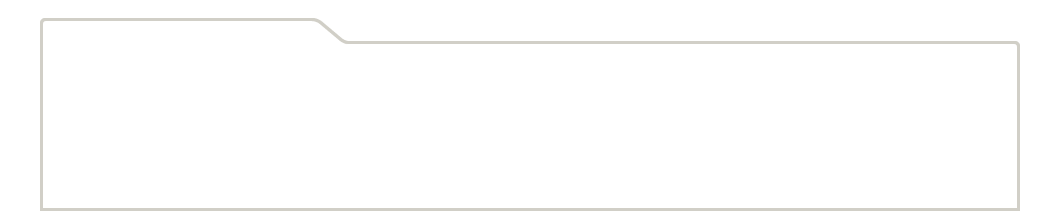
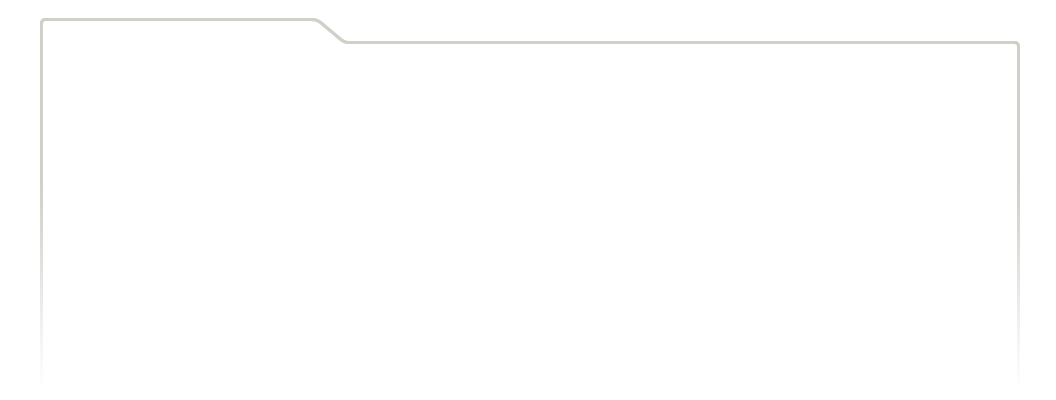
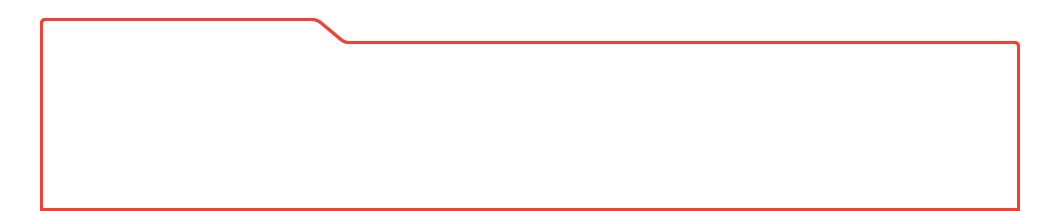
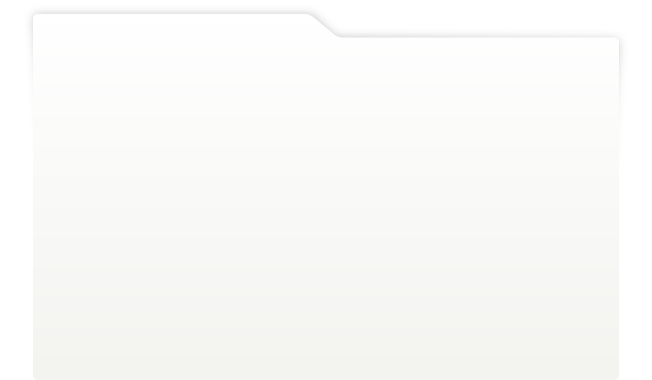
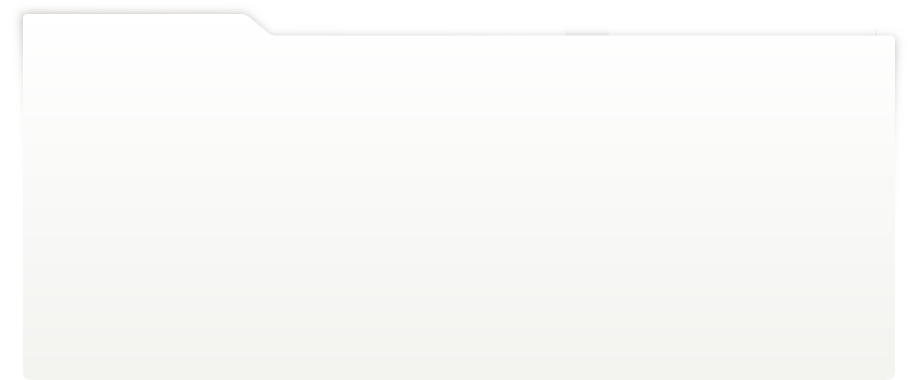
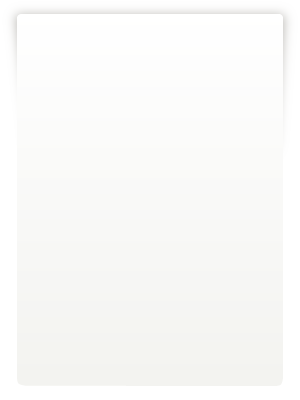
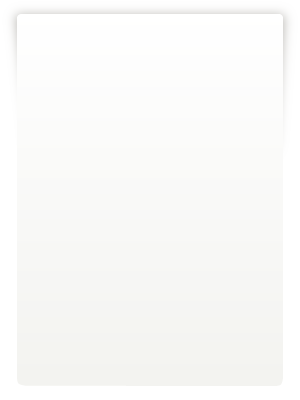
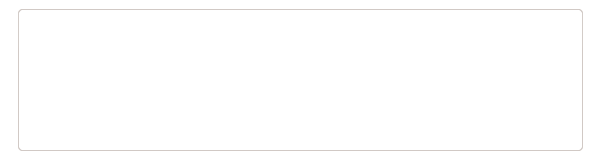
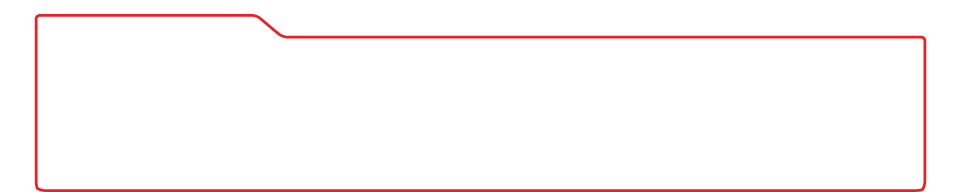
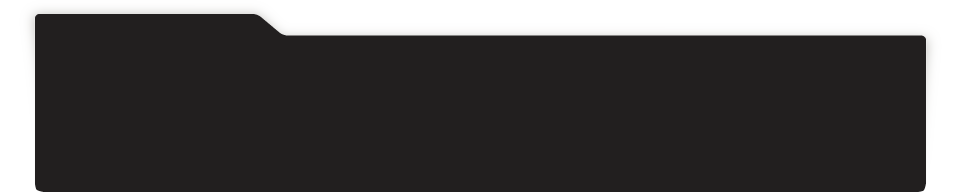
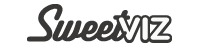
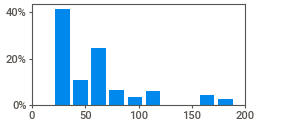
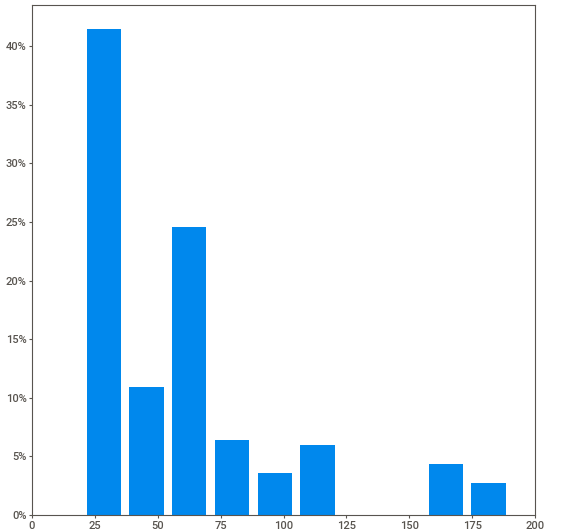
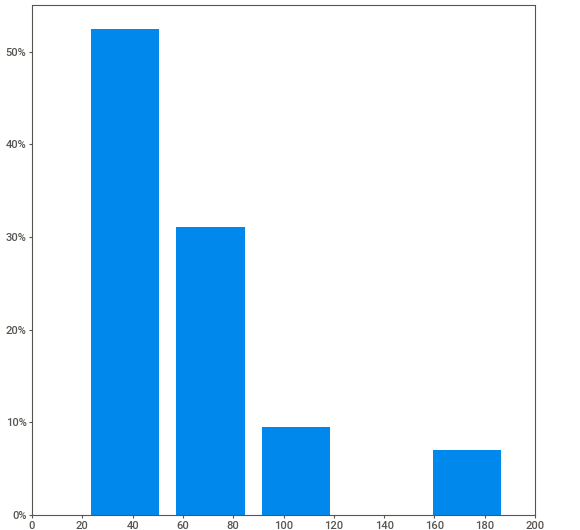
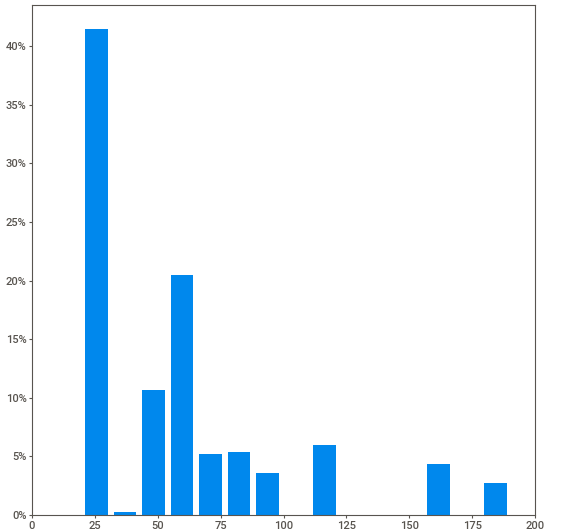
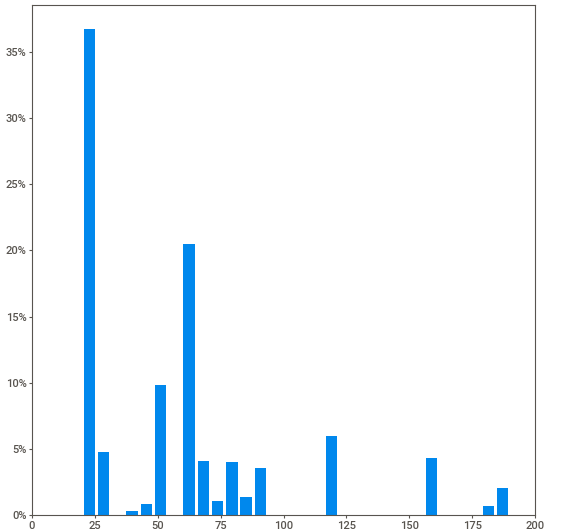
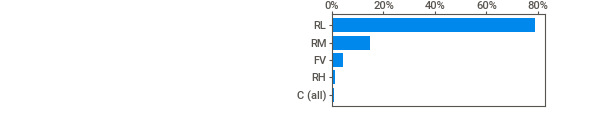
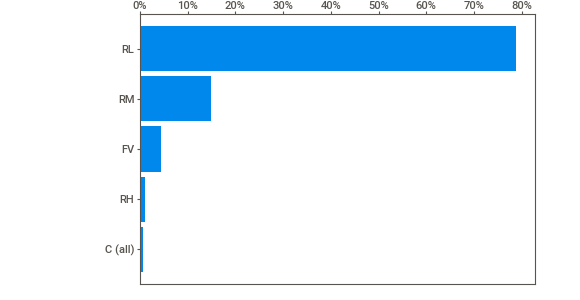
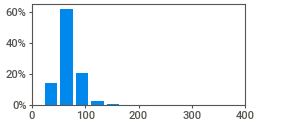
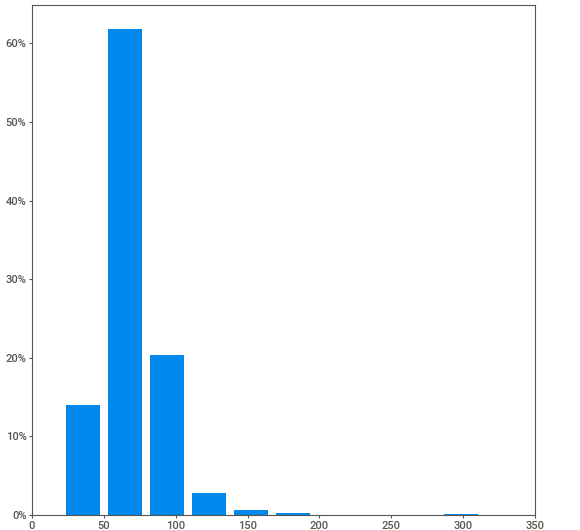
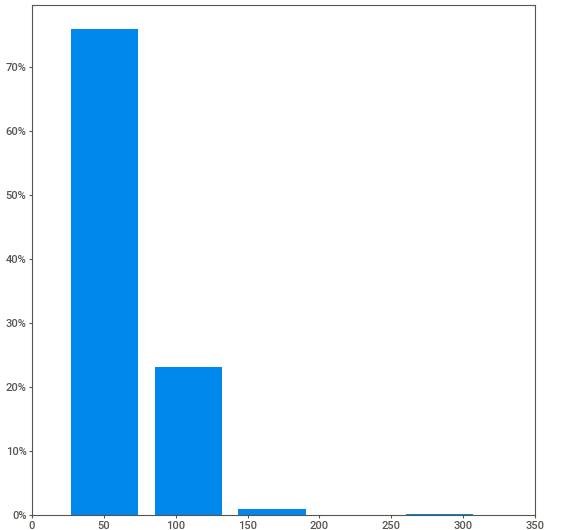
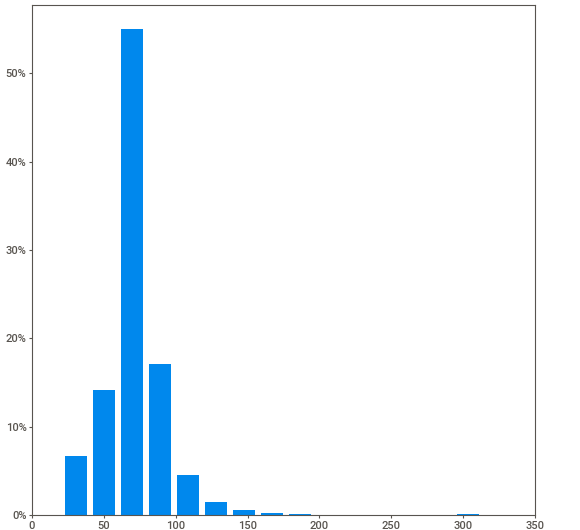
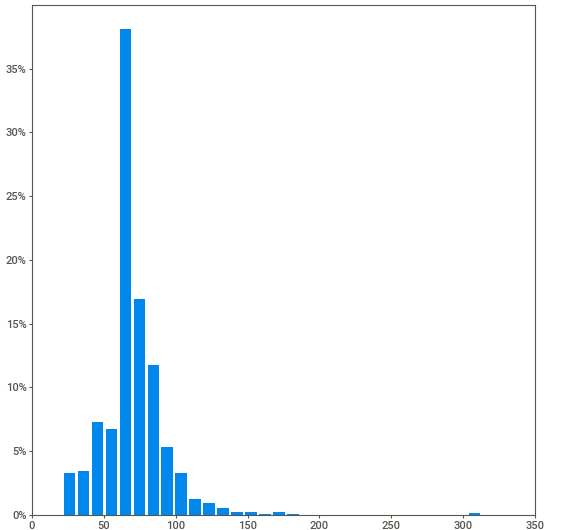
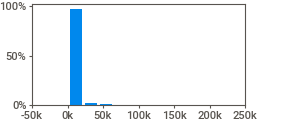
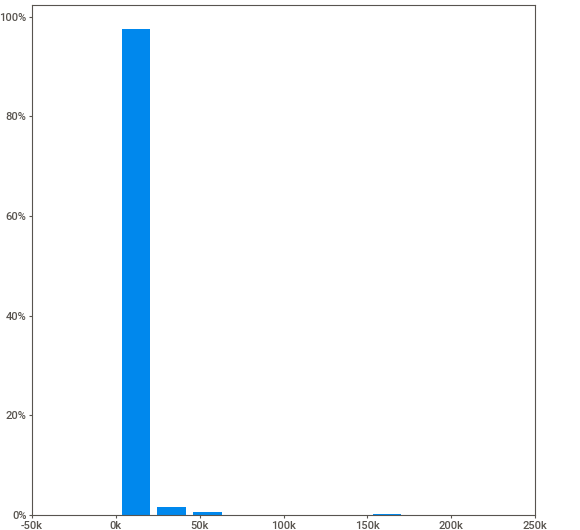
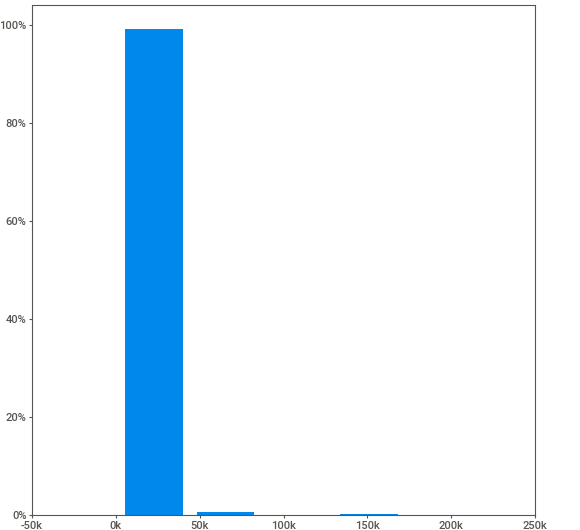
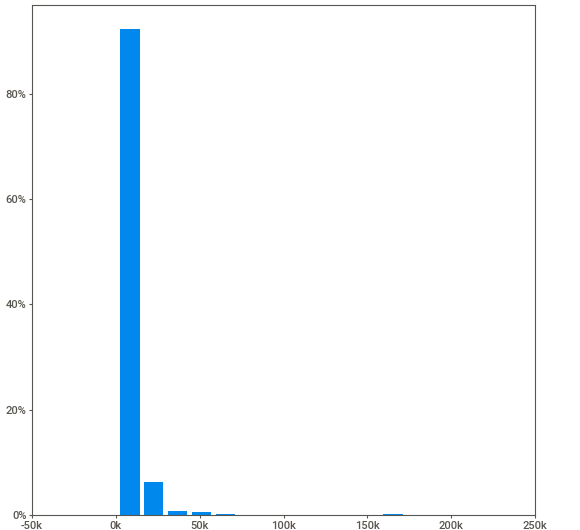
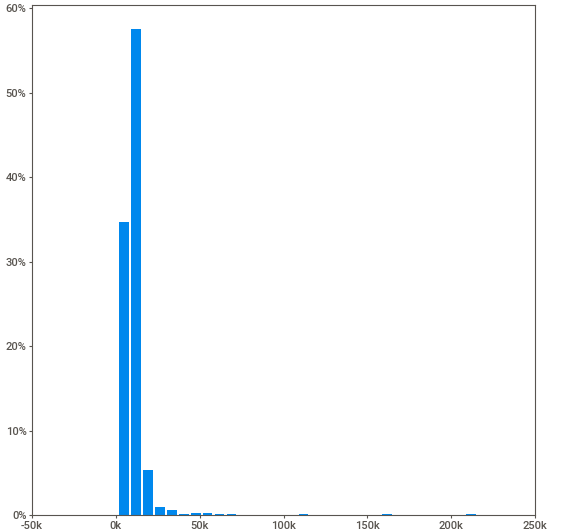
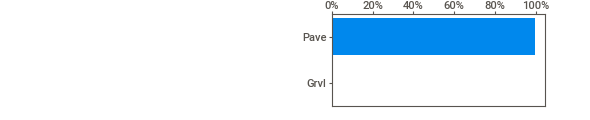
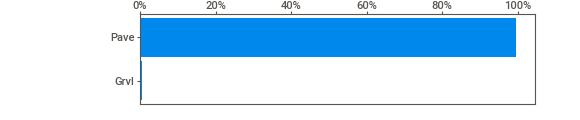
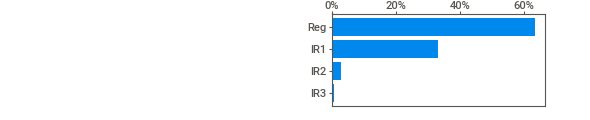
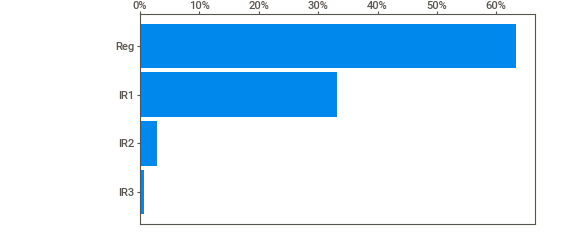
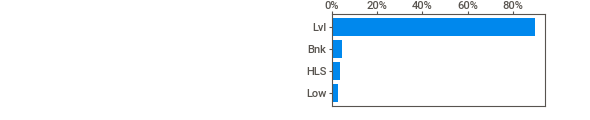
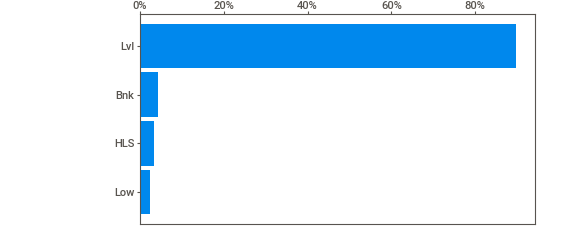
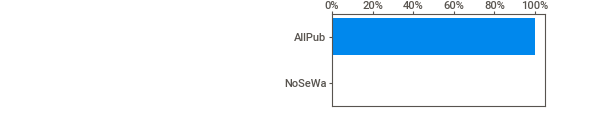
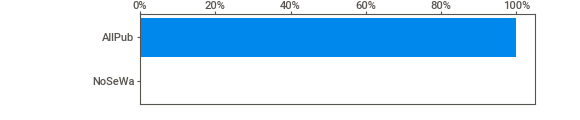
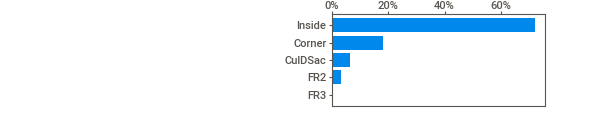
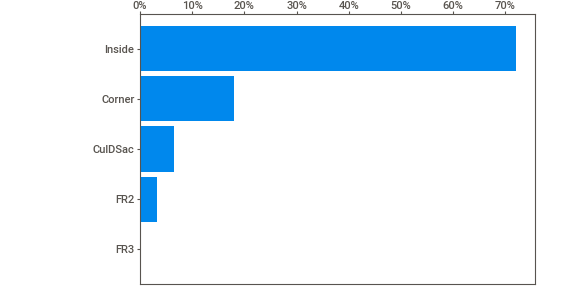
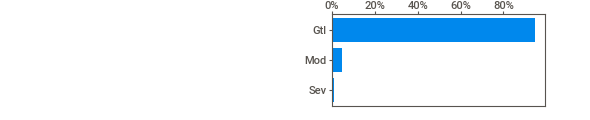
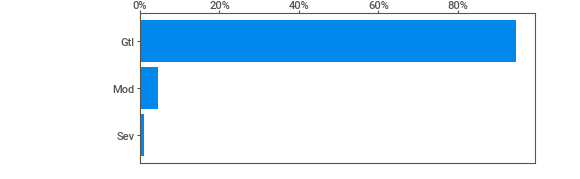
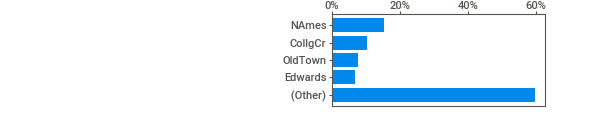
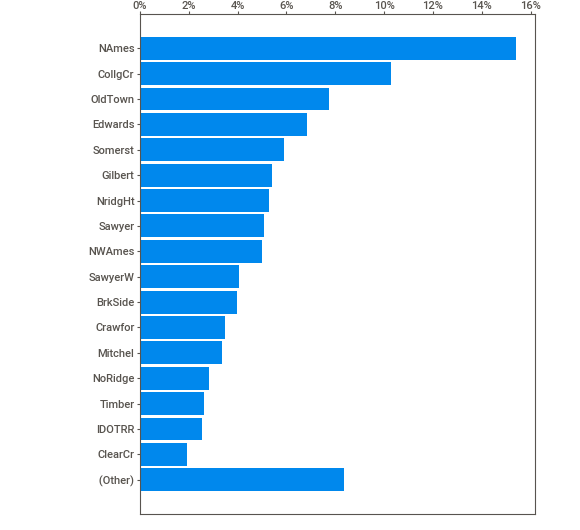
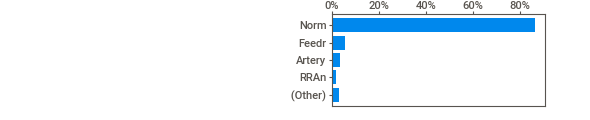
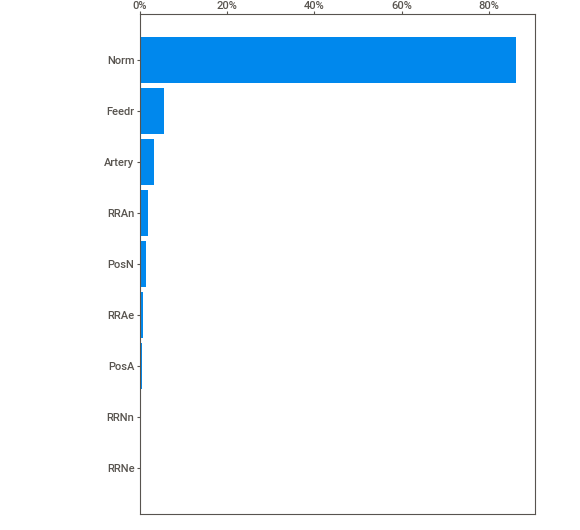
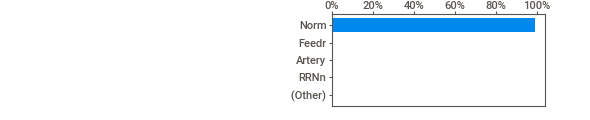
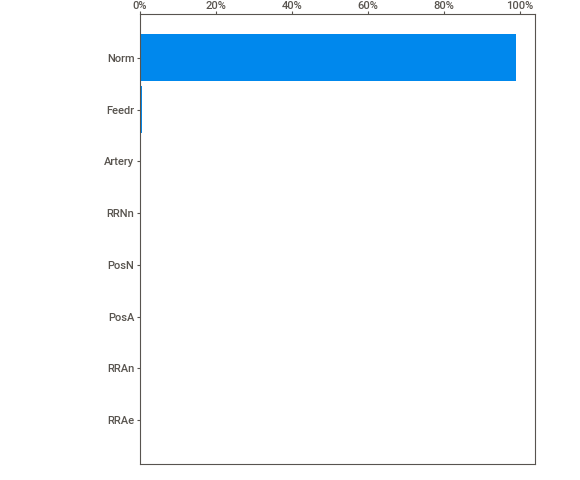
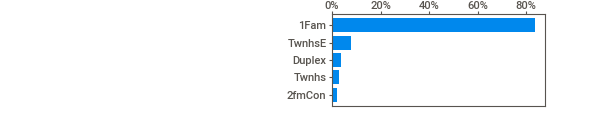
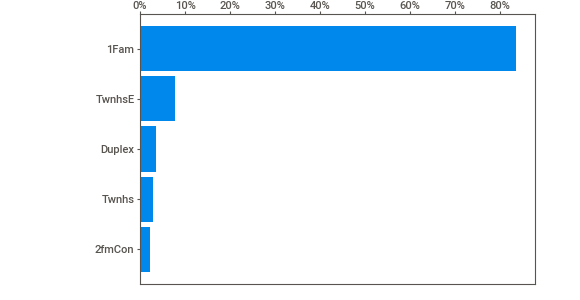
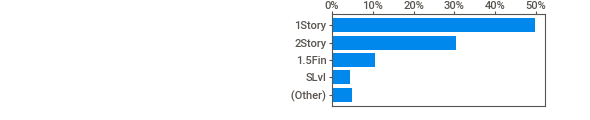
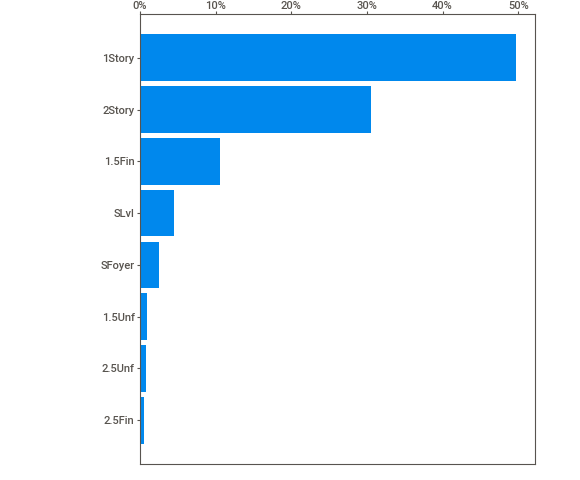
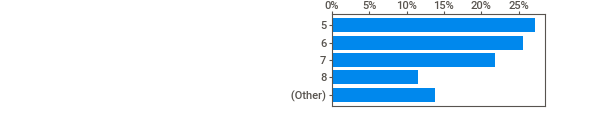
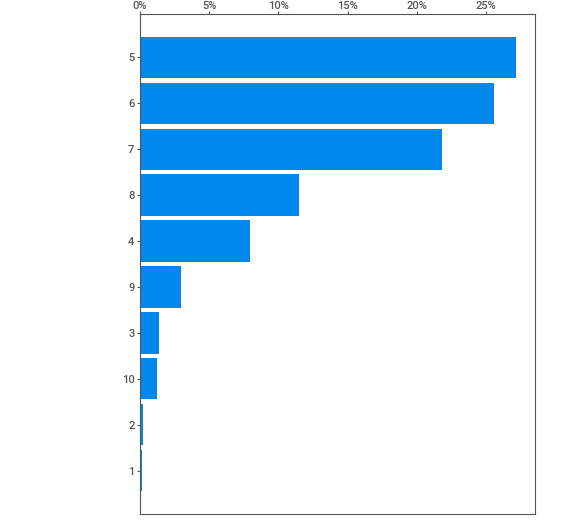
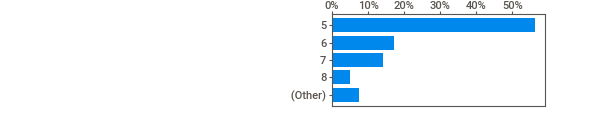
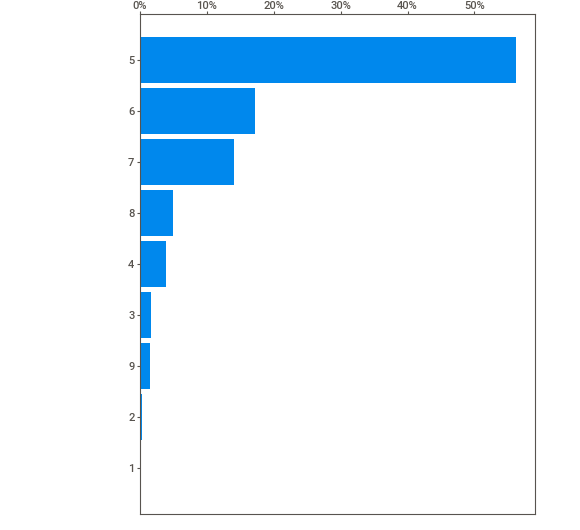
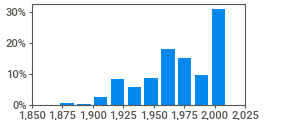
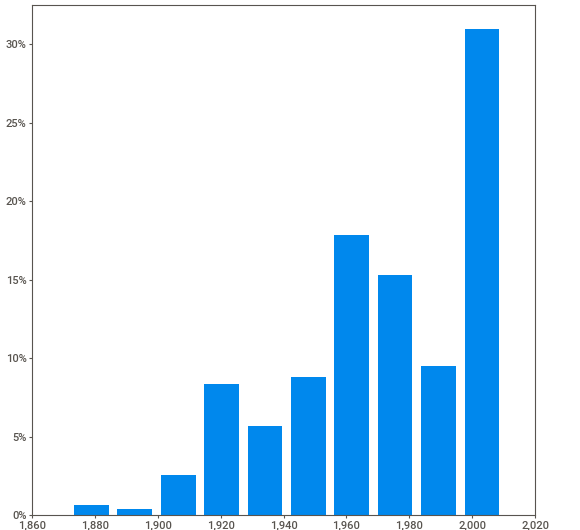
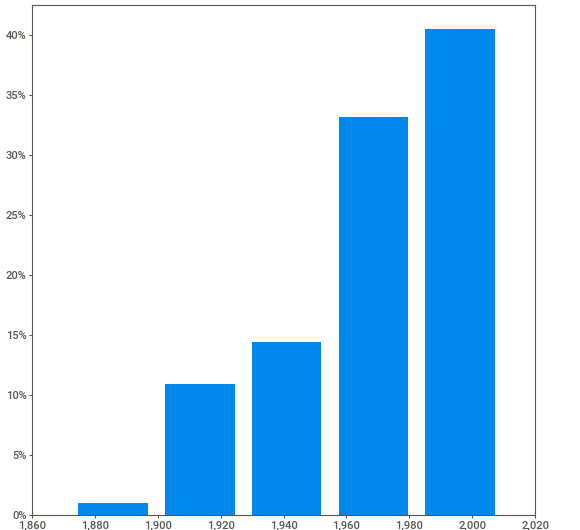
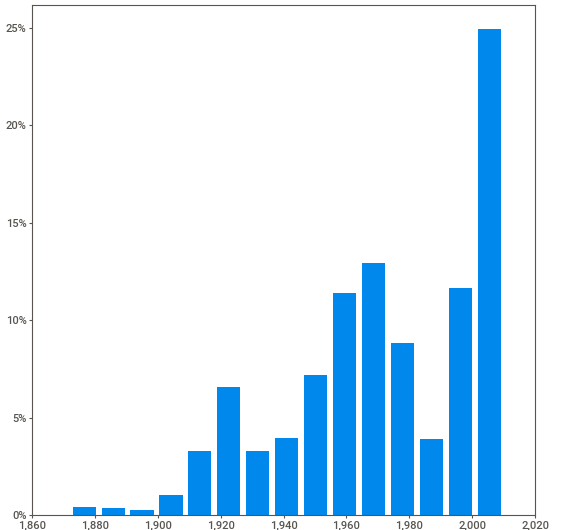
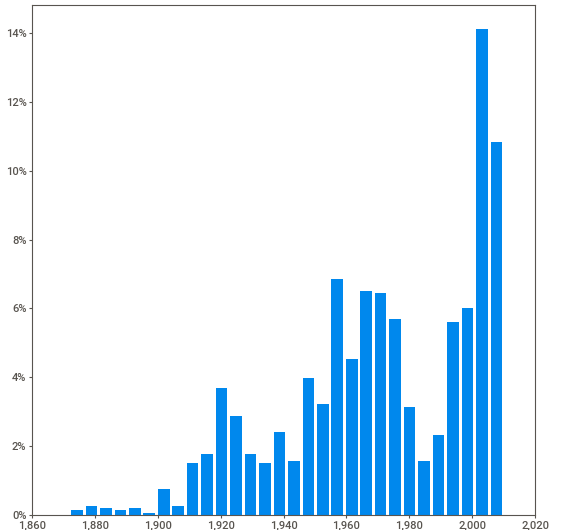
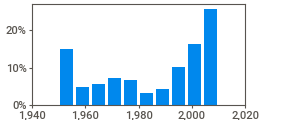
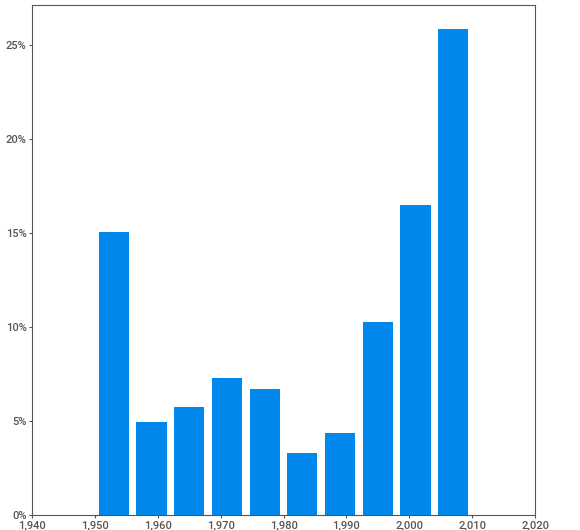
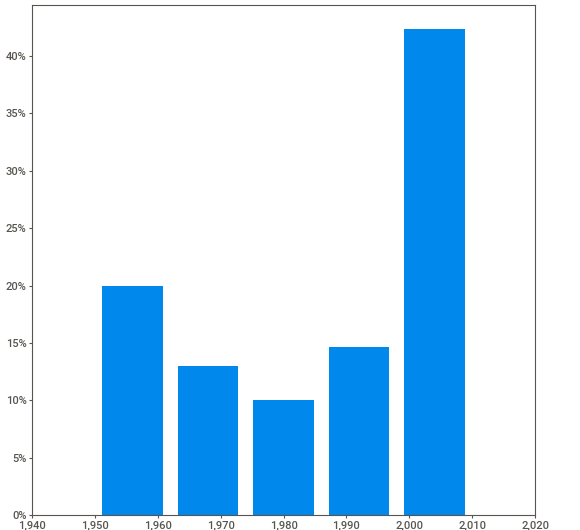
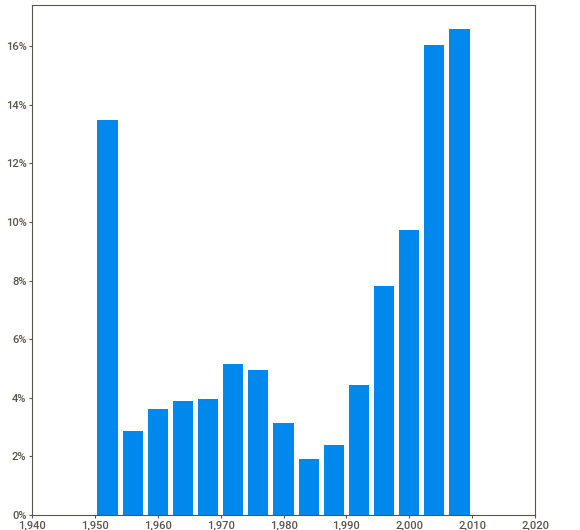
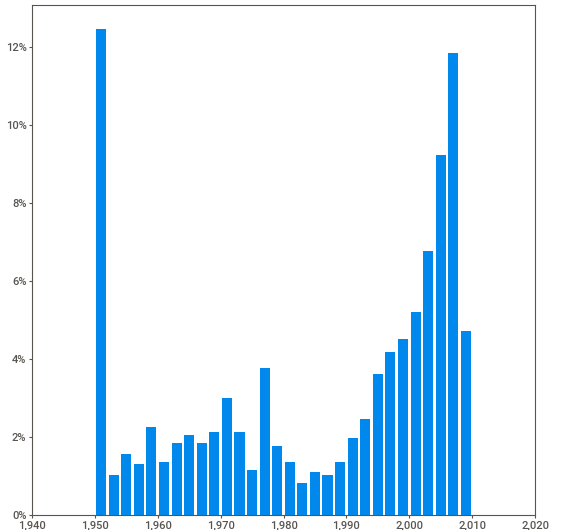
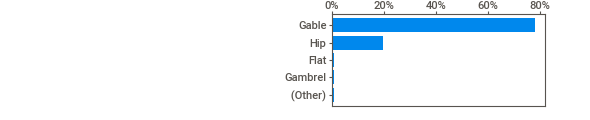
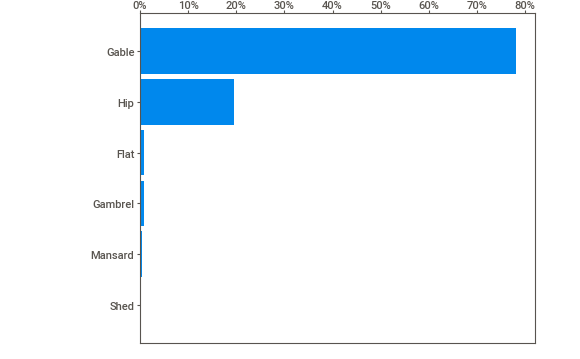
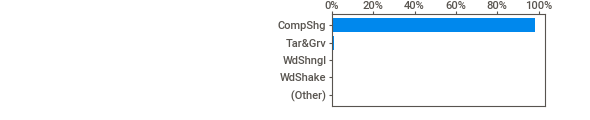
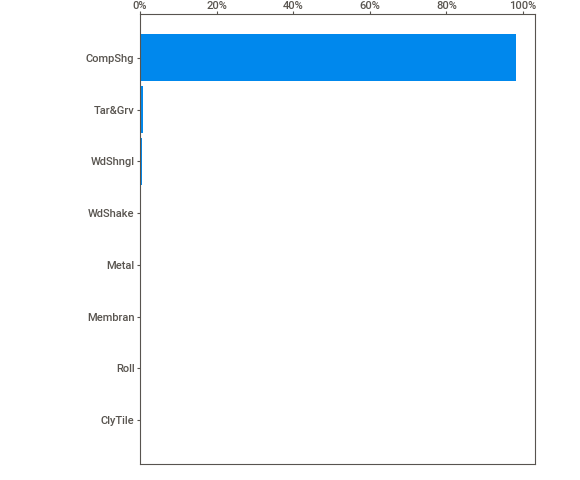
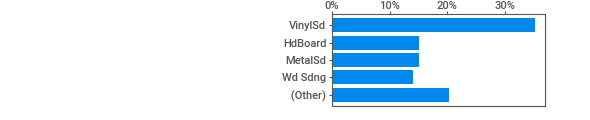
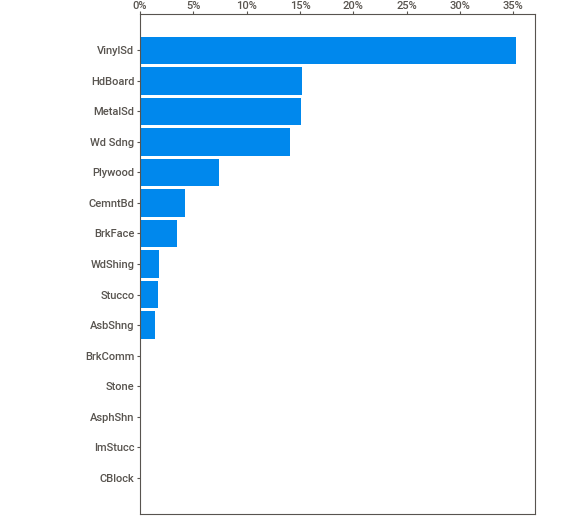
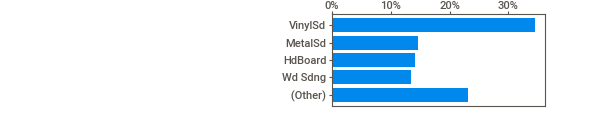
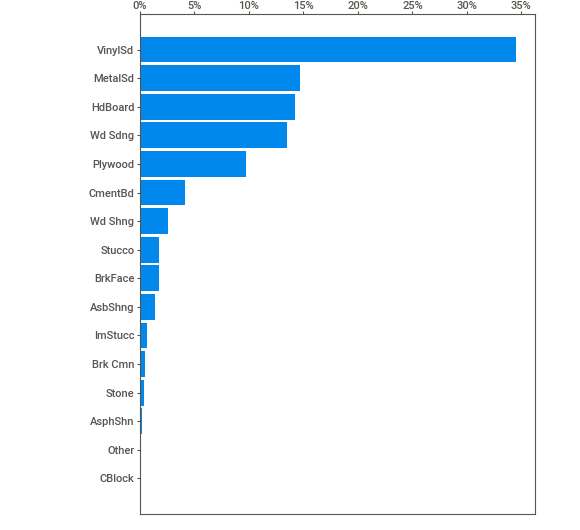
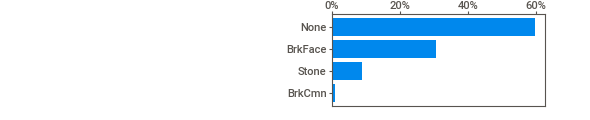
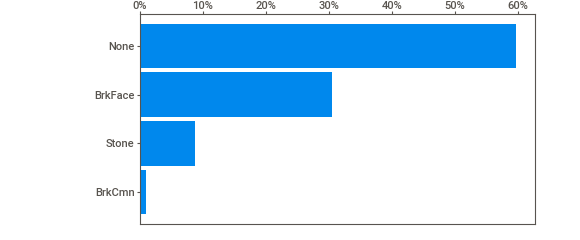
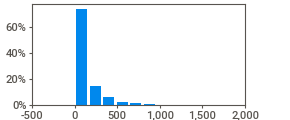
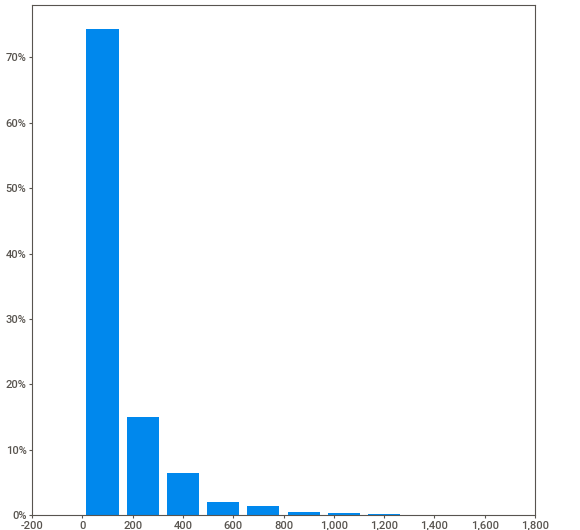
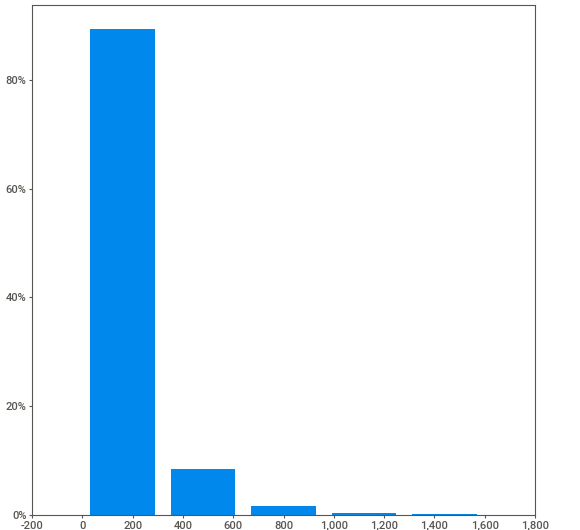
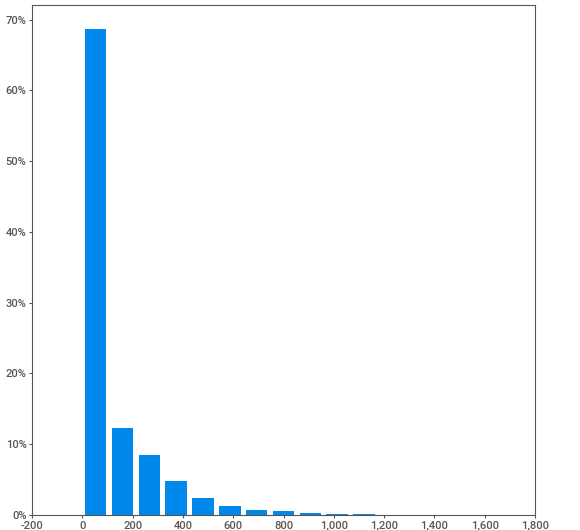
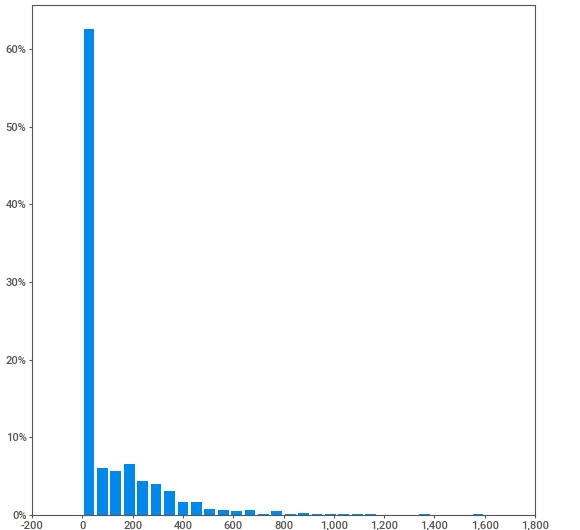
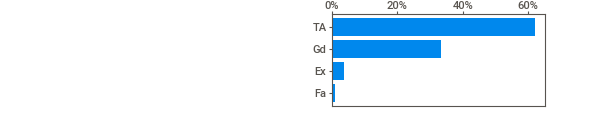
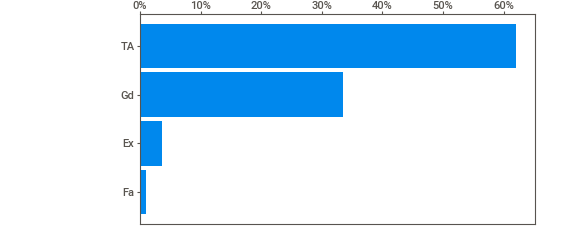
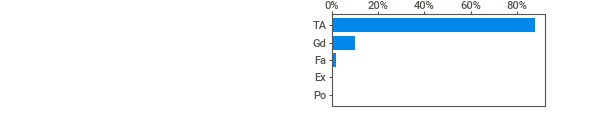
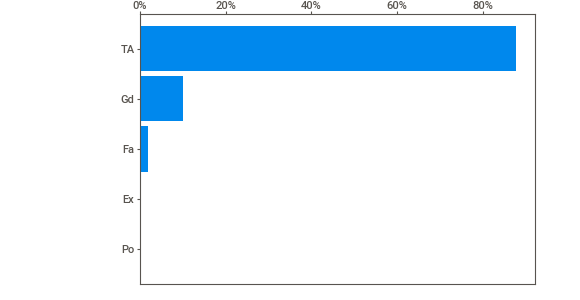
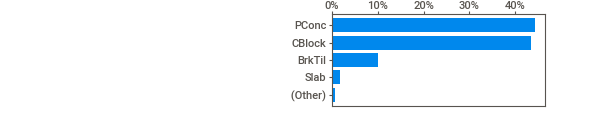
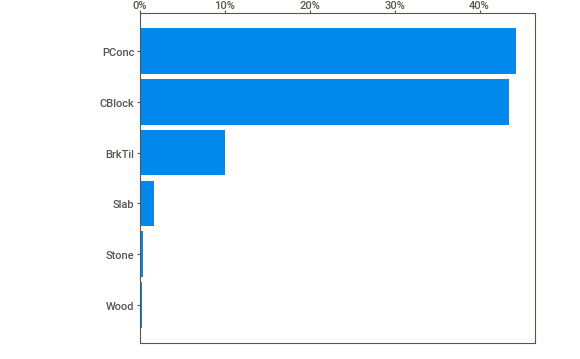
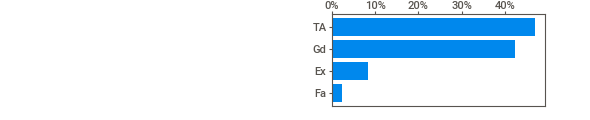
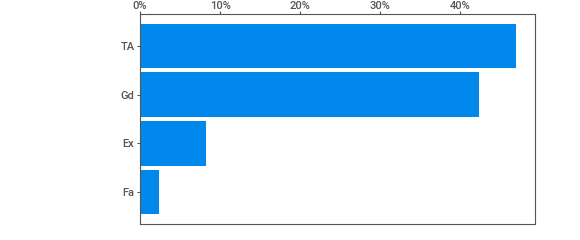
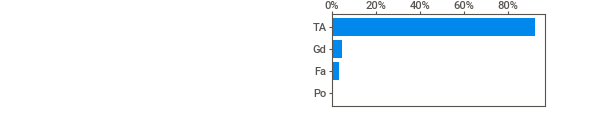
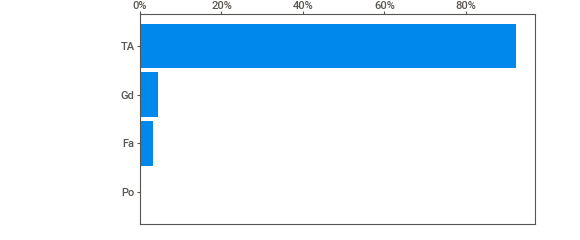
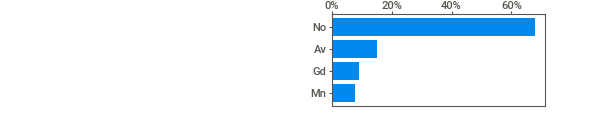
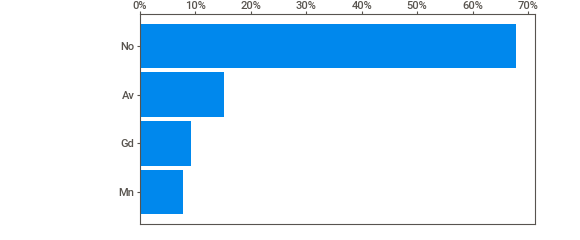
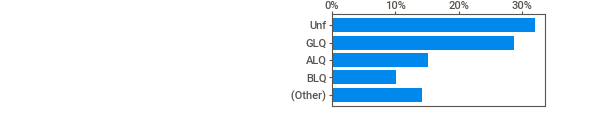
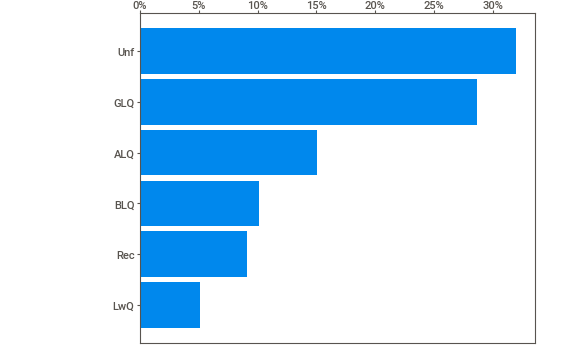
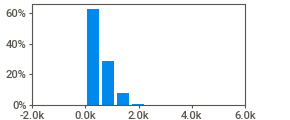
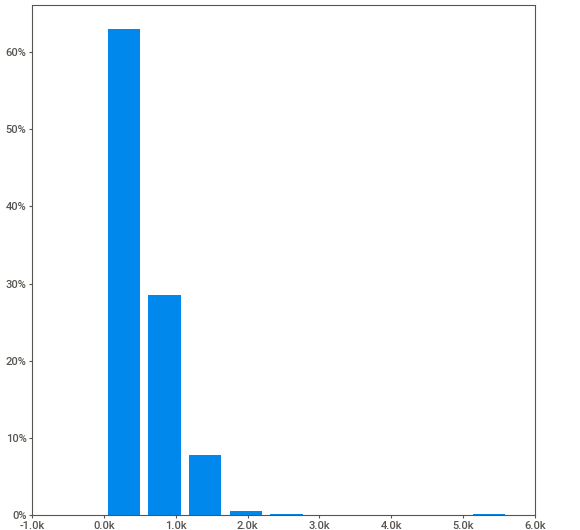
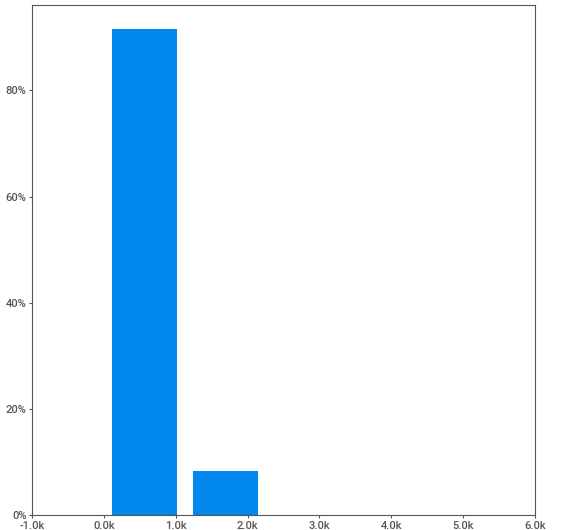
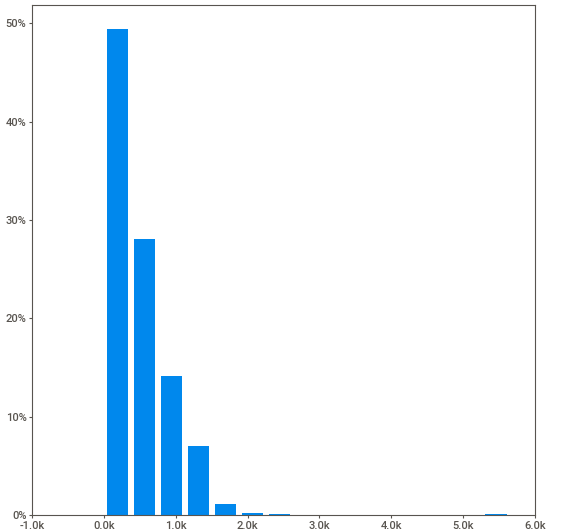
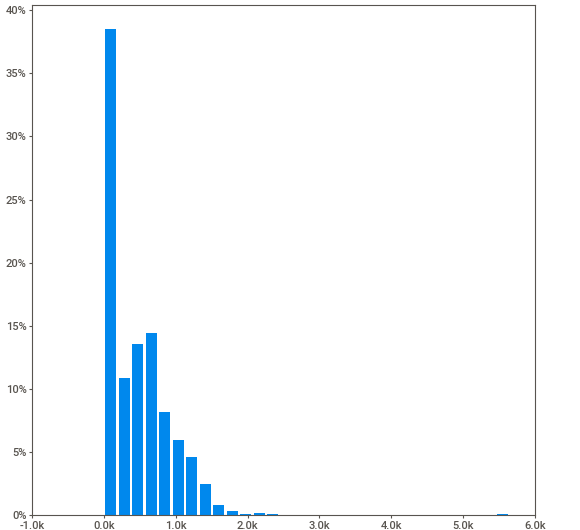
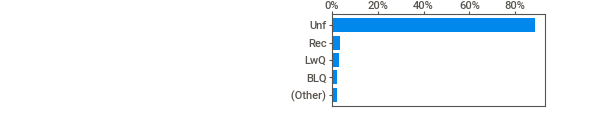
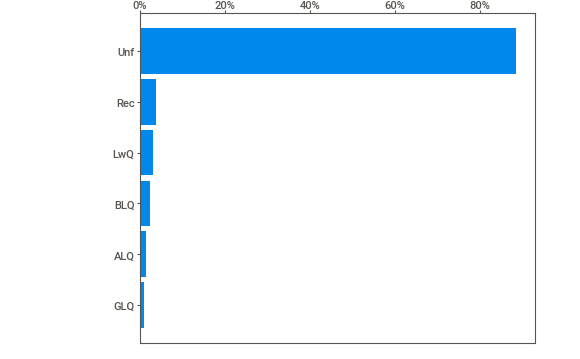
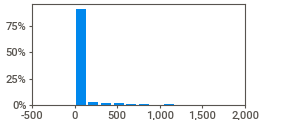
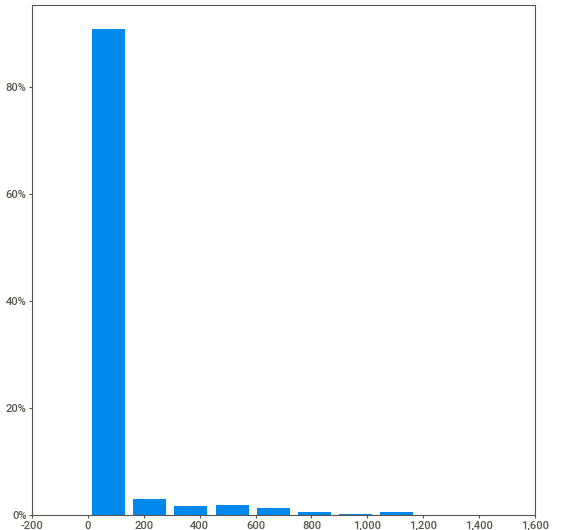
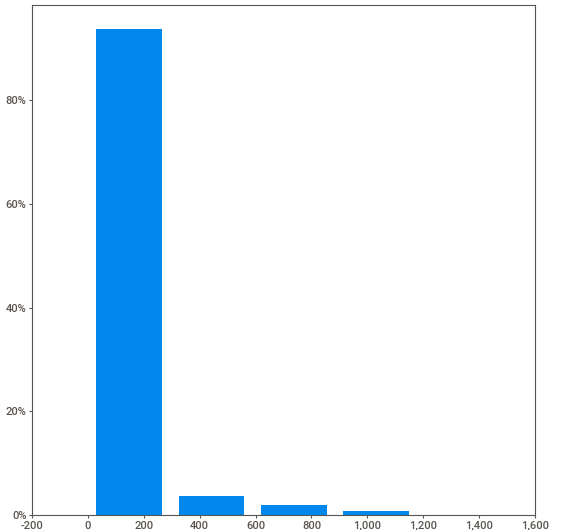
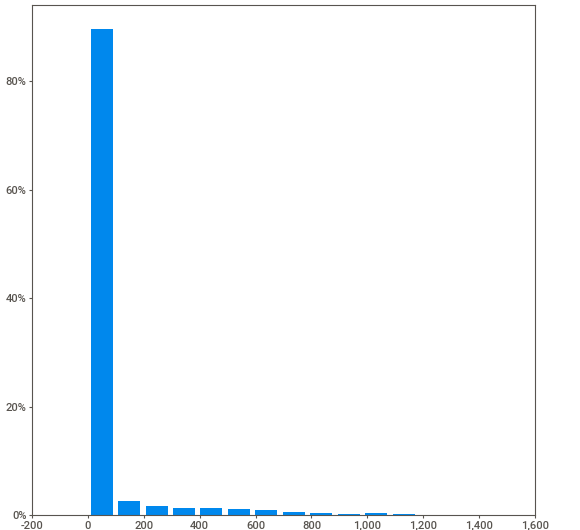
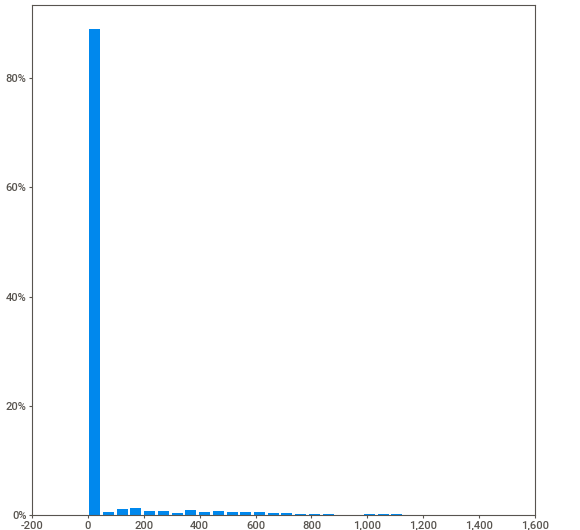
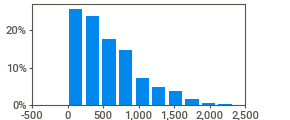
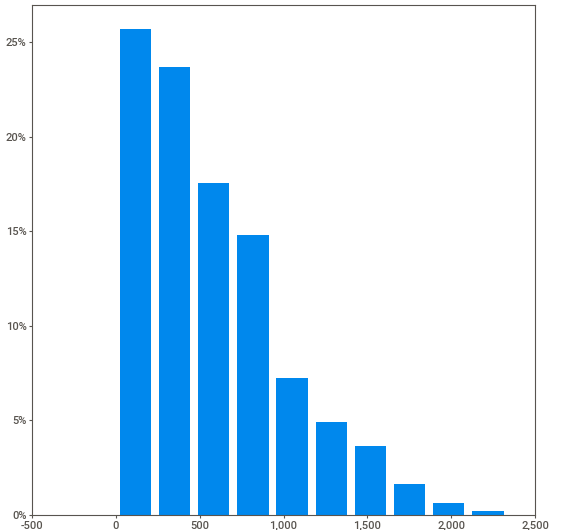
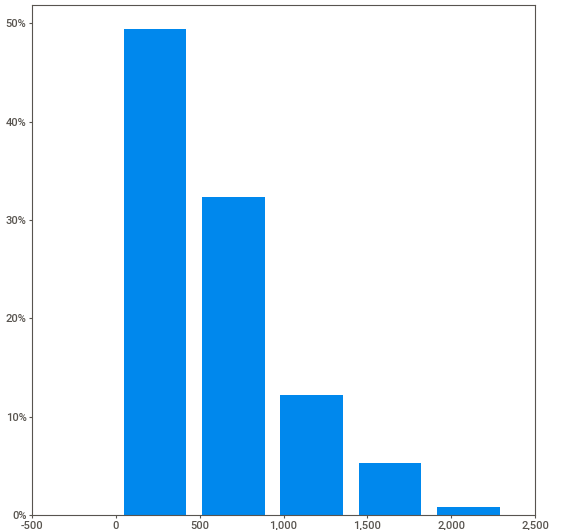
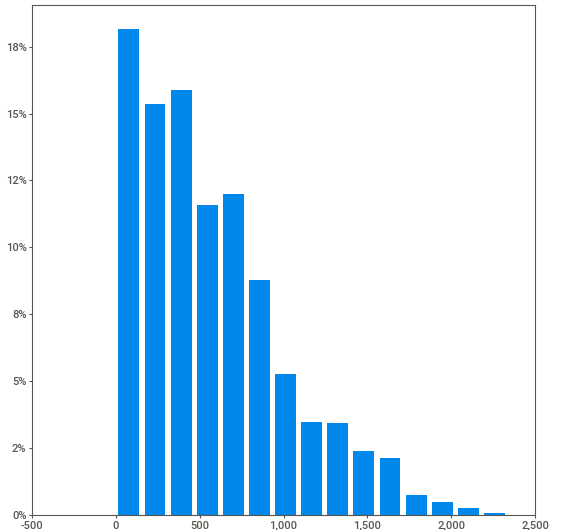
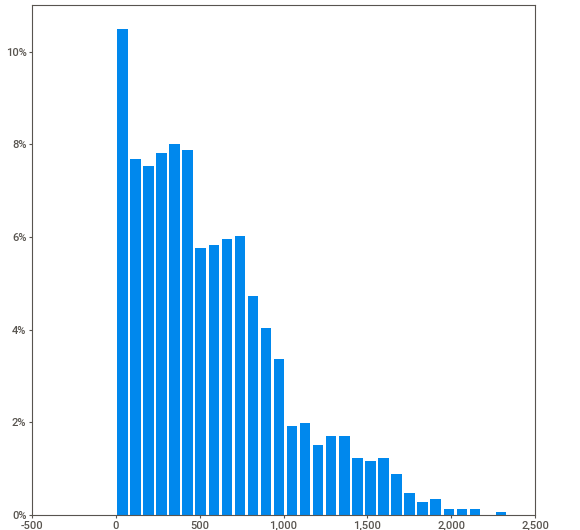
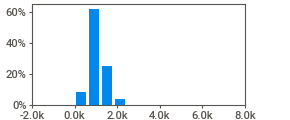
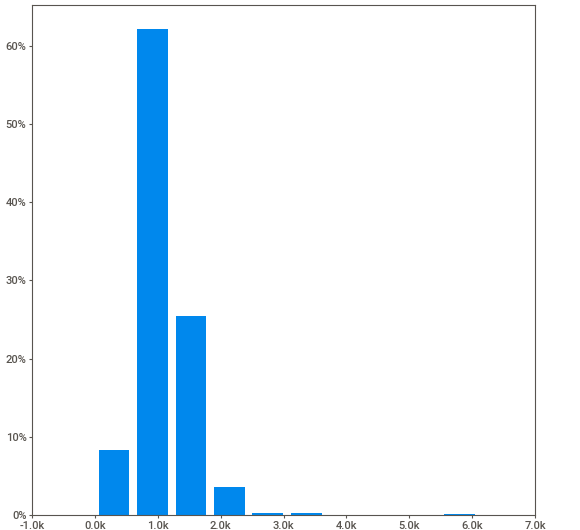
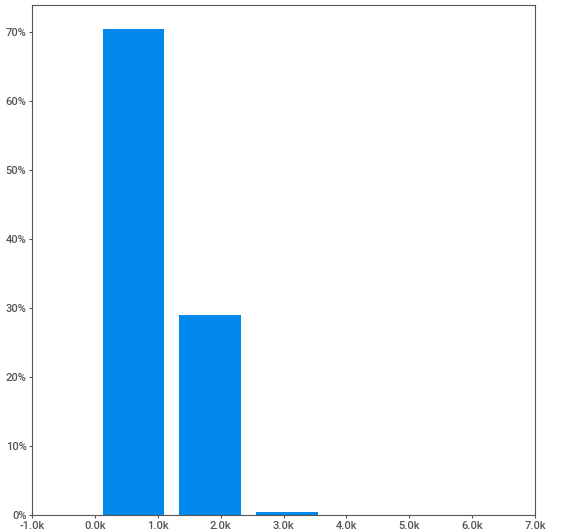
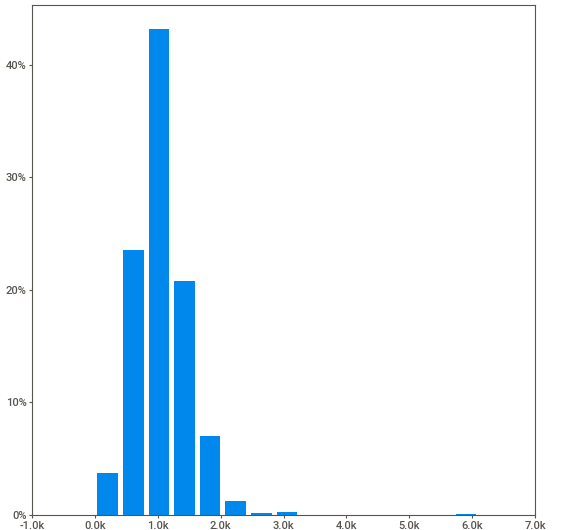
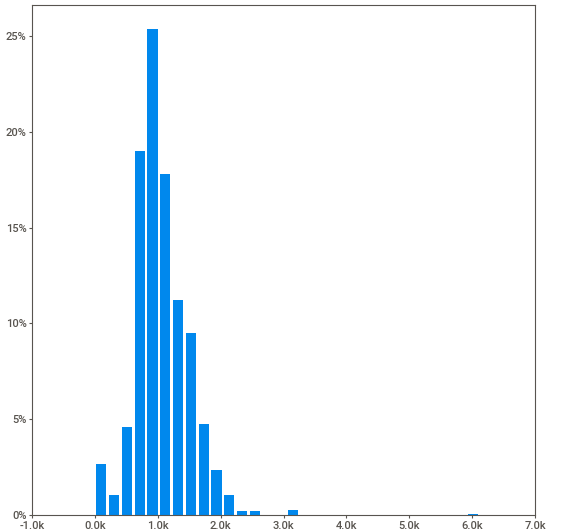
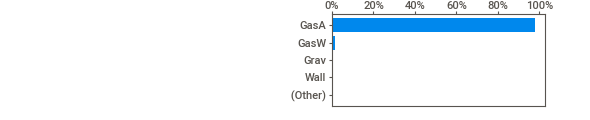
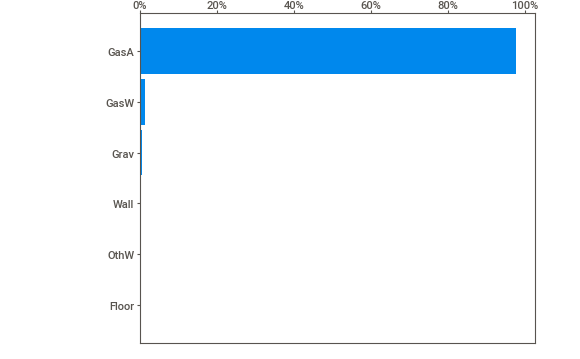
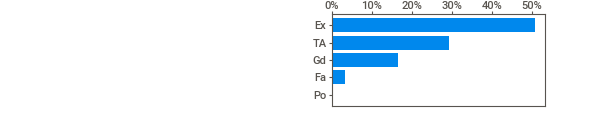
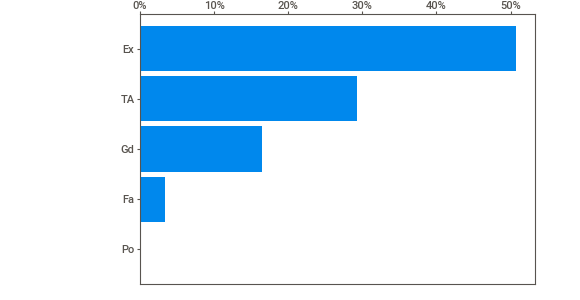
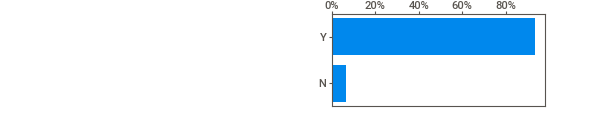
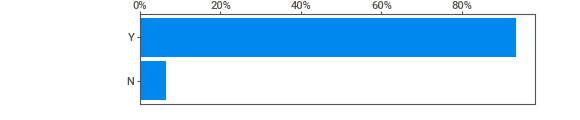
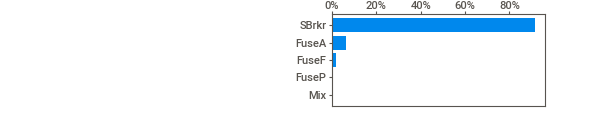
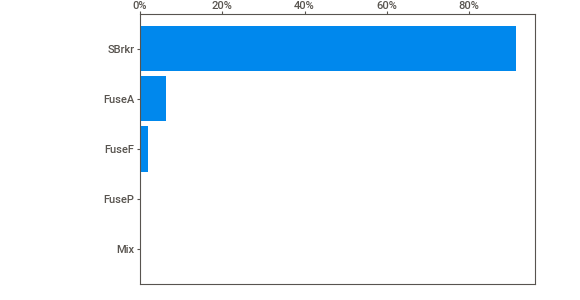
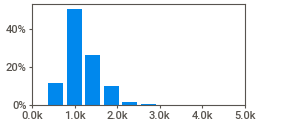
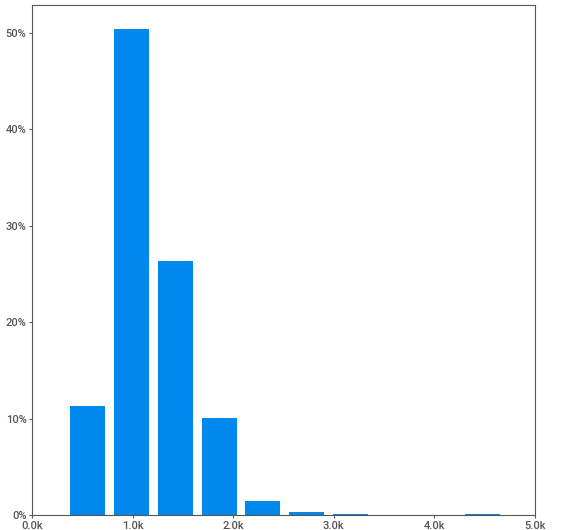
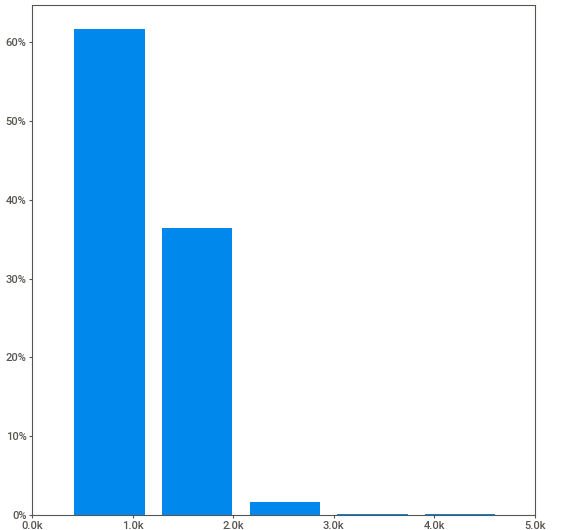
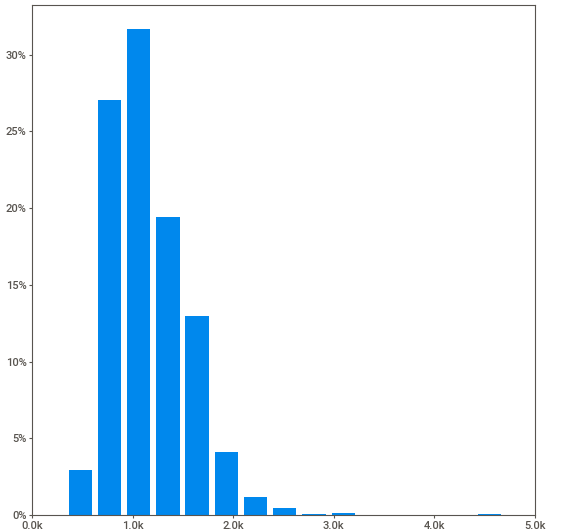
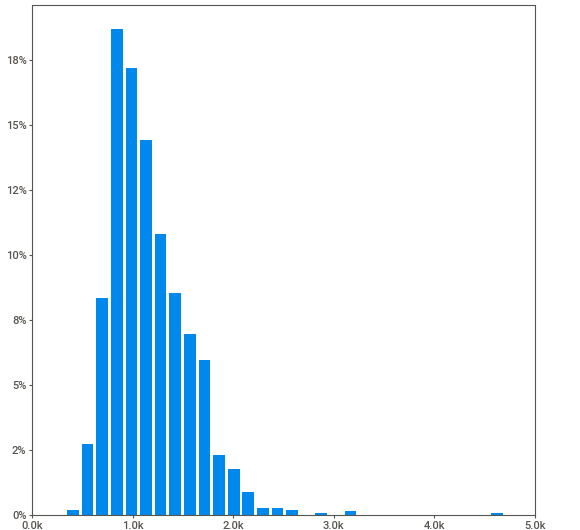
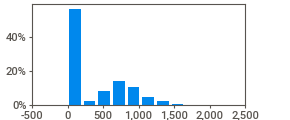
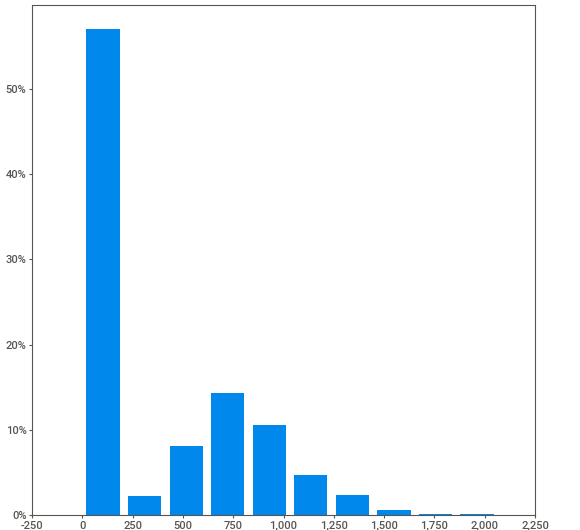
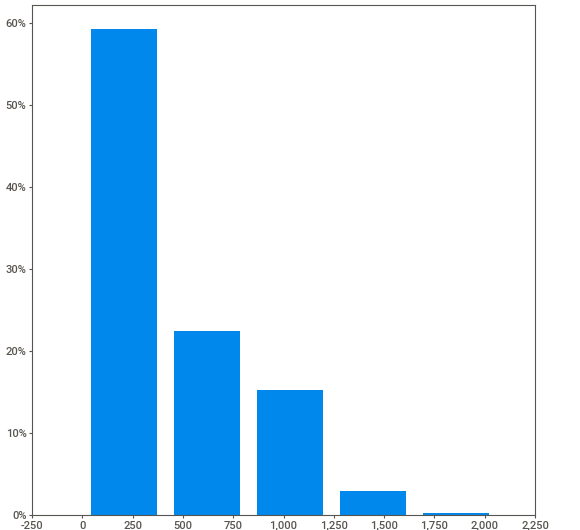
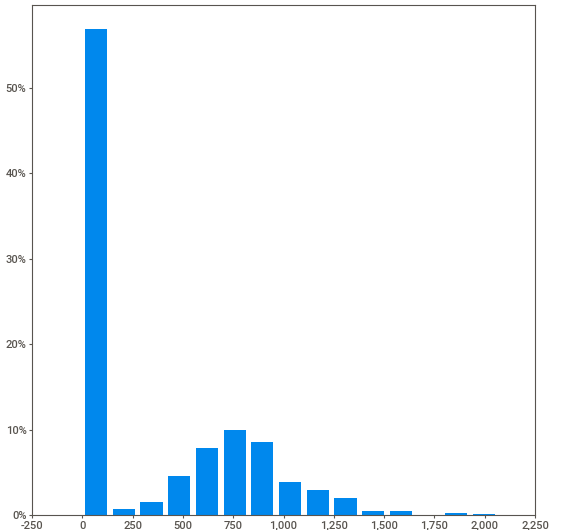
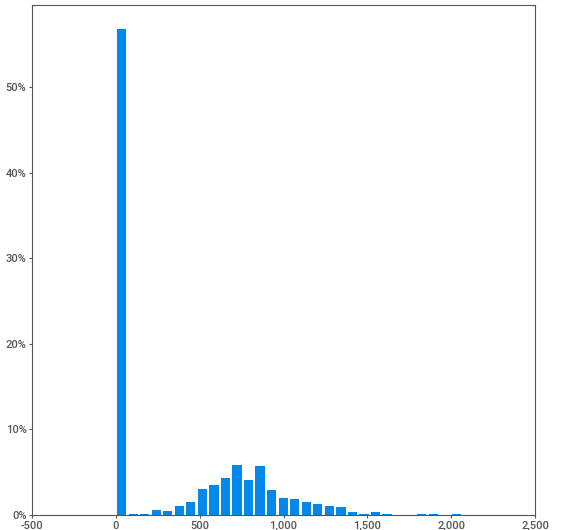
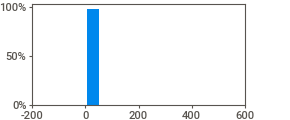
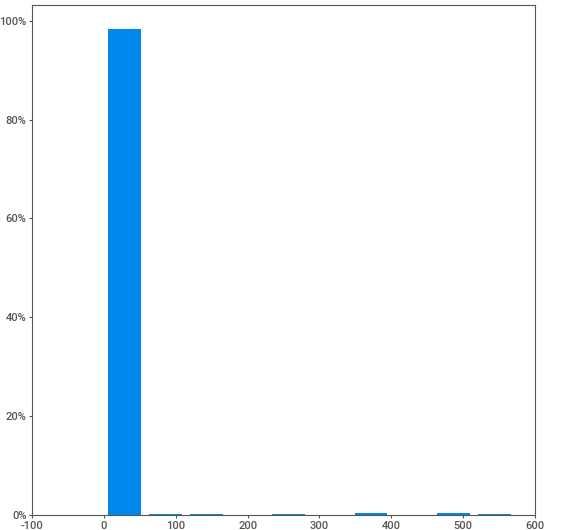
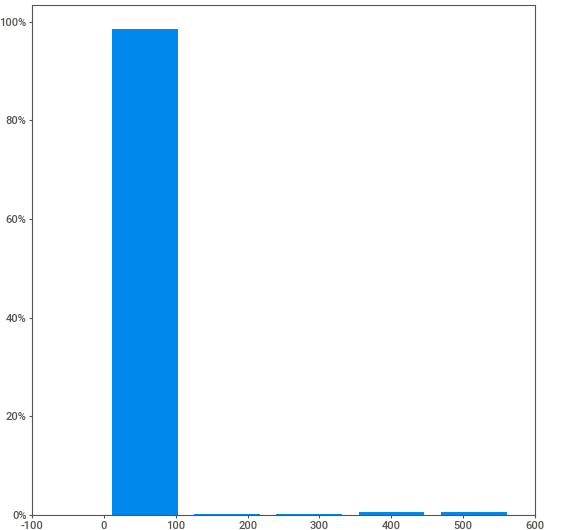
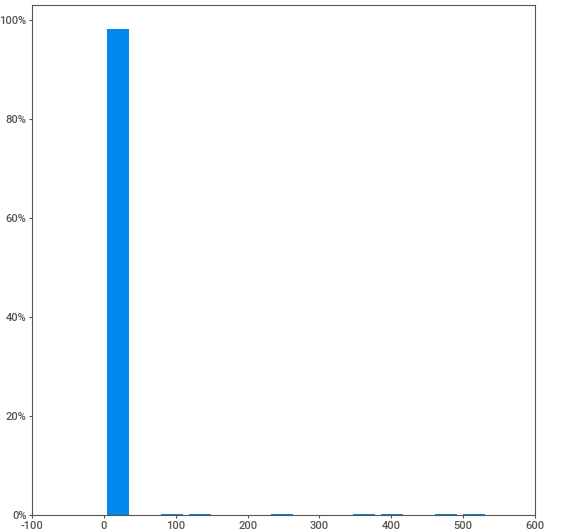
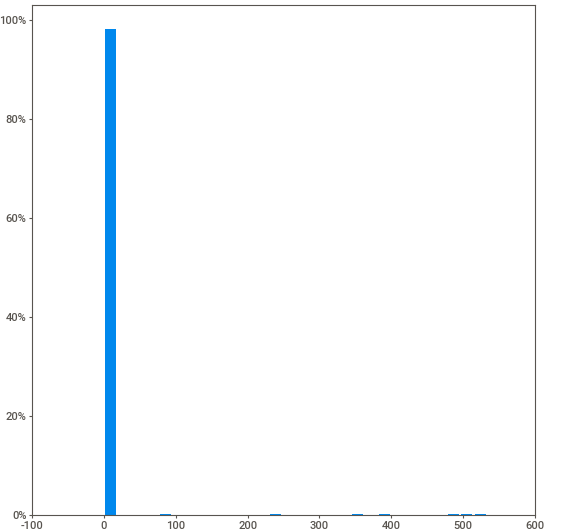
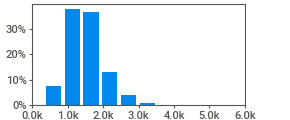
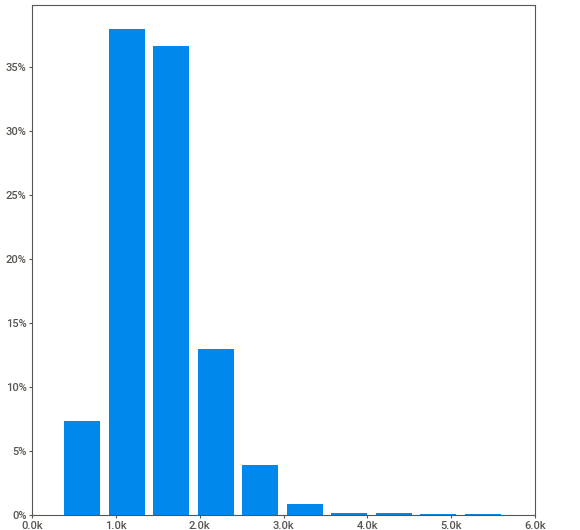
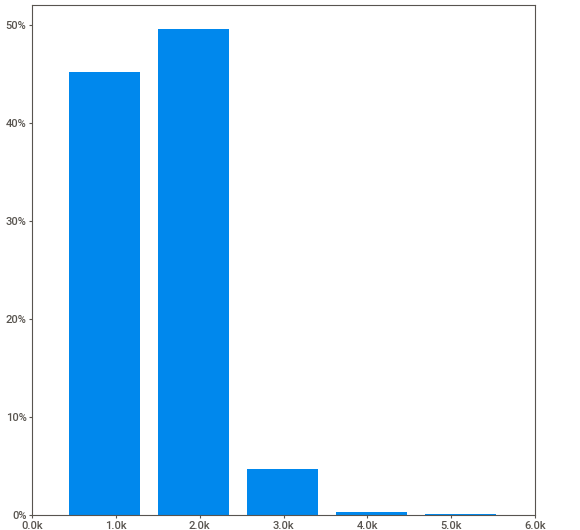
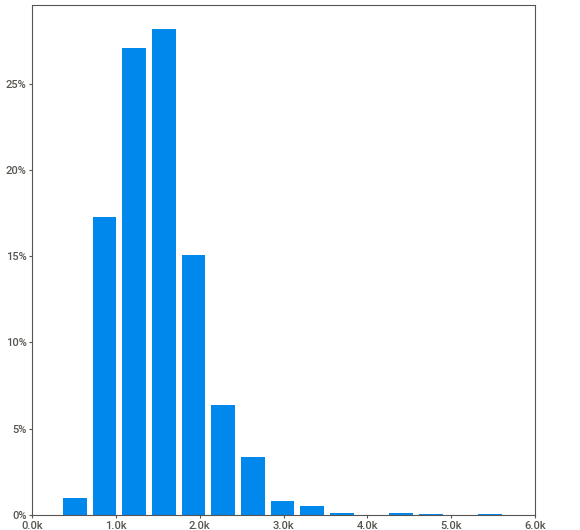
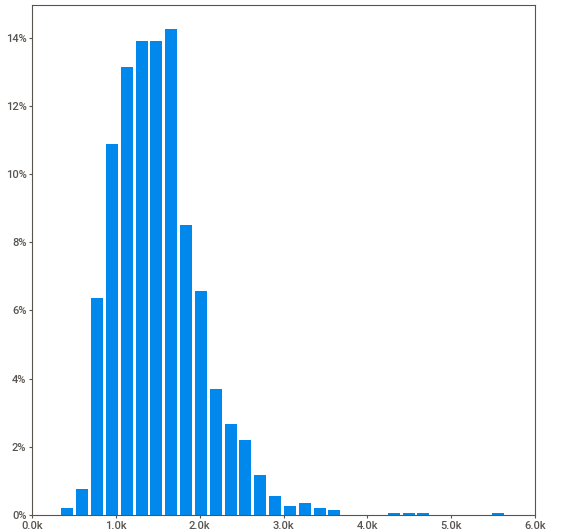
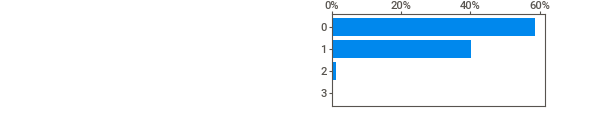
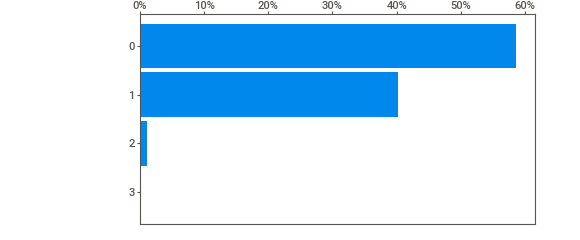
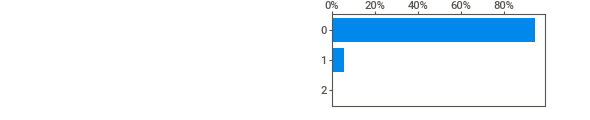
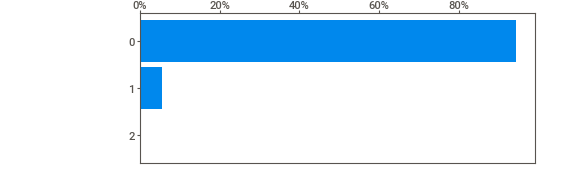
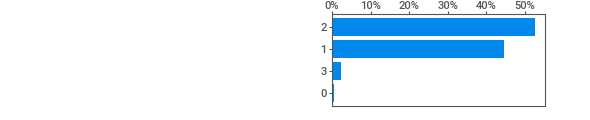
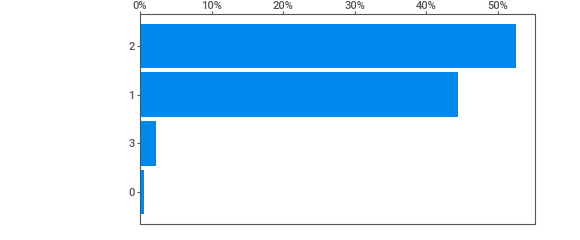
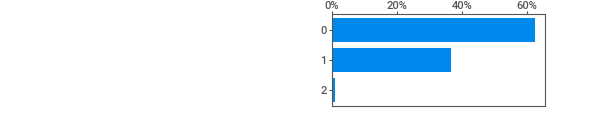
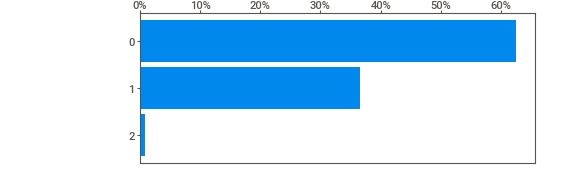
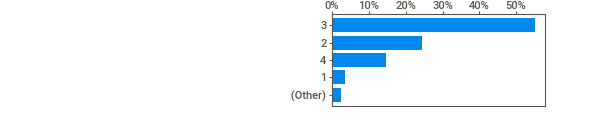
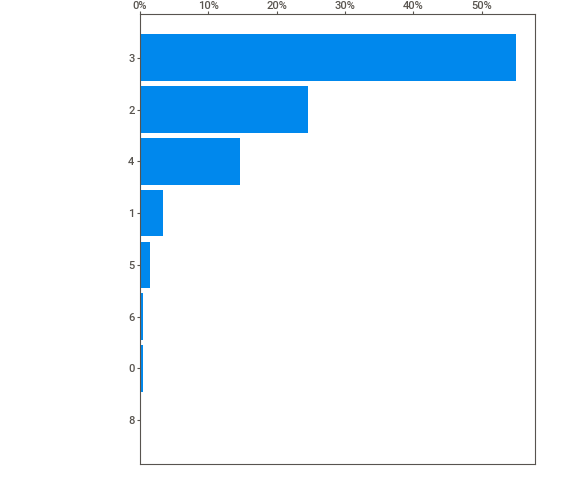
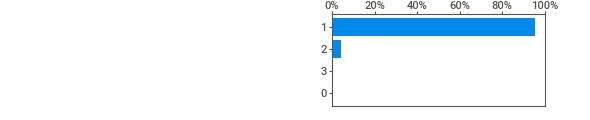
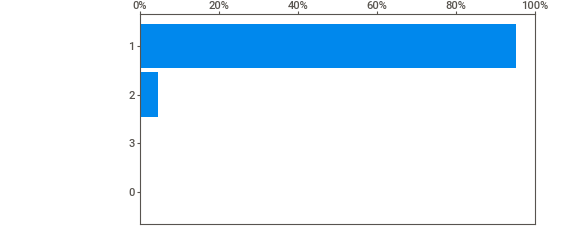
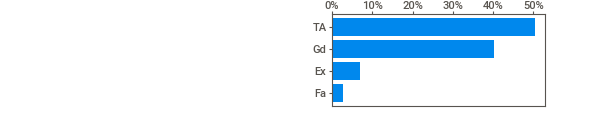
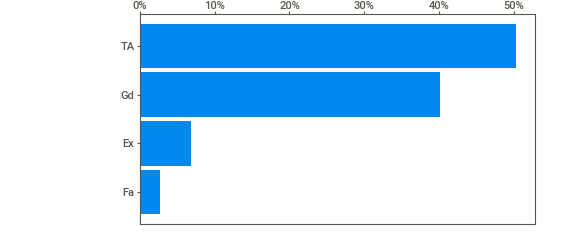
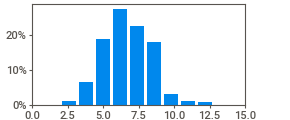
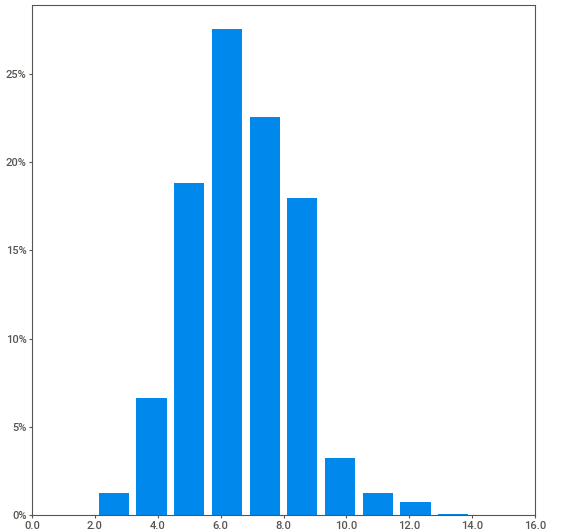
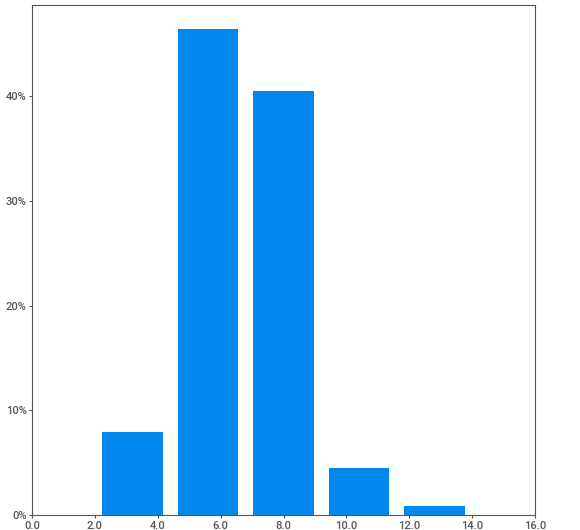
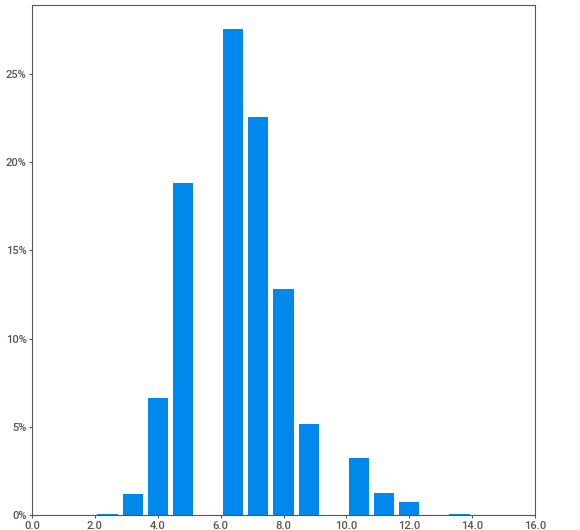
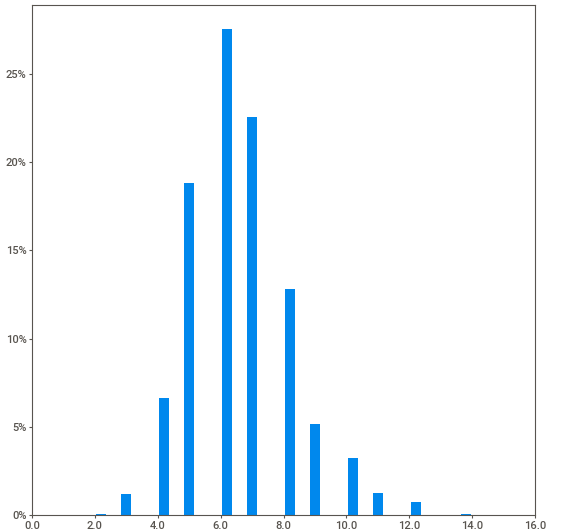
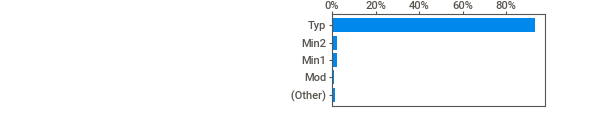
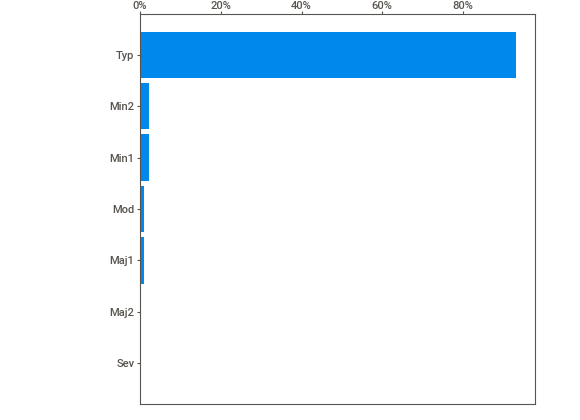
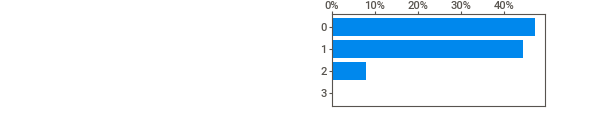
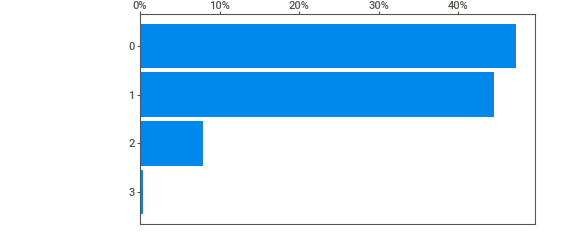
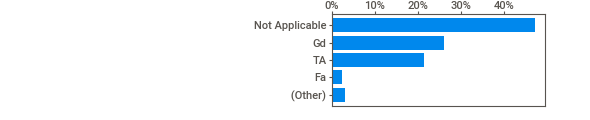
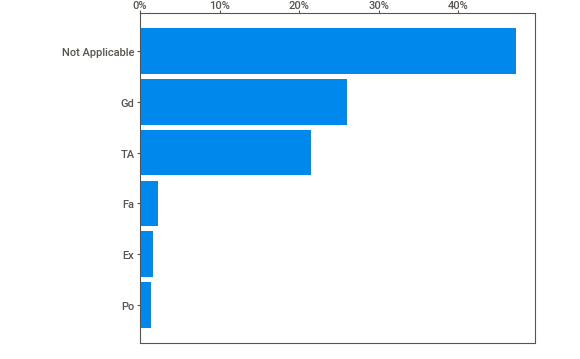
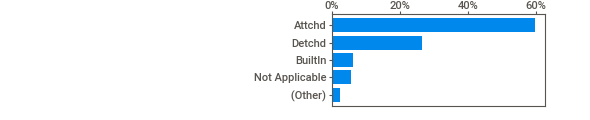
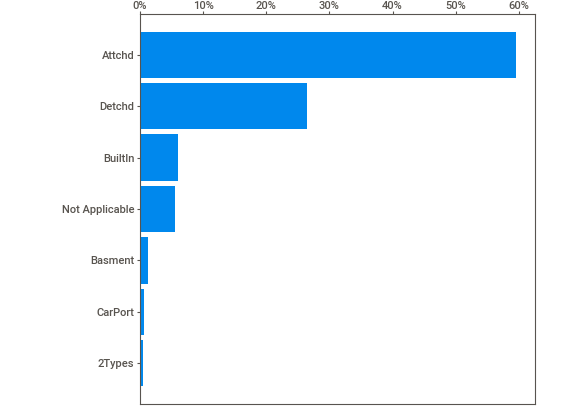
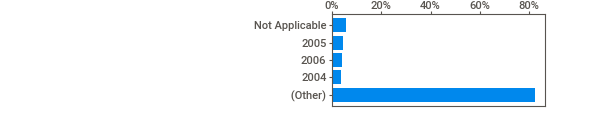
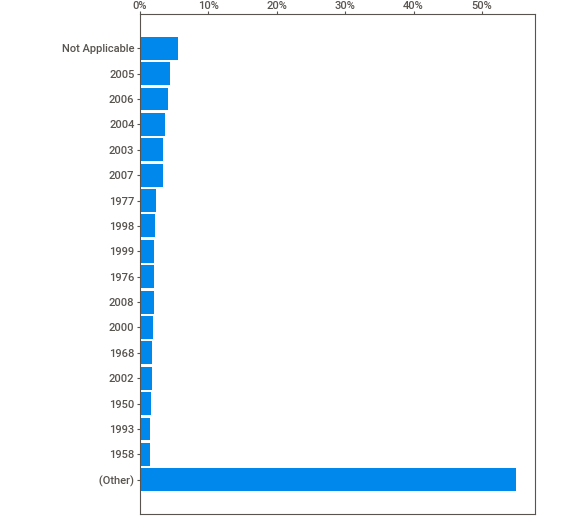
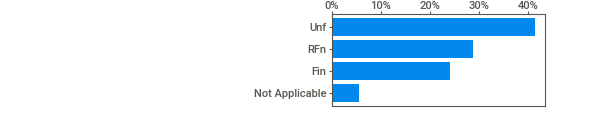
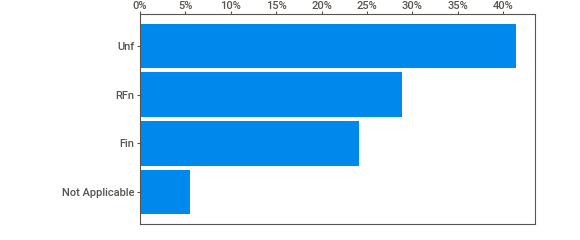
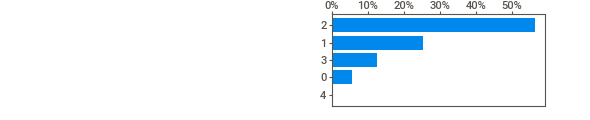
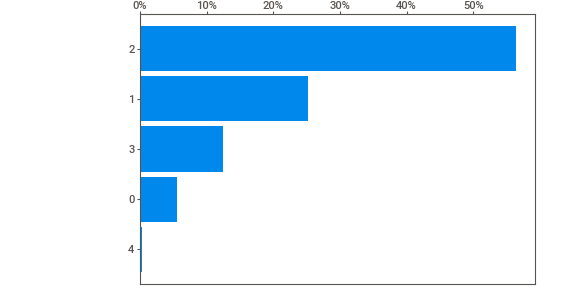
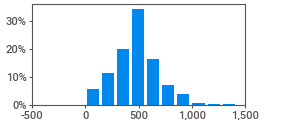
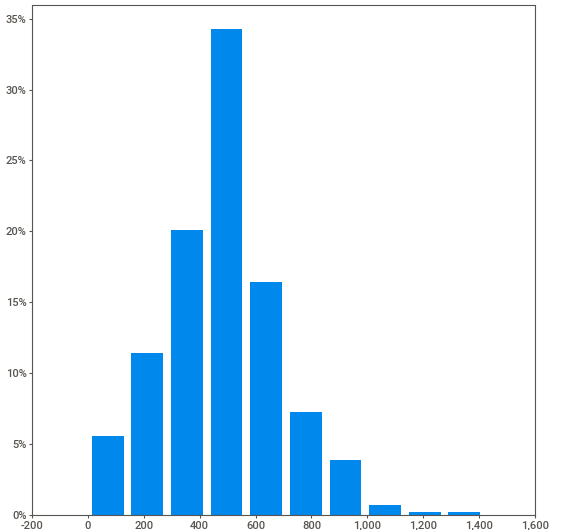
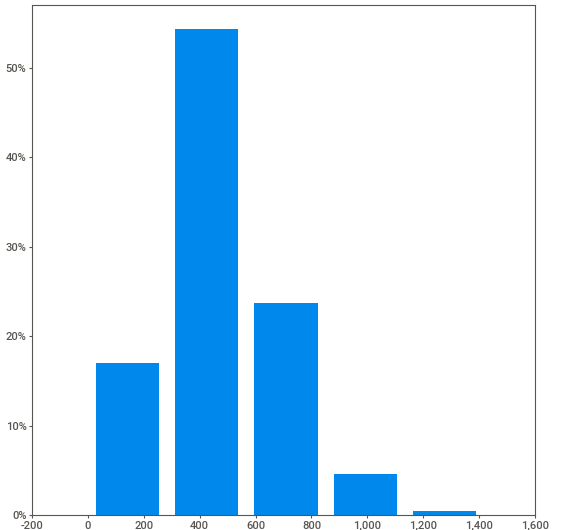
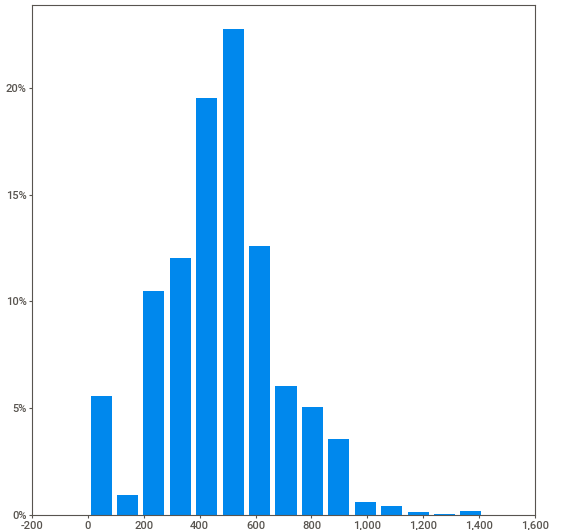
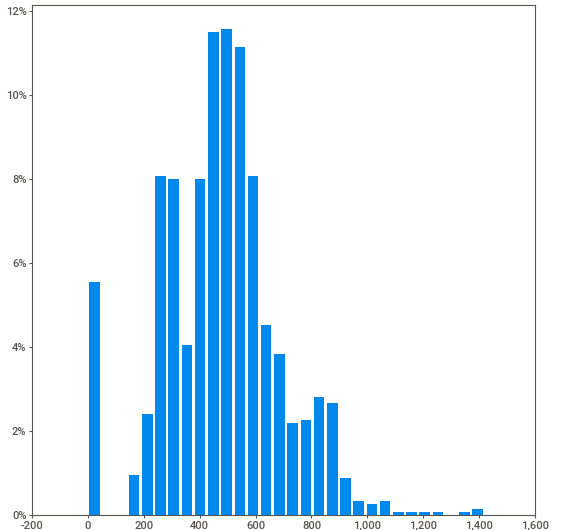
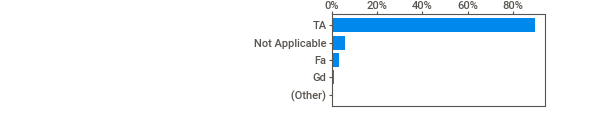
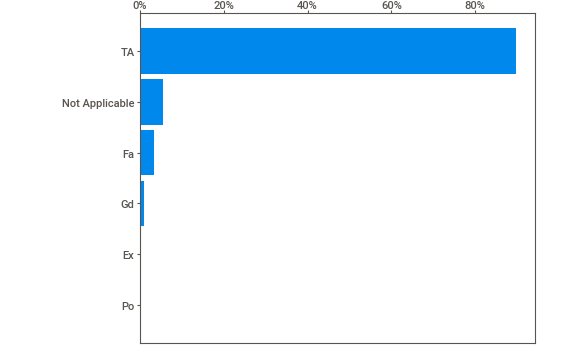
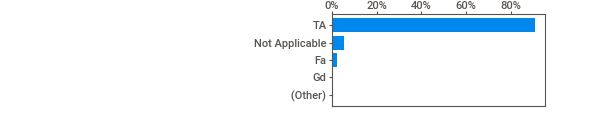
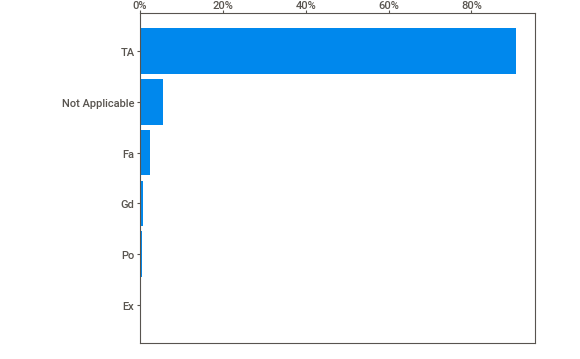
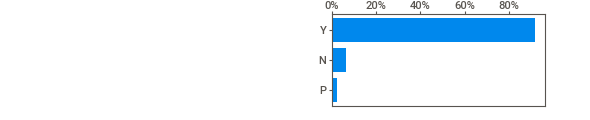
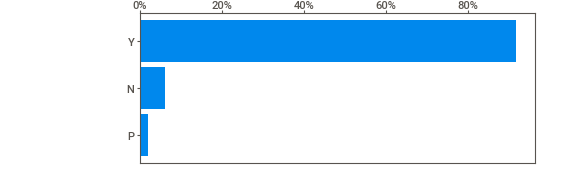
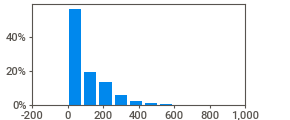
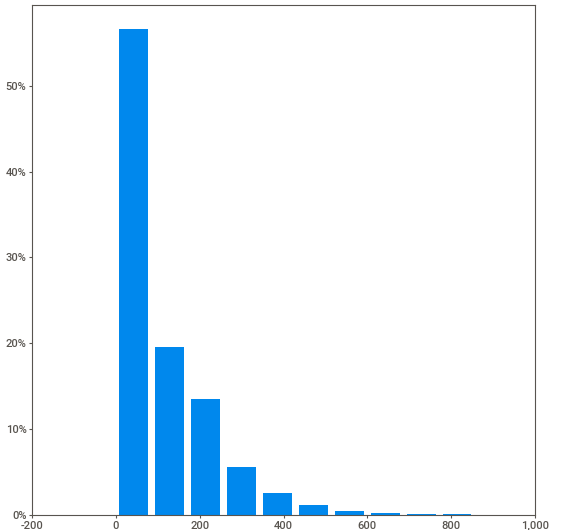
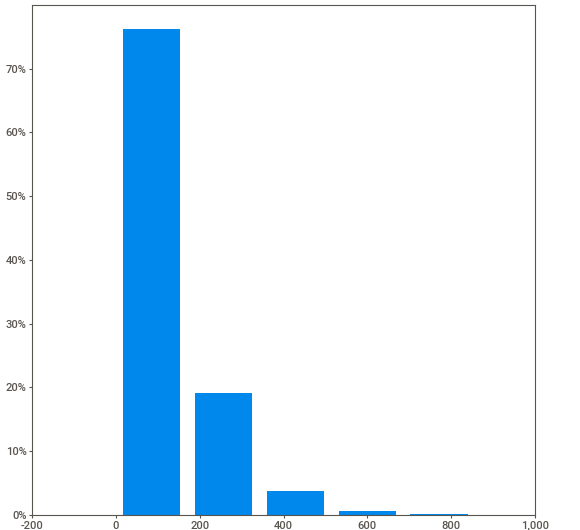
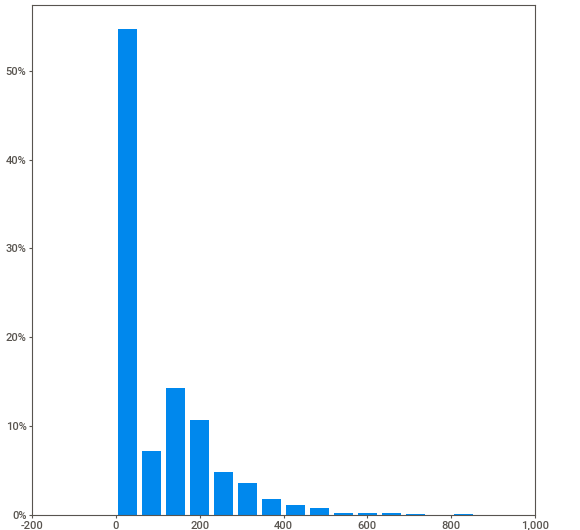
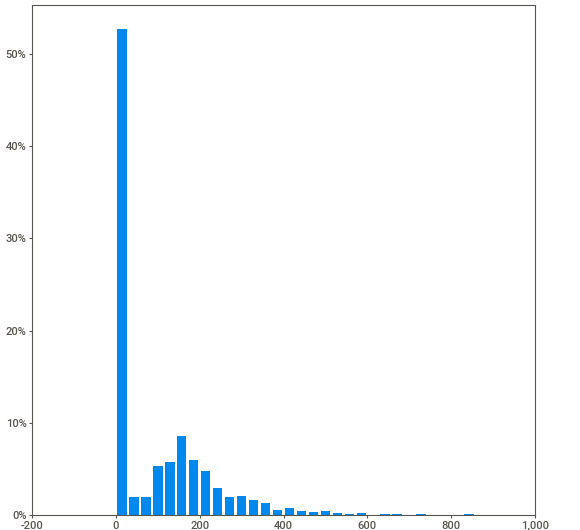
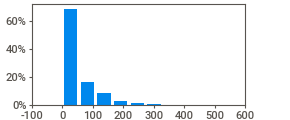
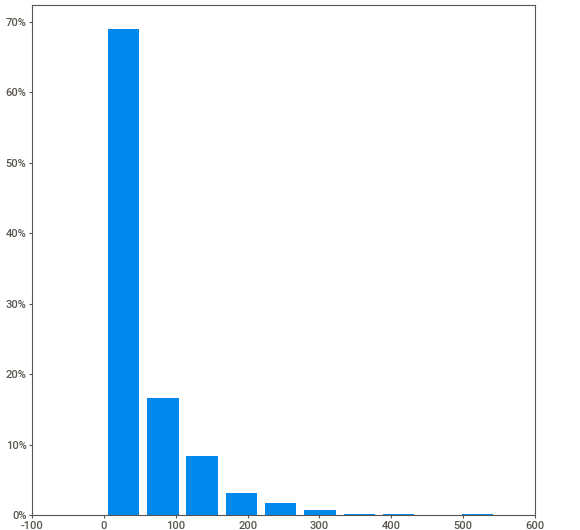
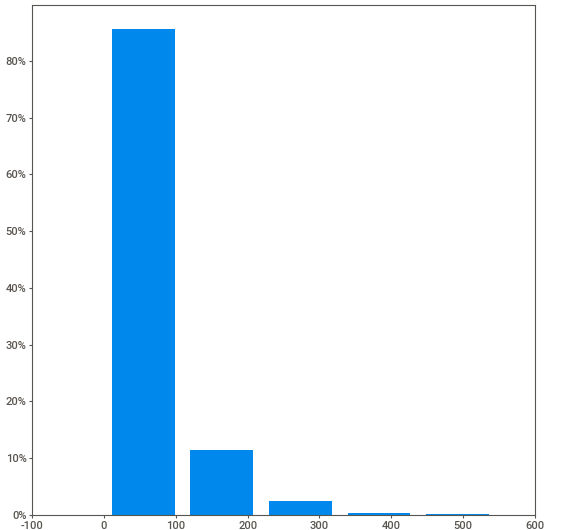
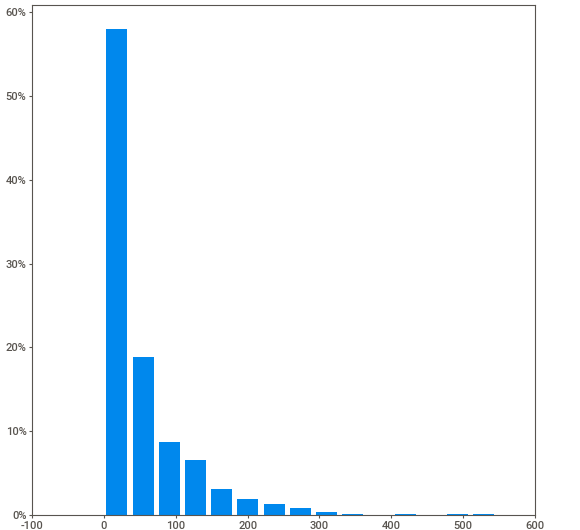
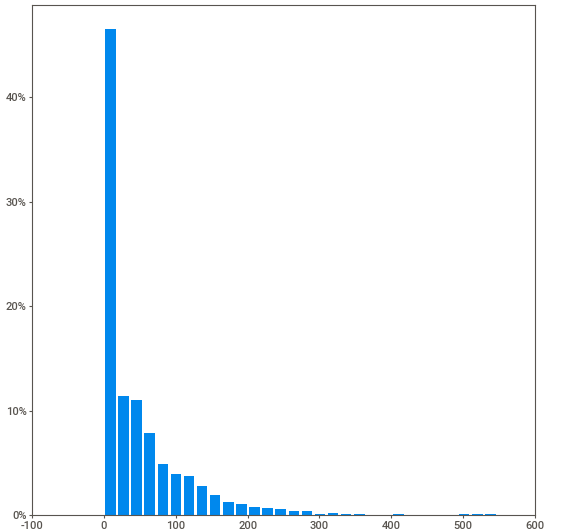
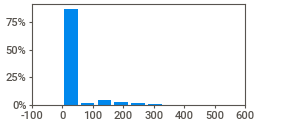
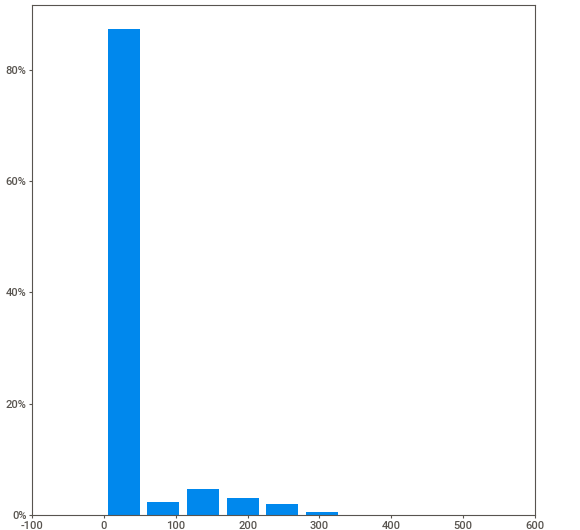
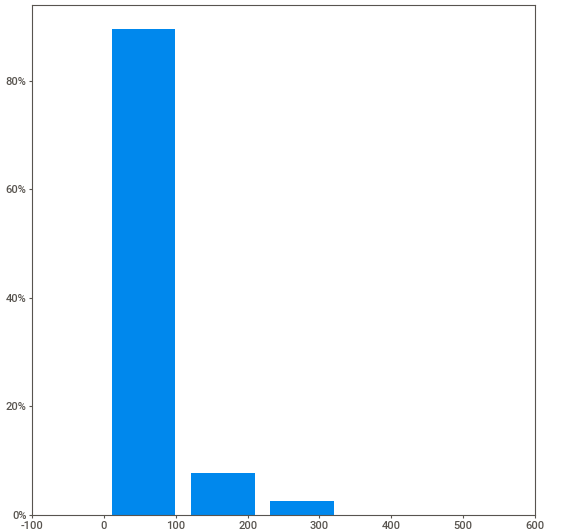
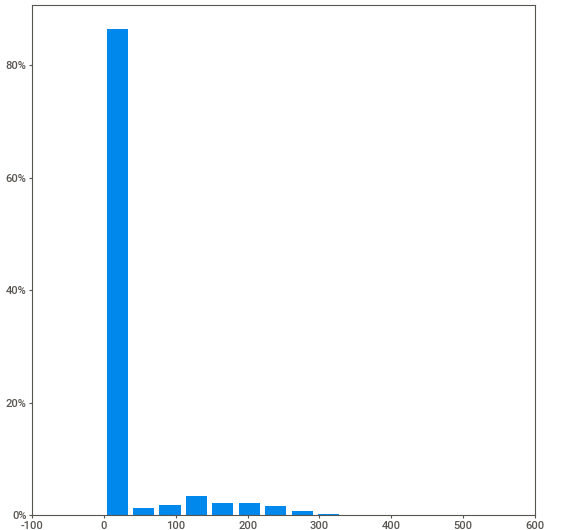
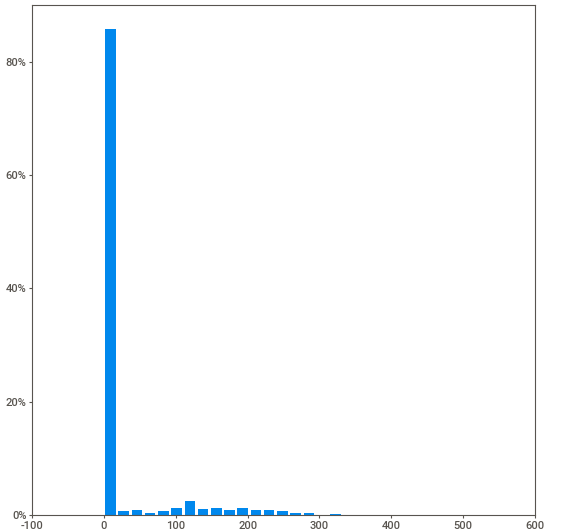
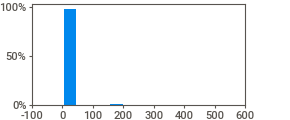
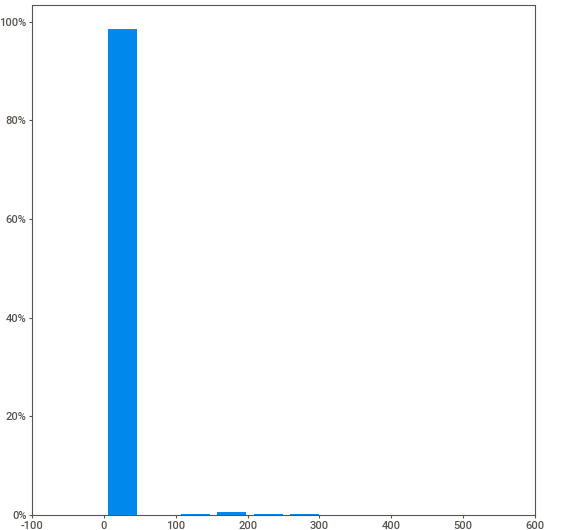
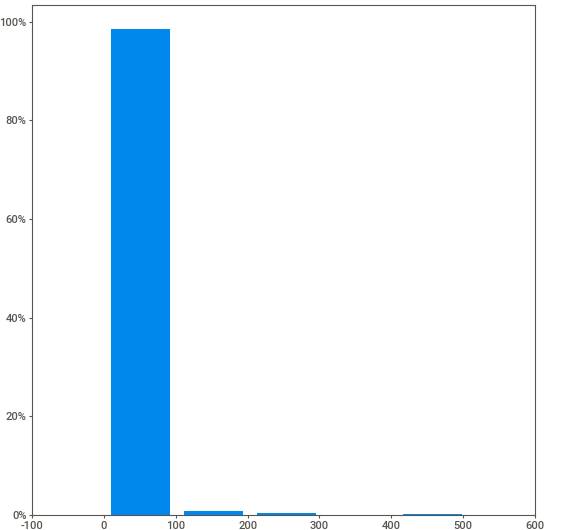
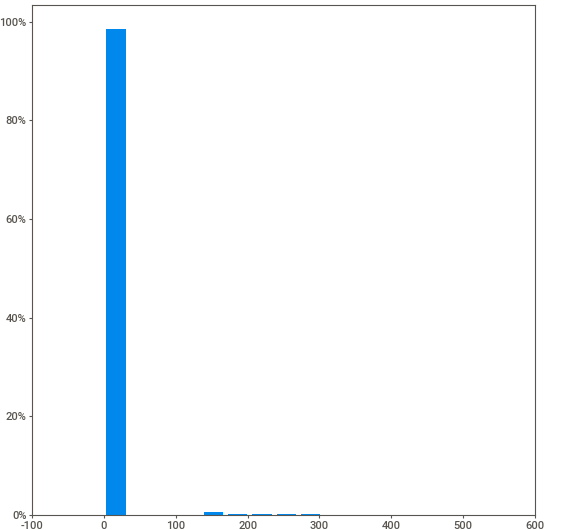
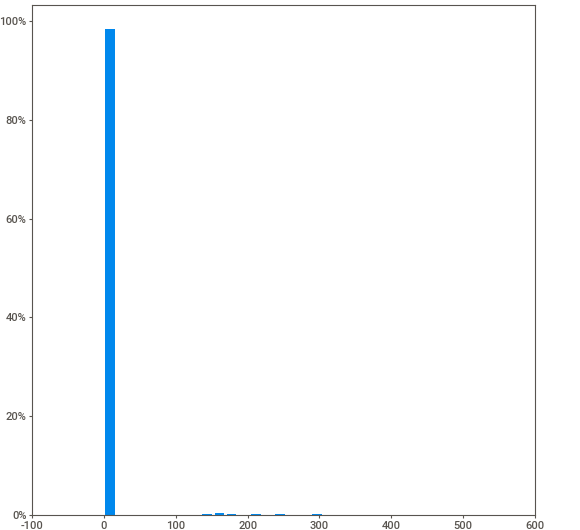
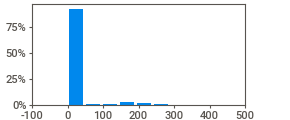
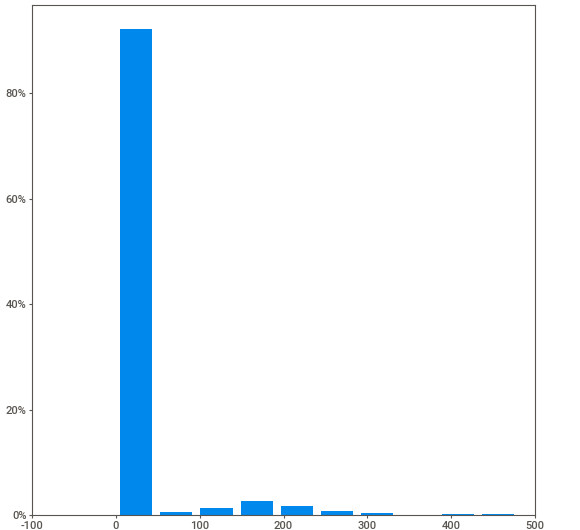
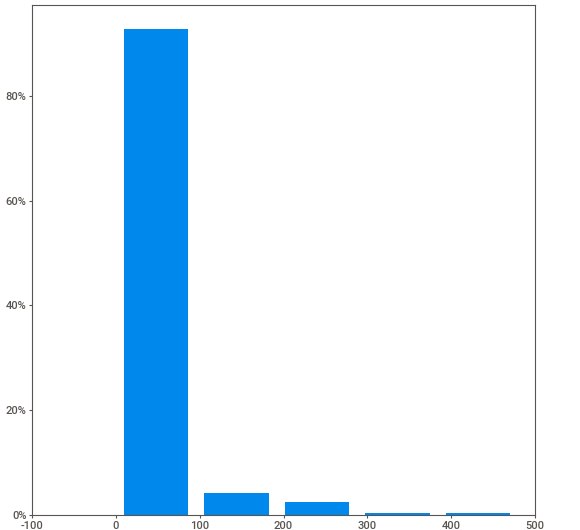
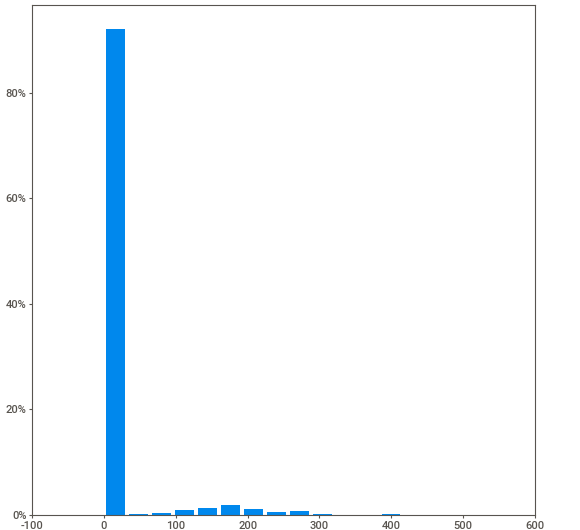
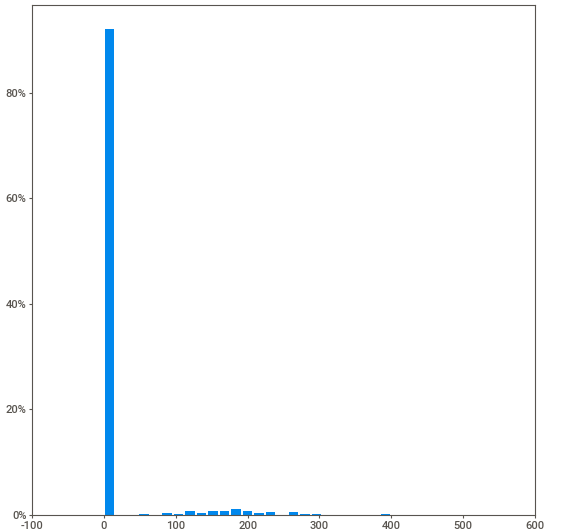
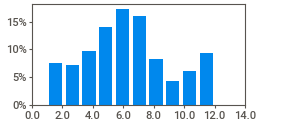
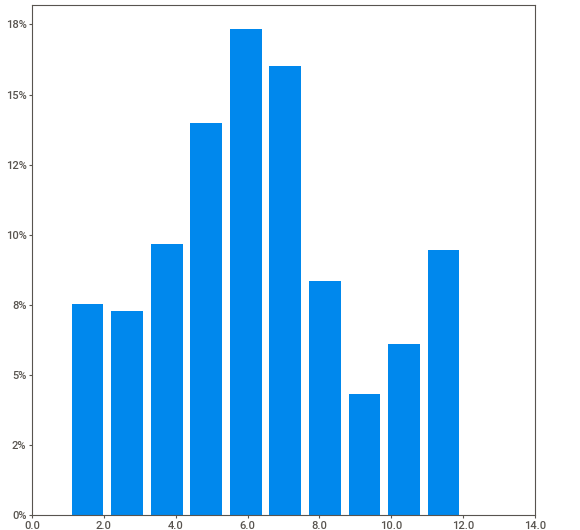
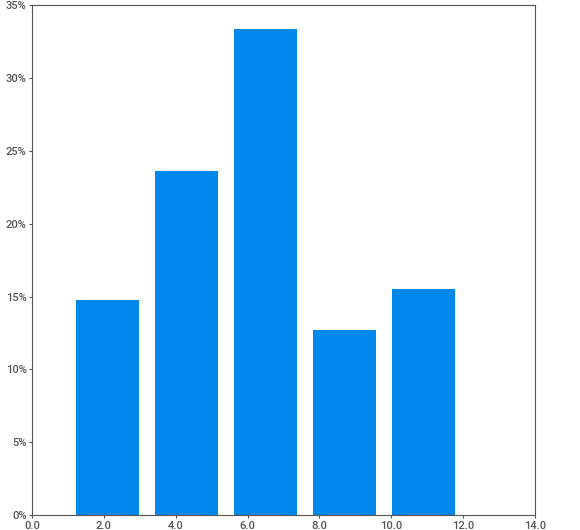
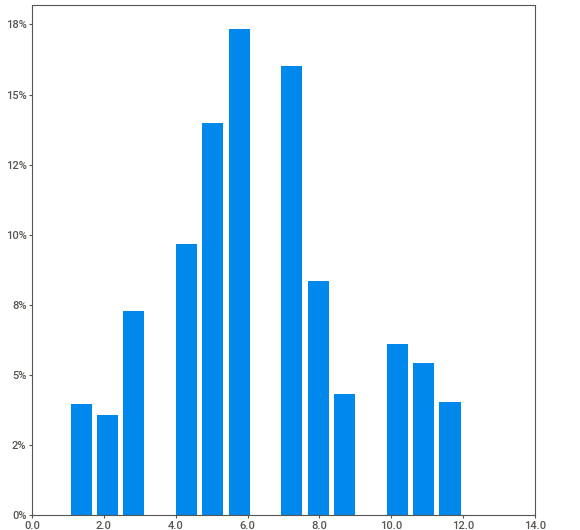
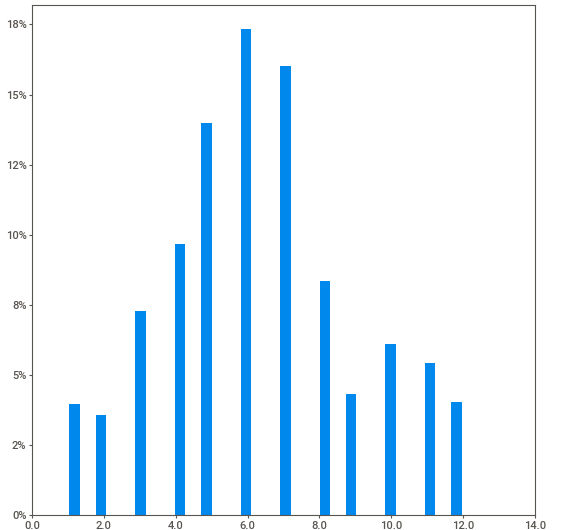
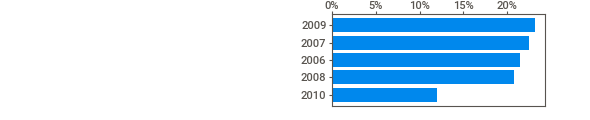
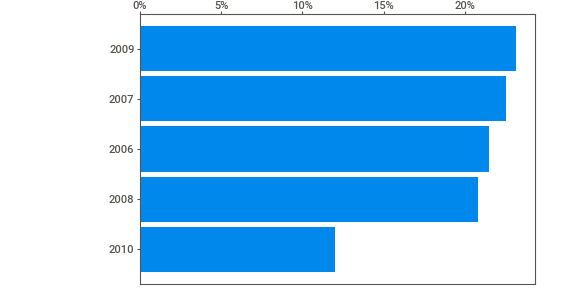
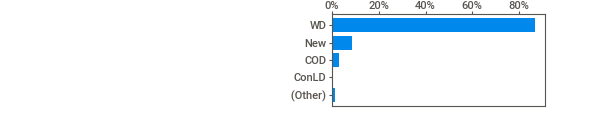
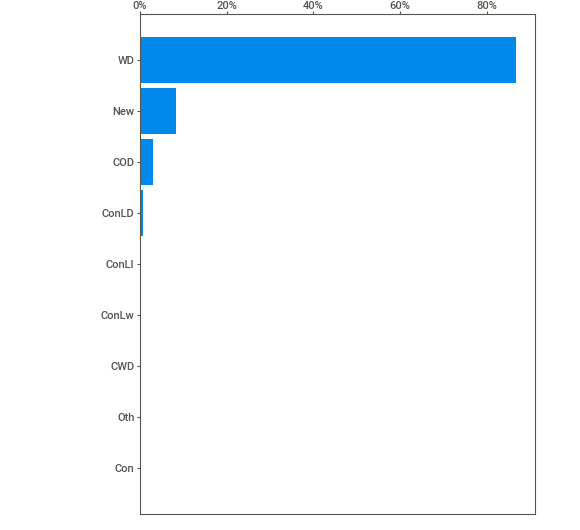
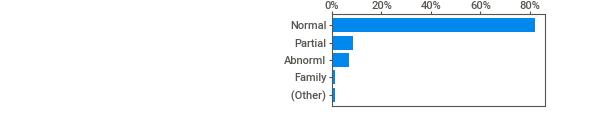
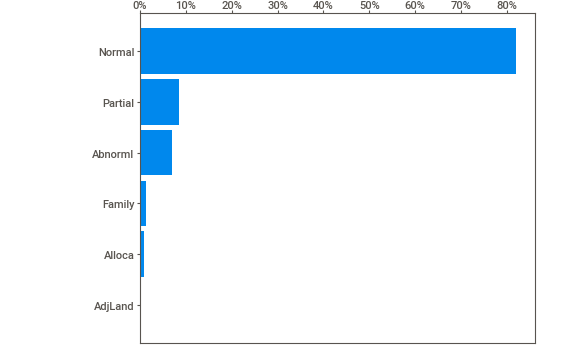
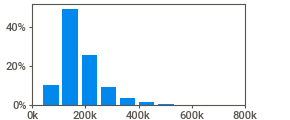
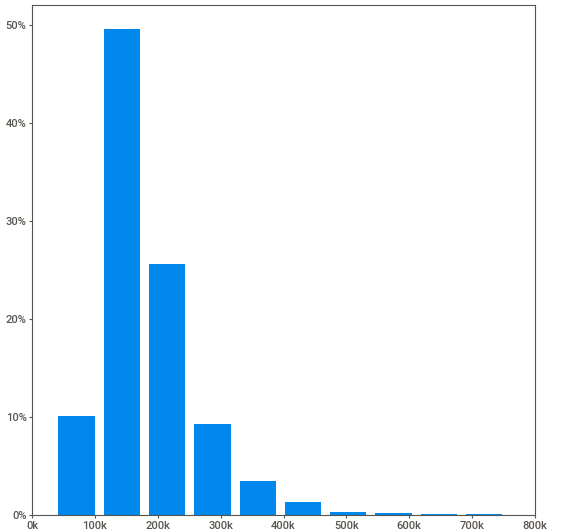
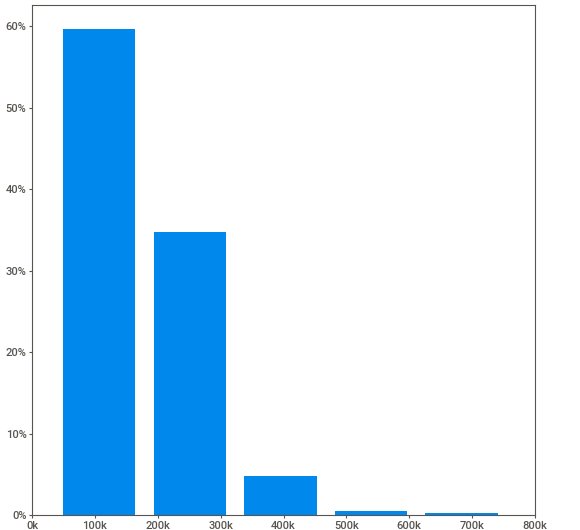
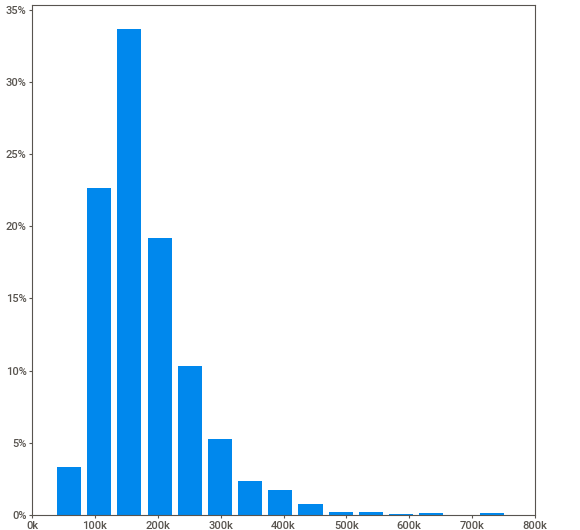
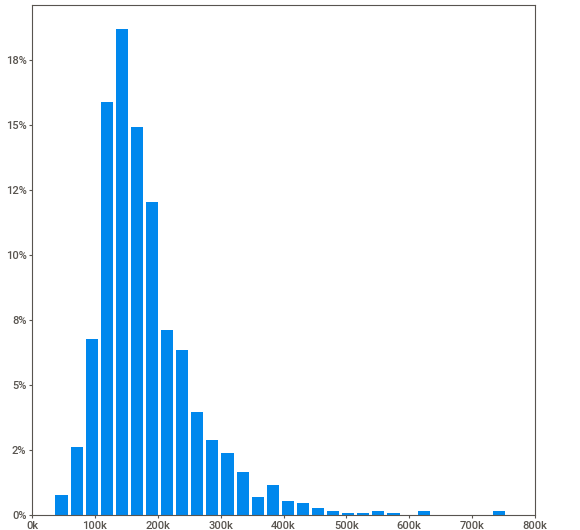
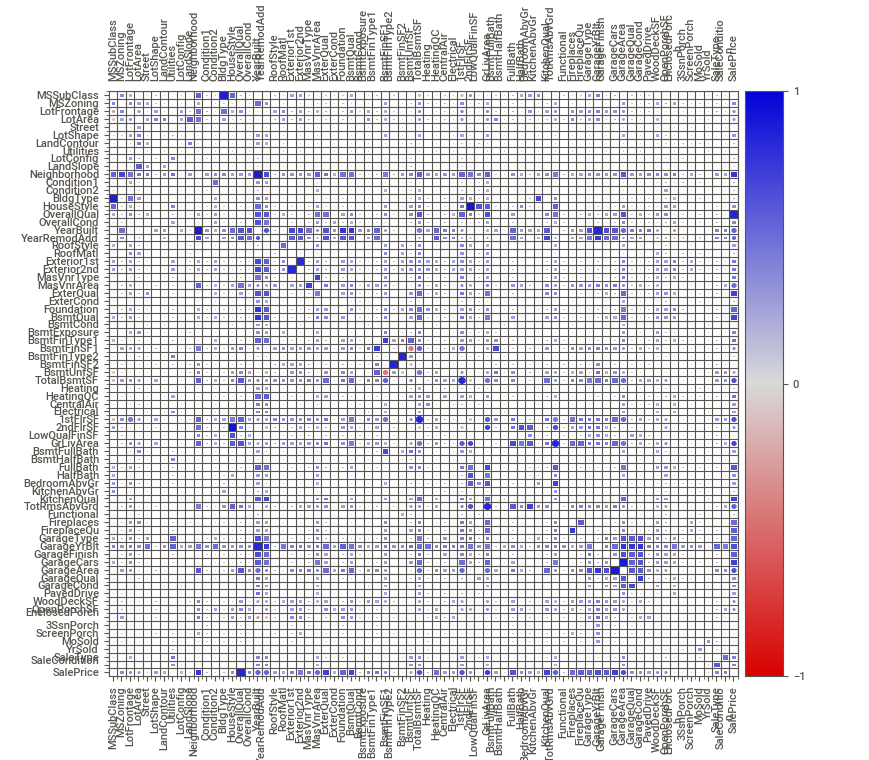
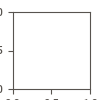

In [ ]:
my_report.show_notebook(layout='vertical')

#### Univariate Analysis Insights

- House Sale Price ranges from 35,000 to 755,000 and mean price 181,000.

- 36.7% of houses have building class as 20.
- 79% of houses have zoning classification RL.
- Average LotFrontage is 70 feet and most frequent is 69 feet.
- Average LotArea is 11,000 square feet.
- 99% of houses road access is Pave.
- 63% of houses shape of property is Reg.
- 90% of houses flatness of property is Lvl.
- 99% of houses have AllPub utilities.
- 72% of houses have lot configuration Inside.
- 95% of houses slope of property is Gtl.
- 15% of houses neighborhood is NAmes.
- 86% of houses proximity to main road/railroad is Norm.
- 99% of houses proximity to a secon main road/railroad if present is Norm.
- 84% of houses dwelling type is 1Fam.
- 50% of houses dwelling style is 1Story.
- 27% of houses overall quality rating is 5.
- 56% of houses overall condition rating is 5.
- Year built of houses has a correlation of 0.52 to house sale price.
- Remodel year of houses has a correlation of 0.51 to house sale price.
- 78% of houses have a roof style Gable.
- 98% of houses have a roof material CompShg.
- 35% of houses have an exterior covering VinylSd.
- 35% of houses have a second exterior covering VinylSd.
- 60% of houses no mason veneer type and 0 square feet mason veneer area.
- 62% of houses have exterior material quality TA.
- 88% of houses have exterior material present condition TA.
- 44% of houses have foundation type PConc.
- 47% of houses have basement quality rating TA.
- 92% of houses have basement condition rating TA.
- 68% of houses have no basement exposure.
- 32% of houses have unfinished type 1 basement area.
- 32% of houses do not have a type 1 basement area.
- 89% of houses basement type 2 area are unfinished.
- 88.6% of houses do not have a type 2 basement area.
- 8.1% of houses do not have an unfinished basement area.
- Total basement area ranges from 0 to 6110 square feet, with average of 1057 square feet. 2.5% of houses do not have a basement area.
- 98% of houses have heating type GasA.
- 51% of houses have heating quality and condition Ex.
- 93% of houses have central air conditioning.
- 91% of houses have electrical system SBrkr.
- First floor area ranges from 334 to 4692 square feet, with average of 1163 square feet.
- 56.8% of houses do not have a second floor.
- 98.2% of houses do not have a finished low quality area.
- Above grade or ground living area ranges from 334 to 5642 square feet, with average area 1515 square feet.
- 59% of houses do not have basement full bathrooms.
- 94% of houses do not have basement half bathrooms.
- 53% of houses have 2 full bathrooms above grade.
- 63% of houses do not have half bathrooms above grade.
- 55% of houses have 3 bedrooms above grade.
- 95% of houses have 1 kitchen.
- 50% of houses have kicthen quality TA.
- Total rooms in a house above grade excluding bathrooms ranges from 2 to 14. Most frequent value is 6 rooms for 27.5% of houses. There is a correlation of 0.53 between total number of rooms and house sale price.
- 93% of houses have functionality rating Typ.
- 47% of houses have no fireplaces and 45% have 1 fireplace.
- 47% of houses have no fireplace quality rating as they do not have a fireplace. 26% of houses have rating Gd and another 21% have rating TA.
- 60% of houses have garage location Attchd and 27% have location Detchd.
- 41% of houses have a garage finish Unf and 29% of houses have finish RFn.
- 56% of houses have a garage car capacity of 2 and 25% houses have a capacity of 1.
- 5.5% of houses do not have a garage.
- 90% of houses have garage quality rating TA.
- 91% of houses have garage condition rating TA.
- 92% of houses have a paved driveway.
- 52.1% of houses do not have a wood deck.
- 44.9% of houses do not have an open porch.
- 85.8% of houses do not have an enclosed porch.
- 98.4% of houses do not have a three season porch.
- 92.1% of houses do not have a screen porch.
- 17.3% of houses were sold in June, 16% in July and 14% in May.
- All houses were sold between the years 2006 to 2010.
- 87% of houses have a sale type WD.
- 82% of houses have a sale condition Normal.

### Bivariate Analysis

In [7]:
bivar_df = data.copy()

In [8]:
cat_cols = bivar_df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for c in cat_cols:
    bivar_df[c] = label_encoder.fit_transform(bivar_df[c])

bivar_df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           2           2   
1          0          2          0            24           1           2   
2          0          4          0             5           2           2   
3          0          0          0             6           2           2   
4          0          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5            7            5       2003          2003   
1         0           2            6            8       1976          1976   
2         0           5            7            5       2001          2002   
3         0           5            7            5       1915          1970   
4         0           5            8            5       2000          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1           12           13           1       196.0   
1          1         1            8            8           2         0.0   
2          1         1           12           13           1       162.0   
3          1         1           13           15           2         0.0   
4          1         1           12           13           1       350.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          4           2         2         3             3   
1          3          4           1         2         3             1   
2          2          4           2         2         3             2   
3          3          4           0         3         1             3   
4          2          4           2         2         3             0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             2         706             5           0        150          856   
1             0         978             5           0        284         1262   
2             2         486             5           0        434          920   
3             0         216             5           0        540          756   
4             2         655             5           0        490         1145   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          0           1           4       856       854   
1        1          0           1           4      1262         0   
2        1          0           1           4       920       866   
3        1          2           1           4       961       756   
4        1          0           1           4      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            2             8           6   
1             3             1            3             6           6   
2             3             1            2             6           6   
3             3             1            

<Axes: >

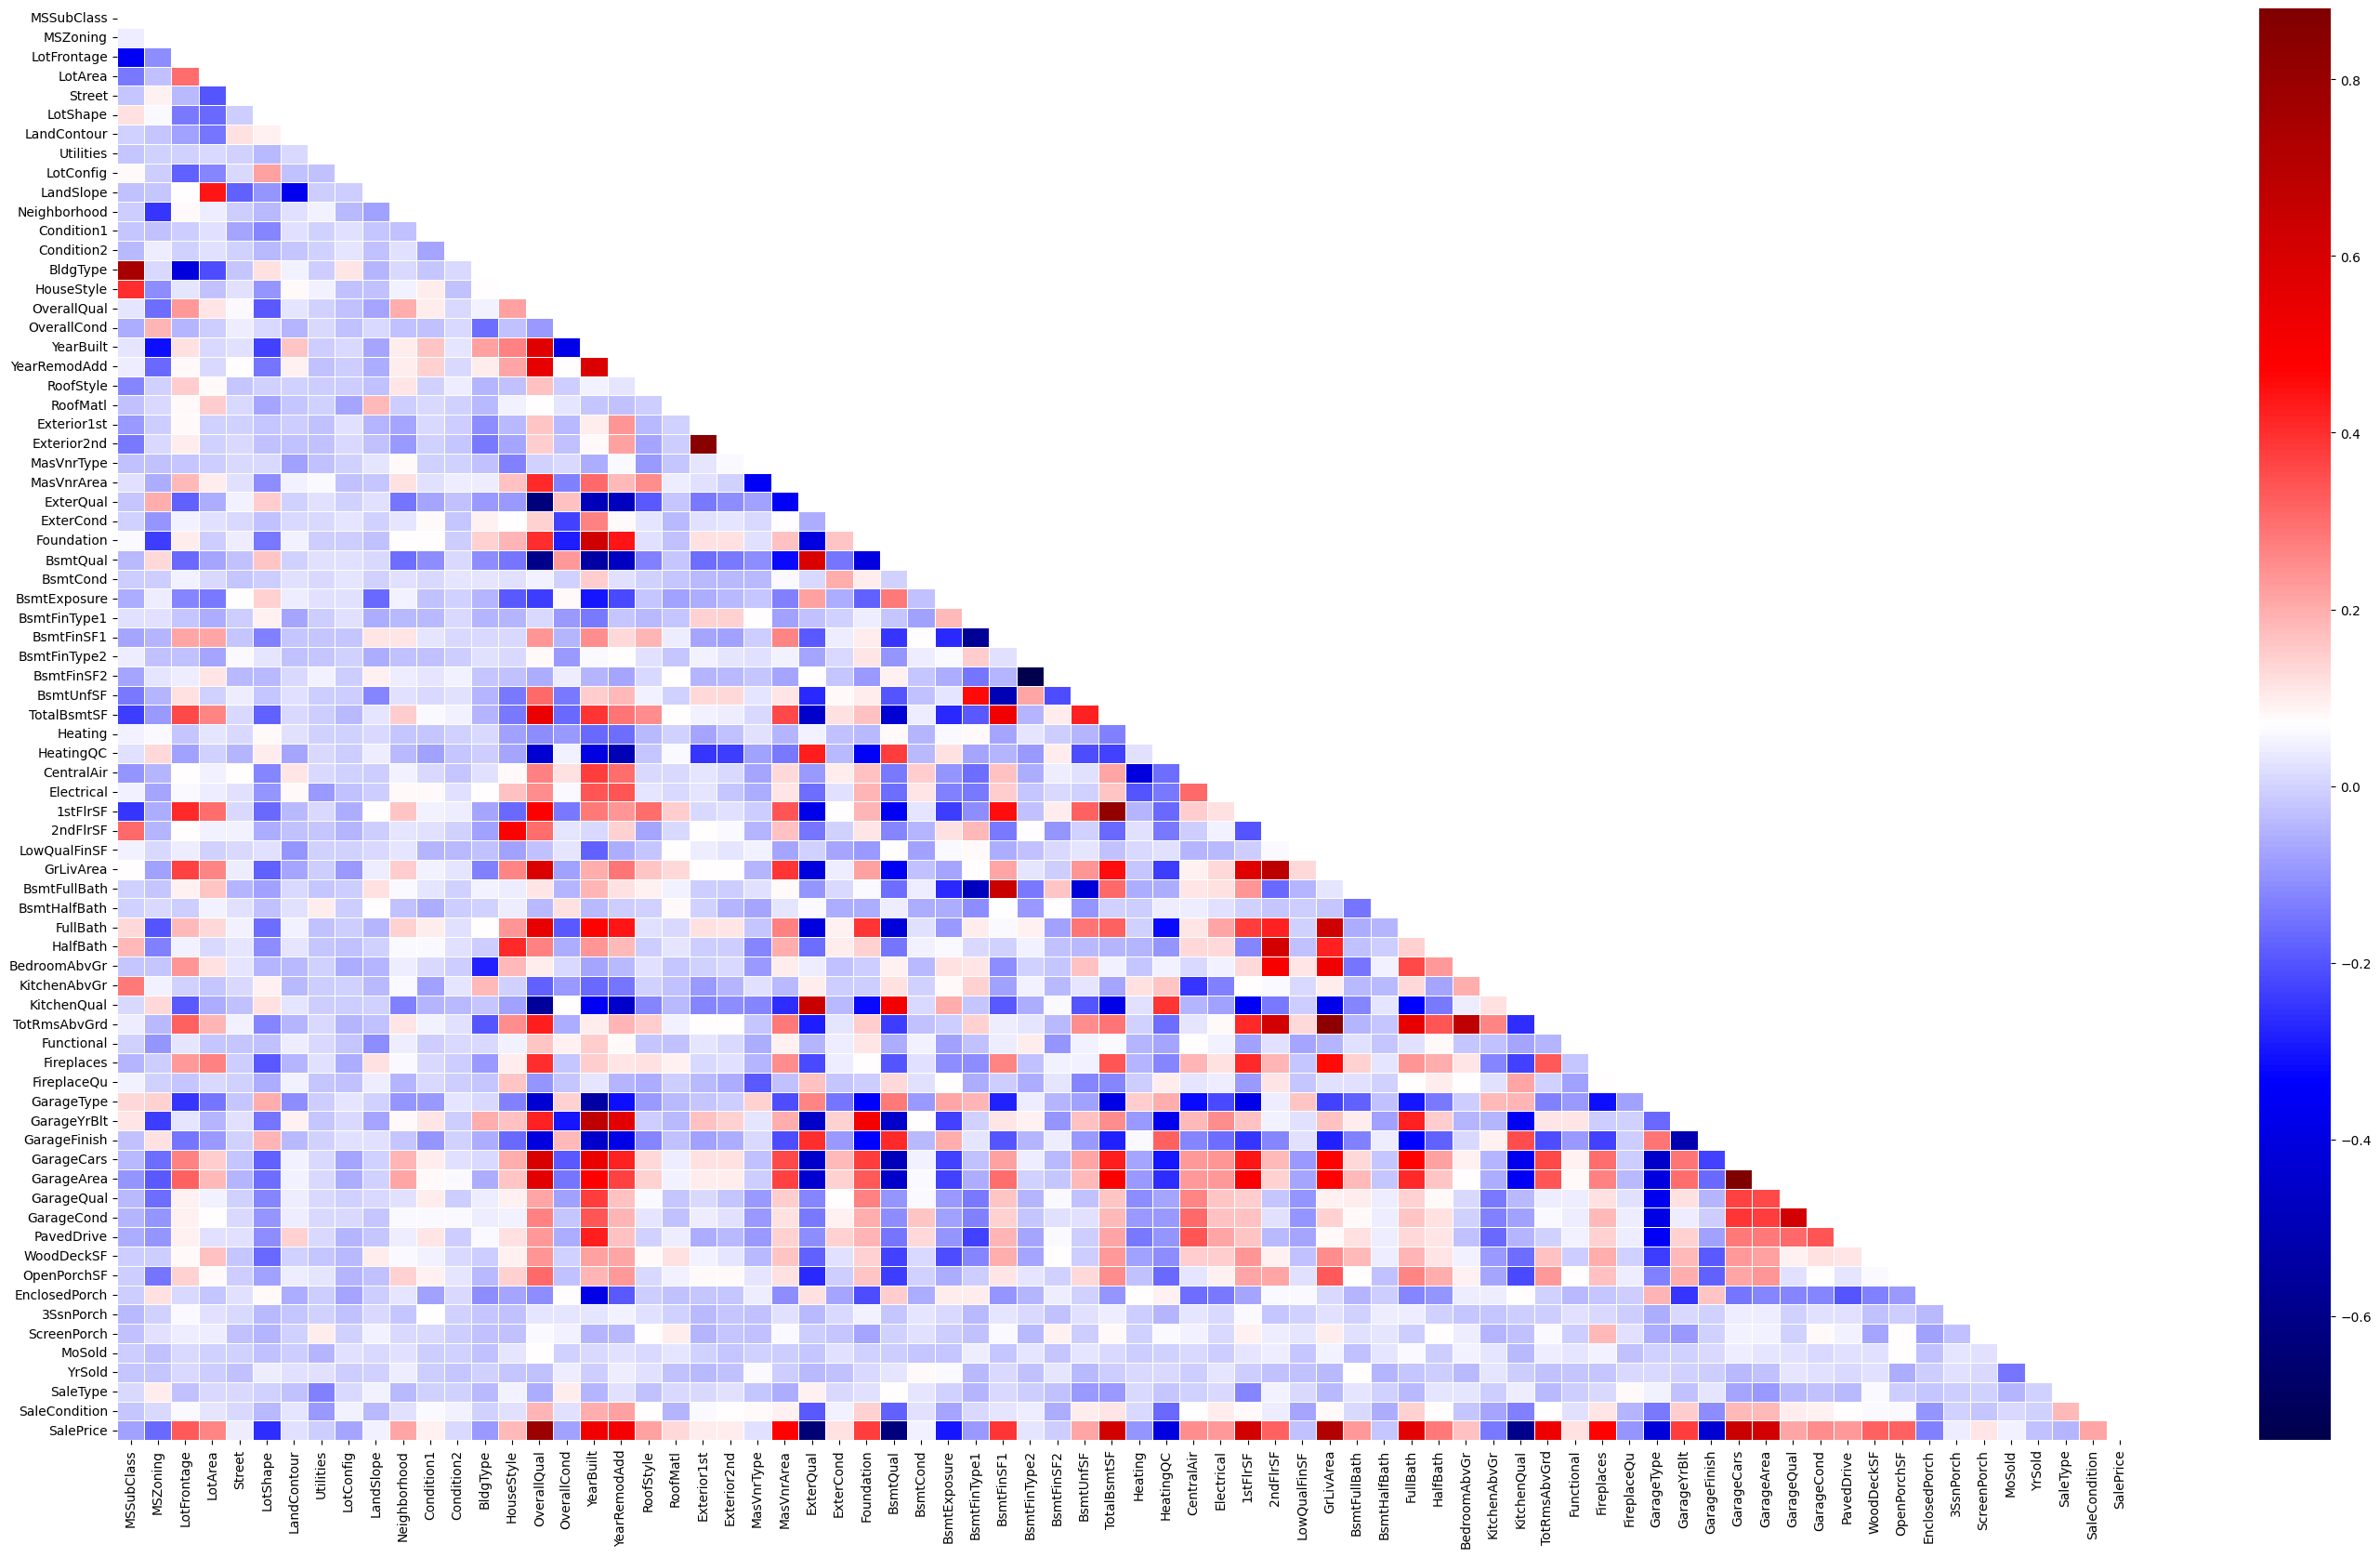

In [ ]:
corr_matrix = bivar_df.corr().round(2)
heat_mask = np.zeros_like(corr_matrix, dtype=bool)
heat_mask[np.triu_indices_from(heat_mask)] = True

plt.figure(figsize = (35, 20))
sns.heatmap(bivar_df.corr().round(2), cmap='seismic', linewidths=0.5, mask=heat_mask)

In [9]:
corr_matrix = bivar_df.corr()
corr_matrix = corr_matrix.unstack().sort_values(ascending=False)
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1','feature2','pairwise_correlation']
positive_corr_matrix = corr_matrix.loc[(corr_matrix['pairwise_correlation'] < 1) & (corr_matrix['pairwise_correlation'] > 0.5)]
negative_corr_matrix = corr_matrix.loc[(corr_matrix['pairwise_correlation'] > -1) & (corr_matrix['pairwise_correlation'] < -0.5)]

In [10]:
high_pos_corr = positive_corr_matrix[positive_corr_matrix['feature1'] == 'SalePrice'].sort_values(['pairwise_correlation'], ascending=[False])

high_pos_corr

feature1      feature2  pairwise_correlation
83   SalePrice   OverallQual              0.790982
87   SalePrice     GrLivArea              0.708624
99   SalePrice    GarageCars              0.640409
105  SalePrice    GarageArea              0.623431
111  SalePrice   TotalBsmtSF              0.613581
114  SalePrice      1stFlrSF              0.605852
133  SalePrice      FullBath              0.560664
145  SalePrice  TotRmsAbvGrd              0.533723
146  SalePrice     YearBuilt              0.522897
156  SalePrice  YearRemodAdd              0.507101

In [11]:
hig_neg_corr = negative_corr_matrix[negative_corr_matrix['feature1'] == 'SalePrice'].sort_values(['pairwise_correlation'], ascending=[True])

hig_neg_corr

feature1     feature2  pairwise_correlation
5472  SalePrice    ExterQual             -0.636884
5469  SalePrice     BsmtQual             -0.618025
5465  SalePrice  KitchenQual             -0.589189

#### House SalePrice and Strongly Correlated Features

In [12]:
sale_price_corr_cols = list(high_pos_corr['feature2'].unique()) + list(hig_neg_corr['feature2'].unique())

In [13]:
bivar_df = bivar_df[bivar_df.columns.intersection(sale_price_corr_cols + ['SalePrice'])]

bivar_df.head()

OverallQual  YearBuilt  YearRemodAdd  ExterQual  BsmtQual  TotalBsmtSF  \
0            7       2003          2003          2         2          856   
1            6       1976          1976          3         2         1262   
2            7       2001          2002          2         2          920   
3            7       1915          1970          3         3          756   
4            8       2000          2000          2         2         1145   

   1stFlrSF  GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  GarageCars  \
0       856       1710         2            2             8           2   
1      1262       1262         2            3             6           2   
2       920       1786         2            2             6           2   
3       961       1717         1            2             7           3   
4      1145       2198         2            2             9           3   

   GarageArea  SalePrice  
0         548     208500  
1         460     181500  
2         608     223500  
3         642     140000  
4         836     250000

In [14]:
bivar_df.shape

(1460, 14)

<Axes: >

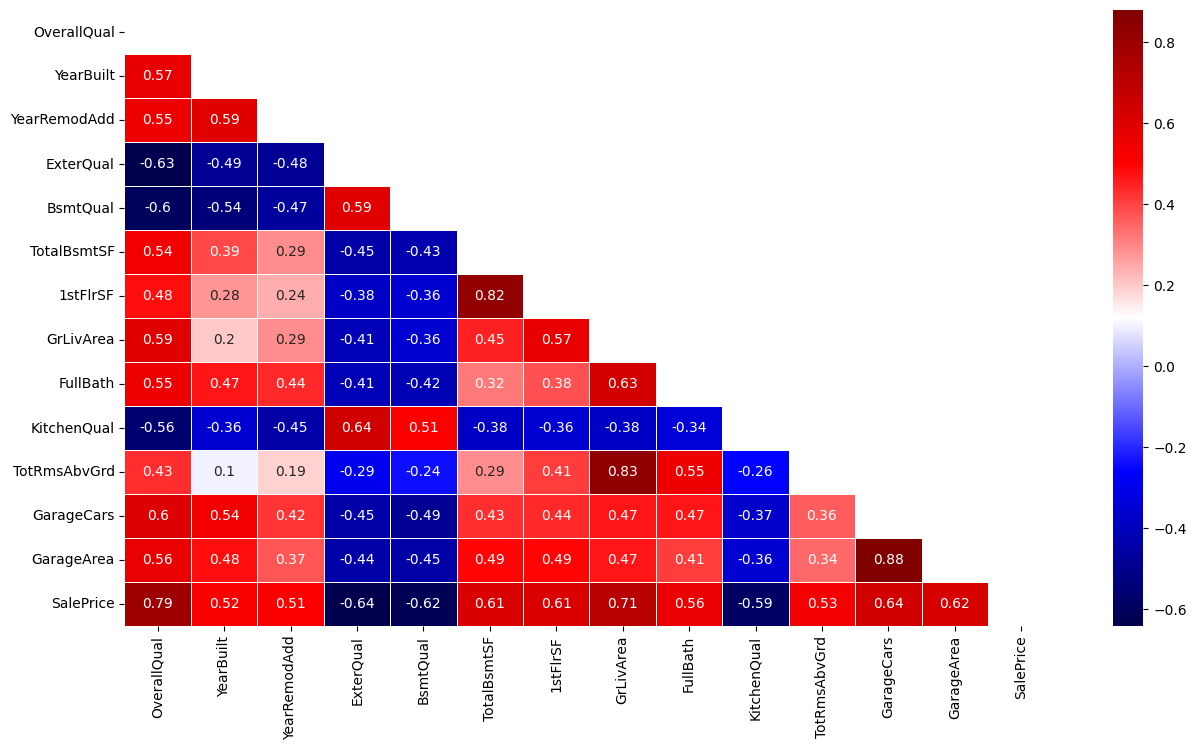

In [ ]:
corr_matrix = bivar_df.corr().round(2)
heat_mask = np.zeros_like(corr_matrix, dtype=bool)
heat_mask[np.triu_indices_from(heat_mask)] = True

plt.figure(figsize = (15, 8))
sns.heatmap(bivar_df.corr().round(2), cmap='seismic', annot=True, linewidths=0.5, mask=heat_mask)

### Analysis of Relationship of House Features with Sale Price

#### House Sale Price Distribution

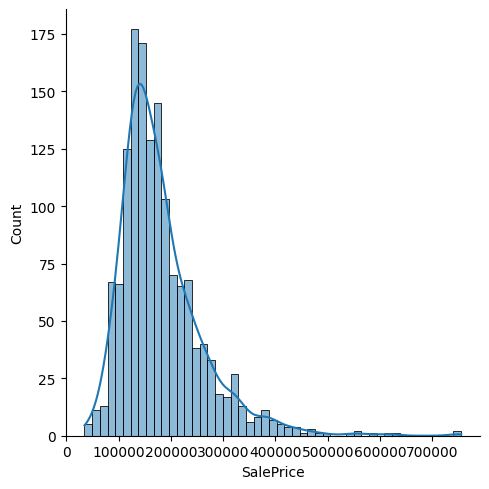

In [ ]:
sns.displot(bivar_df, x='SalePrice', kde=True)

- The distribution of the house sale price is positively skewed with high prices over 700,000.
- Log-transformation can be used to make the data more symmetrical and normalized.

#### Ground Living Area

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

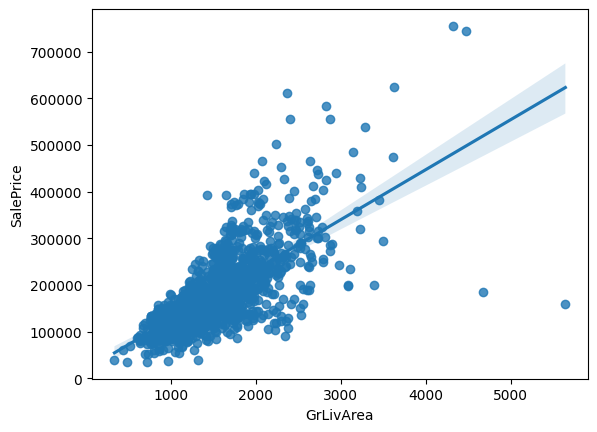

In [ ]:
sns.regplot(bivar_df, x='GrLivArea', y='SalePrice')

- House sale price and ground living area have a strong positive correlation.
- Ground living area is a house feature customers should consider when buying a house.

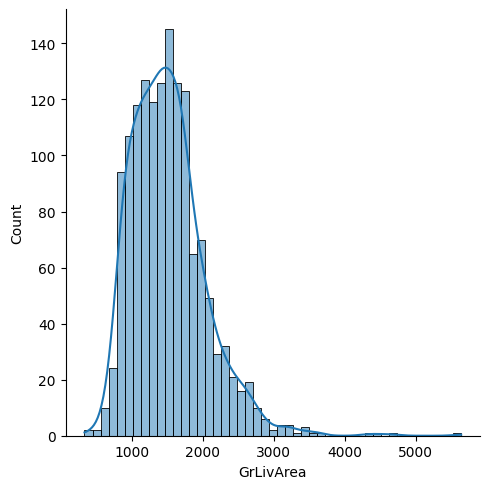

In [ ]:
sns.displot(bivar_df, x='GrLivArea', kde=True)

- The distribution of the ground living area is positively skewed with high prices over 3500.
- Log-transformation can be used to make the data more symmetrical and normalized.

#### Garage Area

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

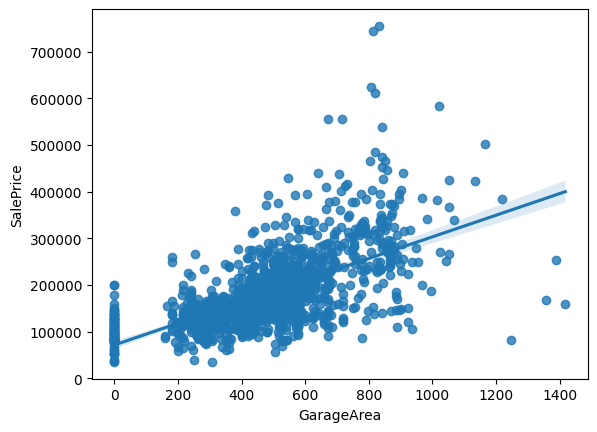

In [ ]:
sns.regplot(bivar_df, x='GarageArea', y='SalePrice')

- House sale price and garage area have a moderate positive correlation.
- Garage area is a house feature customers should consider when buying a house.

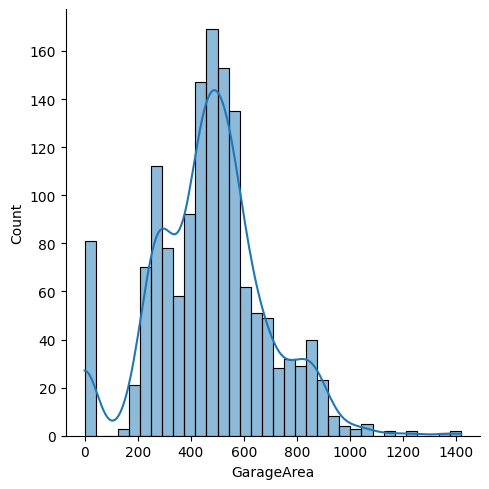

In [ ]:
sns.displot(bivar_df, x='GarageArea', kde=True)

- The distribution of the garage area is slighty positively skewed.
- Log-transformation can be used to make the data more symmetrical and normalized.

#### Basement Area

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

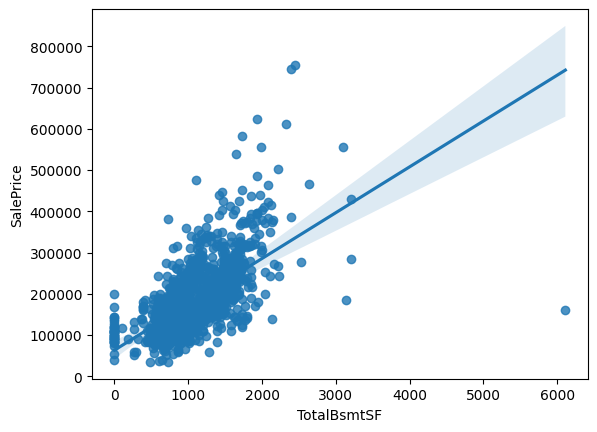

In [ ]:
sns.regplot(bivar_df, x='TotalBsmtSF', y='SalePrice')

- House sale price and Basement area have a strong positive correlation.
- Basement area is a house feature customers should consider when buying a house.

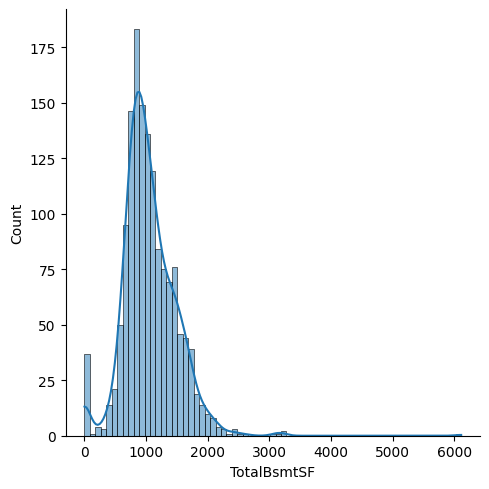

In [ ]:
sns.displot(bivar_df, x='TotalBsmtSF', kde=True)

- The distribution of the basement area is positively skewed.
- Log-transformation can be used to make the data more symmetrical and normalized.

#### First Floor Area

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

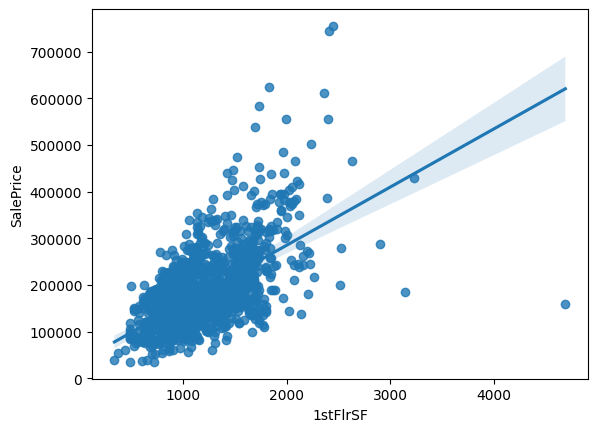

In [ ]:
sns.regplot(bivar_df, x='1stFlrSF', y='SalePrice')

- House sale price and First floor area have a strong positive correlation.
- First floor area is a house feature customers should consider when buying a house.

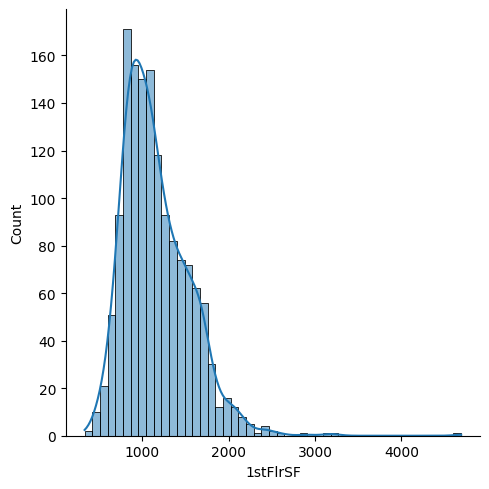

In [ ]:
sns.displot(bivar_df, x='1stFlrSF', kde=True)

- The distribution of the first floor area is positively skewed.
- Log-transformation can be used to make the data more symmetrical and normalized.

#### House Year Built

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

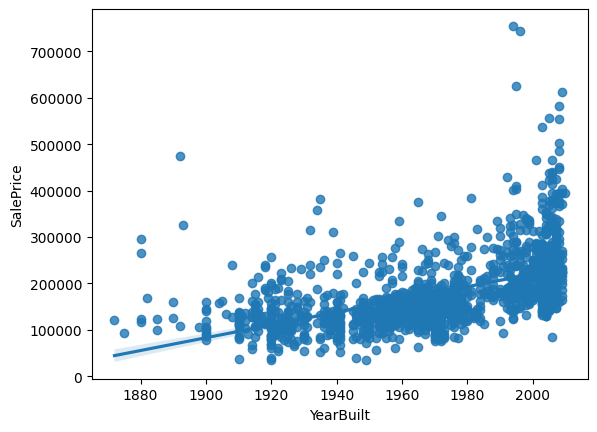

In [ ]:
sns.regplot(x=bivar_df['YearBuilt'].astype('int'), y=bivar_df['SalePrice'])

- House sale price and Year built have a moderate positive correlation.
- Year built is a house feature customers should consider when buying a house.:

#### Total Rooms Above Ground

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

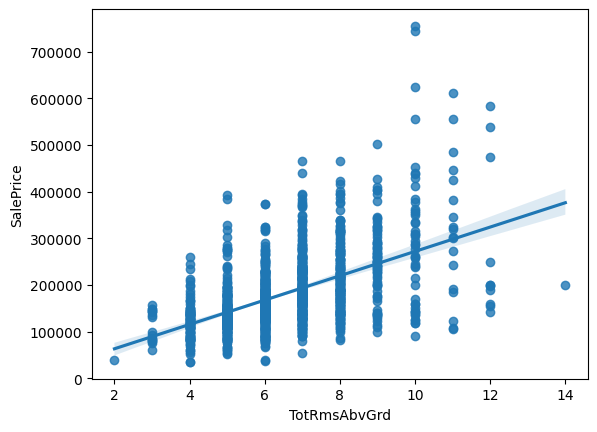

In [15]:
sns.regplot(bivar_df, x='TotRmsAbvGrd', y='SalePrice')

- House sale price and the total number of rooms above ground have a moderate positive correlation.
- Total number of rooms above ground is a house feature customers should consider when buying a house.

In [16]:
bivar_df.shape

(1460, 14)

In [ ]:
features = bivar_df.columns
features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

## Data Preparation

### Feature Selection

- The best features are chosen based on the analysis done above.

In [ ]:
new_data = bivar_df.copy()
new_data.head()

OverallQual  YearBuilt  YearRemodAdd  ExterQual  BsmtQual  TotalBsmtSF  \
0            7       2003          2003          2         2          856   
1            6       1976          1976          3         2         1262   
2            7       2001          2002          2         2          920   
3            7       1915          1970          3         3          756   
4            8       2000          2000          2         2         1145   

   1stFlrSF  GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  GarageCars  \
0       856       1710         2            2             8           2   
1      1262       1262         2            3             6           2   
2       920       1786         2            2             6           2   
3       961       1717         1            2             7           3   
4      1145       2198         2            2             9           3   

   GarageArea  SalePrice  
0         548     208500  
1         460     181500  
2         608     223500  
3         642     140000  
4         836     250000

In [ ]:
new_data.describe()

OverallQual    YearBuilt  YearRemodAdd    ExterQual     BsmtQual  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      6.099315  1971.267808   1984.865753     2.539726     2.280137   
std       1.382997    30.202904     20.645407     0.693995     0.864510   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     2.000000     2.000000   
50%       6.000000  1973.000000   1994.000000     3.000000     2.000000   
75%       7.000000  2000.000000   2004.000000     3.000000     3.000000   
max      10.000000  2010.000000   2010.000000     3.000000     3.000000   

       TotalBsmtSF     1stFlrSF    GrLivArea     FullBath  KitchenQual  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1057.429452  1162.626712  1515.463699     1.565068     2.339726   
std     438.705324   386.587738   525.480383     0.550916     0.830161   
min       0.000000   334.000000   334.000000     0.000000     0.000000   
25%     795.750000   882.000000  1129.500000     1.000000     2.000000   
50%     991.500000  1087.000000  1464.000000     2.000000     3.000000   
75%    1298.250000  1391.250000  1776.750000     2.000000     3.000000   
max    6110.000000  4692.000000  5642.000000     3.000000     3.000000   

       TotRmsAbvGrd   GarageCars   GarageArea      SalePrice  
count   1460.000000  1460.000000  1460.000000    1460.000000  
mean       6.517808     1.767123   472.980137  180921.195890  
std        1.625393     0.747315   213.804841   79442.502883  
min        2.000000     0.000000     0.000000   34900.000000  
25%        5.000000     1.000000   334.500000  129975.000000  
50%        6.000000     2.000000   480.000000  163000.000000  
75%        7.000000     2.000000   576.000000  214000.000000  
max       14.000000     4.000000  1418.000000  755000.000000

In [ ]:
new_data.shape

(1460, 14)

### Feature Scaling

- The features SalePrice, GrLivArea, GarageArea, TotalBsmtSF, and 1stFlrSF are log-transformed to deal with skewness in the data.

In [ ]:
new_data['SalePrice'] = np.log(new_data['SalePrice'])

new_data['GrLivArea'] = np.log(new_data['GrLivArea'])

new_data.loc[new_data['GarageArea'] != 0,'GarageArea'] = np.log(new_data['GarageArea'])

new_data.loc[new_data['TotalBsmtSF'] != 0,'TotalBsmtSF'] = np.log(new_data['TotalBsmtSF'])

new_data['1stFlrSF'] = np.log(new_data['1stFlrSF'])

In [ ]:
new_data.head()

OverallQual  YearBuilt  YearRemodAdd  ExterQual  BsmtQual  TotalBsmtSF  \
0            7       2003          2003          2         2     6.752270   
1            6       1976          1976          3         2     7.140453   
2            7       2001          2002          2         2     6.824374   
3            7       1915          1970          3         3     6.628041   
4            8       2000          2000          2         2     7.043160   

   1stFlrSF  GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  GarageCars  \
0  6.752270   7.444249         2            2             8           2   
1  7.140453   7.140453         2            3             6           2   
2  6.824374   7.487734         2            2             6           2   
3  6.867974   7.448334         1            2             7           3   
4  7.043160   7.695303         2            2             9           3   

   GarageArea  SalePrice  
0    6.306275  12.247694  
1    6.131226  12.109011  
2    6.410175  12.317167  
3    6.464588  11.849398  
4    6.728629  12.429216

In [ ]:
new_data.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [ ]:
for col in ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'FullBath', 'KitchenQual','TotRmsAbvGrd', 'GarageCars',]:
  print(f'{col} unique values: {new_data[col].unique()}')
  print()

OverallQual unique values: [ 7  6  8  5  9  4 10  3  1  2]

YearBuilt unique values: [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd unique values: [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

Exter

In [ ]:
discrete_cols = [
    'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
    'FullBath', 'KitchenQual', 'GarageCars', 'TotRmsAbvGrd'
]

In [ ]:
min_max_scaler = MinMaxScaler()

scaled_df = new_data.copy()

scaled_df[discrete_cols] = min_max_scaler.fit_transform(scaled_df[discrete_cols])

In [ ]:
scaled_df.describe()

OverallQual    YearBuilt  YearRemodAdd    ExterQual     BsmtQual  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      0.566591     0.719332      0.581096     0.846575     0.760046   
std       0.153666     0.218862      0.344090     0.231332     0.288170   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.444444     0.594203      0.283333     0.666667     0.666667   
50%       0.555556     0.731884      0.733333     1.000000     0.666667   
75%       0.666667     0.927536      0.900000     1.000000     1.000000   
max       1.000000     1.000000      1.000000     1.000000     1.000000   

       TotalBsmtSF     1stFlrSF    GrLivArea     FullBath  KitchenQual  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      6.749534     7.007501     7.267774     0.521689     0.779909   
std       1.145685     0.317730     0.333550     0.183639     0.276720   
min       0.000000     5.811141     5.811141     0.000000     0.000000   
25%       6.679285     6.782192     7.029530     0.333333     0.666667   
50%       6.899219     6.991176     7.288928     0.666667     1.000000   
75%       7.168772     7.237958     7.482541     0.666667     1.000000   
max       8.717682     8.453614     8.637994     1.000000     1.000000   

       TotRmsAbvGrd   GarageCars   GarageArea    SalePrice  
count   1460.000000  1460.000000  1460.000000  1460.000000  
mean       0.376484     0.441781     5.805984    12.024051  
std        0.135449     0.186829     1.454830     0.399452  
min        0.000000     0.000000     0.000000    10.460242  
25%        0.250000     0.250000     5.812607    11.775097  
50%        0.333333     0.500000     6.173786    12.001505  
75%        0.416667     0.500000     6.356108    12.273731  
max        1.000000     1.000000     7.257003    13.534473

## Data Modeling

- The following models will be trained and tested using the data:
  - Ordinary Least Squares Linear Regression
  - Lasso Regression
  - Ridge Regression
  - KNN Regression
  - Decision Tree Regression
  - Linear Support Vector Regression
  - Bagging Regression
  - Random Forest Regression
  - AdaBoost Regression
  - Gradient Boosting Regression
- GridSearchCV will be used to find the best model hyperparameters.
- 10-fold cross validation will be used to evaluate the model.
- The model will be evaluated using the following:
  - Root Mean Squared Error (RMSE)
  - R2 Score (Coefficient of Determination)

### Split Data in Train and Test Set

In [ ]:
X = scaled_df.iloc[:, :-1]
y = scaled_df.iloc[:, -1]

# data is split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1168, 13) (1168,)
(292, 13) (292,)


### Fit Models on Train Data and Evaluate on Test Data

In [ ]:
# function to run grid search for best model and evaluate the model on train and test data
def get_best_model(model, params):
    grid = GridSearchCV(model, params, cv=10, verbose=1, scoring="r2", n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f'Best Grid Search Model: {grid.best_estimator_}')
    print(f'Best Grid Search Score: {grid.best_score_}')
    print()

    best_model = grid.best_estimator_
    best_model.fit(X_train, y_train)

    print('Train Data Evaluation')
    y_pred = best_model.predict(X_train)
    print(f'Root Mean Squared Error: {sqrt(mean_squared_error(y_train, y_pred))}')
    print(f'R2 Score: {r2_score(y_train, y_pred)}')
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring="r2")
    print(f'10-fold Cross Validation Score: {np.mean(cv_scores)}')
    print()

    print('Test Data Evaluation')
    y_pred = best_model.predict(X_test)
    print(f'Root Mean Squared Error: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}')
    cv_scores = cross_val_score(best_model, X_test, y_test, cv=10, scoring="r2")
    print(f'10-fold Cross Validation Score: {np.mean(cv_scores)}')

#### Ordinary Least Squares Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg_params = {
    "fit_intercept" : [True, False]
}

get_best_model(lin_reg, lin_reg_params)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Grid Search Model: LinearRegression()
Best Grid Search Score: 0.8266621520596529

Train Data Evaluation
Root Mean Squared Error: 0.15775563620530966
R2 Score: 0.8367480690393421
10-fold Cross Validation Score: 0.8266621520596529

Test Data Evaluation
Root Mean Squared Error: 0.1673447085675929
R2 Score: 0.8499344969833743
10-fold Cross Validation Score: 0.8390474010190951


#### Lasso Regression

In [ ]:
lasso_reg = Lasso()
lasso_params = {
    'alpha': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
    'fit_intercept' : [True, False],
    'tol': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
    'random_state': [42],
    'selection': ['cyclic', 'random']
}

get_best_model(lasso_reg, lasso_params)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
Best Grid Search Model: Lasso(alpha=0.0001, random_state=42, selection='random', tol=0.01)
Best Grid Search Score: 0.8268148834169162

Train Data Evaluation
Root Mean Squared Error: 0.1577813290429408
R2 Score: 0.8366948887281151
10-fold Cross Validation Score: 0.8268148834169162

Test Data Evaluation
Root Mean Squared Error: 0.16709909479684681
R2 Score: 0.8503746794761446
10-fold Cross Validation Score: 0.8395533786233937


#### Ridge Regression

In [ ]:
ridge_reg = Ridge()
ridge_params = {
    'alpha': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
    'fit_intercept' : [True, False],
    'tol': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
    'random_state': [42],
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'positive': [True, False],
    'random_state': [42],
}

get_best_model(ridge_reg, ridge_params)

Fitting 10 folds for each of 1792 candidates, totalling 17920 fits
Best Grid Search Model: Ridge(alpha=1, random_state=42, solver='sparse_cg', tol=0.001)
Best Grid Search Score: 0.8267351753515326

Train Data Evaluation
Root Mean Squared Error: 0.15786888287252562
R2 Score: 0.8365136004224573
10-fold Cross Validation Score: 0.8267340234189413

Test Data Evaluation
Root Mean Squared Error: 0.16791315475527396
R2 Score: 0.8489132630658892
10-fold Cross Validation Score: 0.8352021939594156


#### K-Nearest Neighbors Regression

In [ ]:
knn_reg = KNeighborsRegressor()
knn_params = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

get_best_model(knn_reg, knn_params)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
Best Grid Search Model: KNeighborsRegressor(algorithm='brute', n_neighbors=10, p=1, weights='distance')
Best Grid Search Score: 0.8067666712037986

Train Data Evaluation
Root Mean Squared Error: 0.005346671694674503
R2 Score: 0.9998124765461759
10-fold Cross Validation Score: 0.8067575028308342

Test Data Evaluation
Root Mean Squared Error: 0.17962190867981656
R2 Score: 0.8271077552113815
10-fold Cross Validation Score: 0.8024471802746653


#### Decision Tree Regression

In [ ]:
dtree_reg = DecisionTreeRegressor()
dtree_params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1,11),
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
}

get_best_model(dtree_reg, dtree_params)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
Best Grid Search Model: DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      max_features='sqrt', random_state=42)
Best Grid Search Score: 0.7228741862943995

Train Data Evaluation
Root Mean Squared Error: 0.13976415480794163
R2 Score: 0.8718613444111637
10-fold Cross Validation Score: 0.7228741862943995

Test Data Evaluation
Root Mean Squared Error: 0.20468846326424475
R2 Score: 0.7754858951974628
10-fold Cross Validation Score: 0.650579335738679


#### Linear Support Vector Regression

In [ ]:
linear_svr_reg = LinearSVR()
linear_svr_params = {
    'fit_intercept' : [True, False],
    'tol': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
    'C': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
    'random_state': [42]
}

get_best_model(linear_svr_reg, linear_svr_params)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
Best Grid Search Model: LinearSVR(C=5, loss='squared_epsilon_insensitive', random_state=42, tol=1e-10)
Best Grid Search Score: 0.8079784513062265

Train Data Evaluation
Root Mean Squared Error: 0.16083339022659096
R2 Score: 0.8303159617761381
10-fold Cross Validation Score: 0.8079784513062265

Test Data Evaluation
Root Mean Squared Error: 0.16921507743486394
R2 Score: 0.8465612636205148
10-fold Cross Validation Score: 0.7342090278449018


#### Bagging Regression

In [ ]:
bagging_reg = BaggingRegressor(n_jobs=-1)
bagging_params = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'max_samples': [0.05, 0.1, 0.5, 1.],
    'max_features': [0.05, 0.1, 0.5, 1.],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'random_state': [42]
}

get_best_model(bagging_reg, bagging_params)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
Best Grid Search Model: BaggingRegressor(bootstrap=False, bootstrap_features=True, max_samples=0.5,
                 n_estimators=1000, n_jobs=-1, random_state=42)
Best Grid Search Score: 0.8367107952678243

Train Data Evaluation
Root Mean Squared Error: 0.07922747087845017
R2 Score: 0.9588243804073042
10-fold Cross Validation Score: 0.8367107952678243

Test Data Evaluation
Root Mean Squared Error: 0.1647915689479704
R2 Score: 0.8544785959168313
10-fold Cross Validation Score: 0.8415507908115467


#### Random Forest Regression

In [ ]:
rand_forest_reg = RandomForestRegressor(n_jobs=-1)
rand_forest_params = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_features': ['sqrt', 'log2'],
    'max_depth': list(range(1,11)) + [None],
    'random_state': [42],
}

get_best_model(rand_forest_reg, rand_forest_params)

Fitting 10 folds for each of 440 candidates, totalling 4400 fits
Best Grid Search Model: RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=1000, n_jobs=-1, random_state=42)
Best Grid Search Score: 0.8387516778786261

Train Data Evaluation
Root Mean Squared Error: 0.06001125655405362
R2 Score: 0.9763759692744871
10-fold Cross Validation Score: 0.8387516778786261

Test Data Evaluation
Root Mean Squared Error: 0.1657790227370466
R2 Score: 0.852729402255079
10-fold Cross Validation Score: 0.8404569629229093


#### AdaBoost Regression

In [ ]:
ada_reg = AdaBoostRegressor()
ada_params = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10],
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [42]
}

get_best_model(ada_reg, ada_params)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best Grid Search Model: AdaBoostRegressor(learning_rate=0.01, loss='exponential', n_estimators=1000,
                  random_state=42)
Best Grid Search Score: 0.772819477980528

Train Data Evaluation
Root Mean Squared Error: 0.1654591780569118
R2 Score: 0.8204149073110022
10-fold Cross Validation Score: 0.772819477980528

Test Data Evaluation
Root Mean Squared Error: 0.1949926153661083
R2 Score: 0.7962520593132649
10-fold Cross Validation Score: 0.7905247761016068


#### Gradient Boosting Regression

In [ ]:
grad_boost_reg = GradientBoostingRegressor()
grad_boost_params = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1],
    'n_estimators':  [10, 50, 100, 500, 1000],
    'subsample': [0.05, 0.1, 0.5, 1.],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
}

get_best_model(grad_boost_reg, grad_boost_params)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
Best Grid Search Model: GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_features='sqrt',
                          n_estimators=1000, random_state=42, subsample=0.5)
Best Grid Search Score: 0.851924240898043

Train Data Evaluation
Root Mean Squared Error: 0.12046718213713499
R2 Score: 0.904802386407038
10-fold Cross Validation Score: 0.851924240898043

Test Data Evaluation
Root Mean Squared Error: 0.15675055800382676
R2 Score: 0.8683335609059596
10-fold Cross Validation Score: 0.8521835819808945


## Model Evaluation

In [ ]:
# store model metrics in a dataframe
model_comp_df = pd.DataFrame({
    'Model': ['Ordinary Least Squares Linear Regression', 'Lasso Regression', 'Ridge Regression', 'KNN Regression', 'Decision Tree Regression',
              'Linear Support Vector Regression', 'Bagging Regression', 'Random Forest Regression', 'AdaBoost Regression', 'Gradient Boosting Regression', ],
    'Train RMSE': [0.15775, 0.15778, 0.15786, 0.00534, 0.13976, 0.16083, 0.07922, 0.0600, 0.16545, 0.12046, ],
    'Train R2-Score': [0.83674, 0.83669, 0.83651, 0.99981, 0.87186, 0.83031, 0.95882, 0.97637, 0.82041, 0.90480, ],
    'Train Cross Val R2-Score': [0.82666, 0.82681, 0.82673, 0.80675, 0.72287, 0.80797, 0.83671, 0.83875, 0.77281, 0.85192, ],
    'Test RMSE': [0.16734, 0.16709, 0.16791, 0.17962, 0.20468, 0.16921, 0.16479, 0.16577, 0.19499, 0.15675, ],
    'Test R2-Score': [0.84993, 0.85037, 0.84891, 0.82710, 0.77548, 0.84656, 0.85447, 0.85272, 0.79625, 0.86833, ],
    'Test Cross Val R2-Score': [0.83904, 0.83955, 0.83520, 0.80244, 0.65057, 0.73420, 0.84155, 0.84045, 0.79052, 0.85218, ]
})

In [ ]:
model_comp_df

Model  Train RMSE  Train R2-Score  \
0  Ordinary Least Squares Linear Regression     0.15775         0.83674   
1                          Lasso Regression     0.15778         0.83669   
2                          Ridge Regression     0.15786         0.83651   
3                            KNN Regression     0.00534         0.99981   
4                  Decision Tree Regression     0.13976         0.87186   
5          Linear Support Vector Regression     0.16083         0.83031   
6                        Bagging Regression     0.07922         0.95882   
7                  Random Forest Regression     0.06000         0.97637   
8                       AdaBoost Regression     0.16545         0.82041   
9              Gradient Boosting Regression     0.12046         0.90480   

   Train Cross Val R2-Score  Test RMSE  Test R2-Score  Test Cross Val R2-Score  
0                   0.82666    0.16734        0.84993                  0.83904  
1                   0.82681    0.16709        0.85037                  0.83955  
2                   0.82673    0.16791        0.84891                  0.83520  
3                   0.80675    0.17962        0.82710                  0.80244  
4                   0.72287    0.20468        0.77548                  0.65057  
5                   0.80797    0.16921        0.84656                  0.73420  
6                   0.83671    0.16479        0.85447                  0.84155  
7                   0.83875    0.16577        0.85272                  0.84045  
8                   0.77281    0.19499        0.79625                  0.79052  
9                   0.85192    0.15675        0.86833                  0.85218

- Gradient Boosting Regression has the best scores, with the lowest Test RMSE of 0.15675 and highest Test R2-Score of 0.86833.
- Random Forest Regression is second best, with Test RMSE of 0.16577 and Test R2-Score of 0.85272.
- Bagging Regression is third best, with Test RMSE of 0.16479 and R2-Score of 0.85447.

---